In [1]:
import torch
import numpy as np
import scipy.io as sio
import os
import time
from scipy import stats
from EnsemblePursuit import EnsemblePursuitPyTorch
from utils import test_train_split
import matplotlib.pyplot as plt

In [2]:
X=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/natimg2800_M170717_MP034_2017-09-11.mat')['stim']['resp'][0][0]
X[X<0]=0
images=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/images_natimg2800_all.mat')['imgs']
print(images.shape)
images=images.transpose((2,0,1))
print(images.shape)
images=images.reshape((2800,68*270))
#neuron_init_dict={'method':'top_k_corr','parameters':{'T':10,'n_of_neurons':100,'min_assembly_size':8}}
#ep=EnsemblePursuitPyTorch()
#U_V,nr_of_neurons,U,V, cost_lst,seed_neurons=ep.fit_transform(X,0.05,100,neuron_init_dict)
#stim=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/natimg2800_M170717_MP034_2017-09-11.mat')['stim']['istim'][0][0]
#x_train, x_test, y_train, y_test=test_train_split(np.array(V.t()),stim)
#np.save('x_train.npy',x_train)
#np.save('x_test.npy',x_test)
x_train=np.load('x_train.npy')
x_test=np.load('x_test.npy')

(68, 270, 2800)
(2800, 68, 270)


In [8]:
def PCA(images,k=100):
    images=torch.cuda.FloatTensor(images)
    mean_im=torch.mean(images,dim=0)
    centered=torch.sub(images,mean_im)
    print(centered.size())
    U,S,V=torch.svd(centered)
    #print(U,S,V)
    S=torch.diag(S)
    print(U.size())
    reduced=torch.matmul(U[:,:k],S[:k,:k])
    #print(reduced.size())
    reduced=torch.matmul(reduced,V[:,:k].t())
    return np.array(reduced.cpu())

reduced_images=PCA(images)
print(reduced_images.shape)

torch.Size([2800, 18360])
torch.Size([2800, 2800])
(2800, 18360)


[[-8.7112898e-07 -1.4079836e-06 -1.7279190e-06 ... -1.7559665e-07
  -1.4158074e-07 -3.6954739e-07]
 [-8.4270494e-07 -1.3333372e-06 -1.7215365e-06 ... -3.4502057e-07
  -2.2433908e-07 -3.4859235e-07]
 [-9.0287483e-07 -1.3695077e-06 -1.4248803e-06 ... -3.4733458e-07
  -1.7175061e-07 -3.1824027e-07]
 ...
 [-1.0290333e-06 -2.4143405e-06 -3.9186802e-06 ... -2.6417963e-06
  -1.6810130e-06 -8.2329626e-07]
 [-9.9725230e-07 -2.1750077e-06 -3.0099586e-06 ... -2.4159140e-06
  -1.4749571e-06 -7.3177500e-07]
 [-9.1871726e-07 -1.6768254e-06 -2.2653956e-06 ... -2.0350069e-06
  -1.2583771e-06 -7.1993276e-07]]


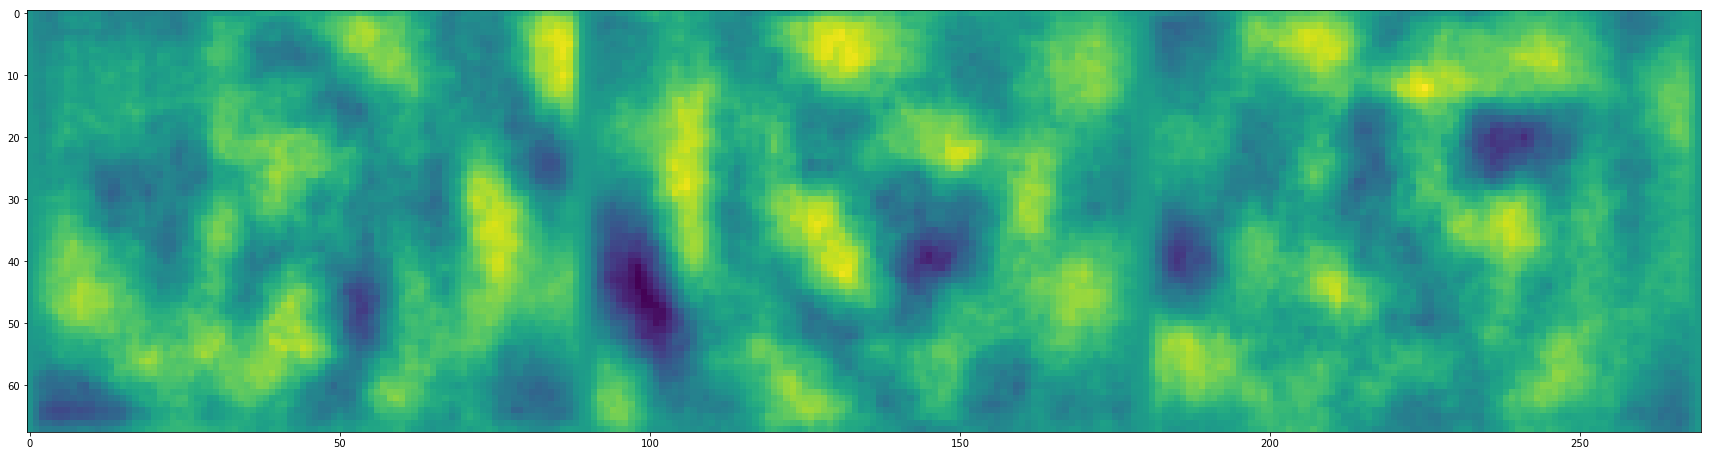

In [6]:
from sklearn.linear_model import ridge_regression

reg=ridge_regression(reduced_images,x_train[:,0].T,alpha=10000).reshape(68,270)
print(reg)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [30, 30]
plt.imshow(reg)
plt.show()


[[-8.7112898e-07 -1.4079836e-06 -1.7279190e-06 ... -1.7559665e-07
  -1.4158074e-07 -3.6954739e-07]
 [-8.4270494e-07 -1.3333372e-06 -1.7215365e-06 ... -3.4502057e-07
  -2.2433908e-07 -3.4859235e-07]
 [-9.0287483e-07 -1.3695077e-06 -1.4248803e-06 ... -3.4733458e-07
  -1.7175061e-07 -3.1824027e-07]
 ...
 [-1.0290333e-06 -2.4143405e-06 -3.9186802e-06 ... -2.6417963e-06
  -1.6810130e-06 -8.2329626e-07]
 [-9.9725230e-07 -2.1750077e-06 -3.0099586e-06 ... -2.4159140e-06
  -1.4749571e-06 -7.3177500e-07]
 [-9.1871726e-07 -1.6768254e-06 -2.2653956e-06 ... -2.0350069e-06
  -1.2583771e-06 -7.1993276e-07]]


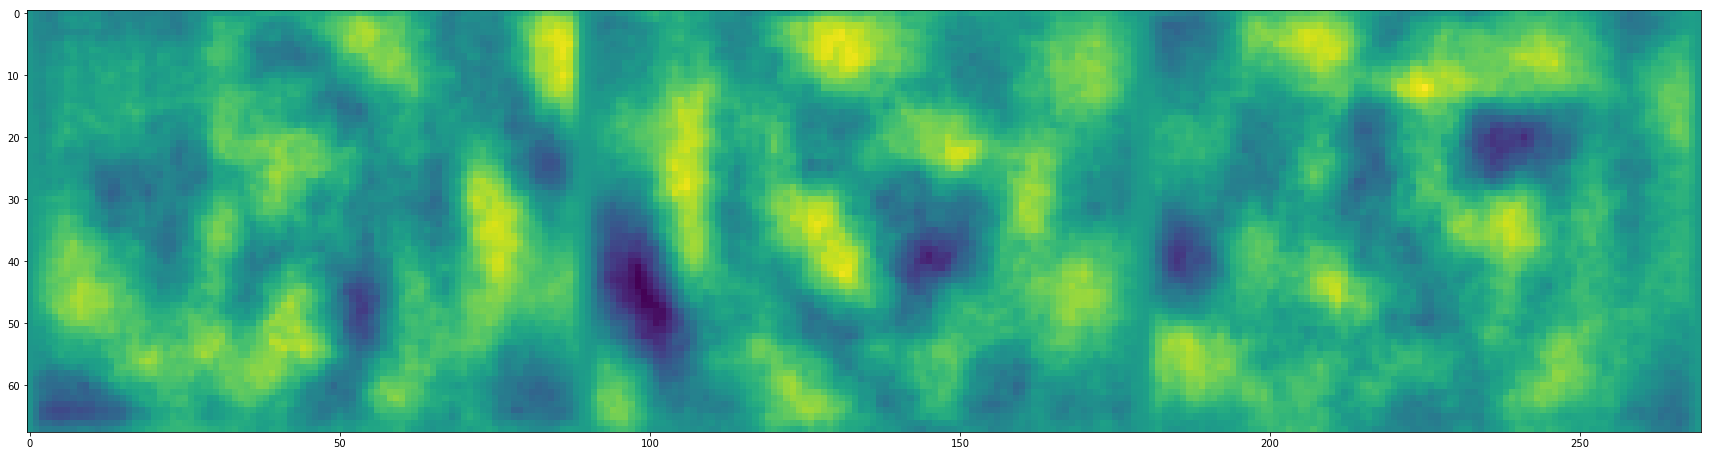

[[ 6.4735588e-07  1.1669725e-06  1.2874739e-06 ... -1.8431579e-06
  -9.1712741e-07  6.9916481e-08]
 [ 7.0458481e-07  1.0697751e-06  1.2594719e-06 ... -2.2875324e-06
  -1.2187724e-06 -4.0174033e-08]
 [ 6.7800659e-07  1.0633861e-06  1.3952637e-06 ... -2.6828077e-06
  -1.3684889e-06 -1.7141205e-07]
 ...
 [ 4.7394170e-07  1.0517386e-06  1.6753110e-06 ...  2.5838790e-06
   1.4597473e-06  5.7316771e-07]
 [ 5.0267317e-07  9.9376575e-07  1.2840252e-06 ...  1.8749577e-06
   9.7612690e-07  4.4315811e-07]
 [ 5.4041902e-07  7.2470033e-07  8.9019511e-07 ...  1.1523364e-06
   6.7697630e-07  3.4556982e-07]]


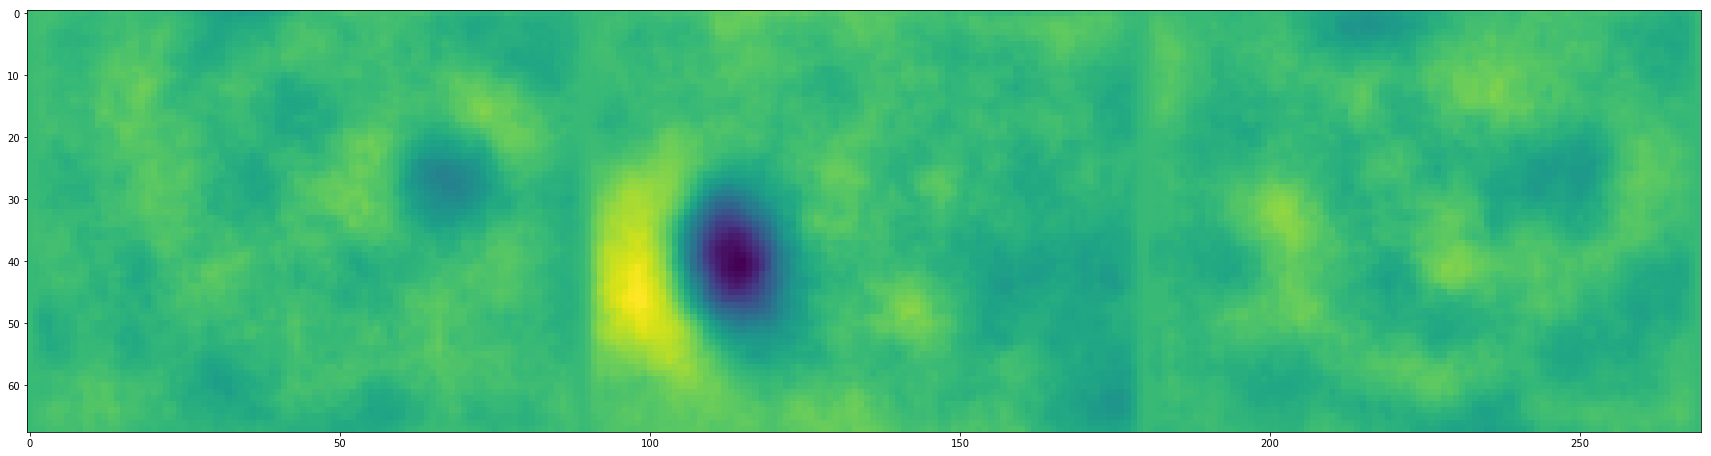

[[ 5.64119773e-09 -4.35735330e-07 -6.63454273e-07 ...  3.20258948e-07
   4.29038863e-07  3.01325883e-07]
 [-2.32306164e-07 -1.05159256e-06 -1.63967127e-06 ...  1.12322232e-06
   7.10039501e-07  3.07831556e-07]
 [-3.39284838e-07 -1.48547235e-06 -2.38098619e-06 ...  1.24780274e-06
   4.66629473e-07  3.59598801e-07]
 ...
 [ 1.51636058e-07 -7.06304562e-08 -6.76325218e-09 ... -9.32048010e-07
   8.01652575e-08  3.10471137e-07]
 [ 1.02656024e-07 -3.31013439e-07 -5.35172376e-07 ...  4.67904584e-07
   7.49928631e-07  5.11892665e-07]
 [ 1.18930778e-07 -1.11311806e-07 -3.92684939e-07 ...  1.59564979e-06
   1.09799487e-06  6.66760457e-07]]


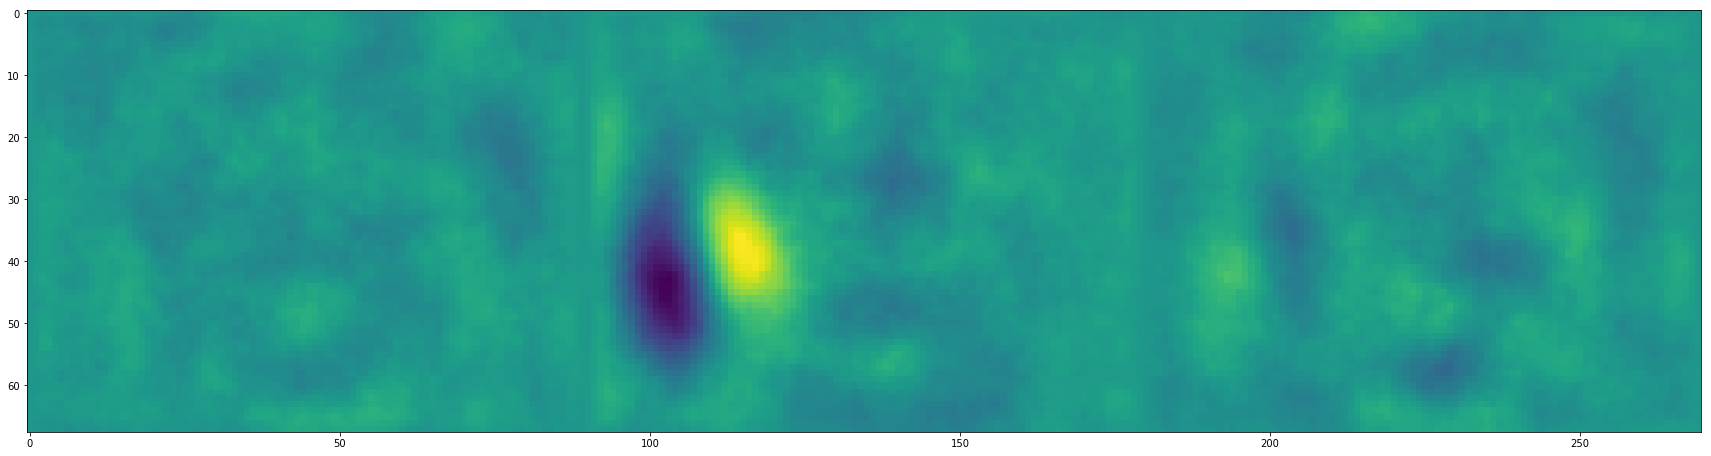

[[ 5.1952037e-07  1.0442031e-06  1.7328181e-06 ...  6.0667020e-07
   4.9735246e-07  5.0388149e-07]
 [ 5.2026138e-07  1.1440491e-06  2.2290114e-06 ...  2.7825477e-08
   3.2449101e-08  3.9248846e-07]
 [ 6.0049507e-07  1.0442051e-06  1.9507570e-06 ... -4.7346680e-07
  -5.6437028e-07  2.7008224e-07]
 ...
 [ 9.5333621e-07  1.9987085e-06  3.1536483e-06 ...  1.8487968e-06
   6.8950601e-07  4.3709150e-07]
 [ 8.2813074e-07  1.9915724e-06  3.0184640e-06 ...  1.7157270e-06
   8.2756810e-07  3.5597319e-07]
 [ 8.5828071e-07  1.7237735e-06  2.3772855e-06 ...  1.0218405e-06
   5.8615825e-07  3.9392950e-07]]


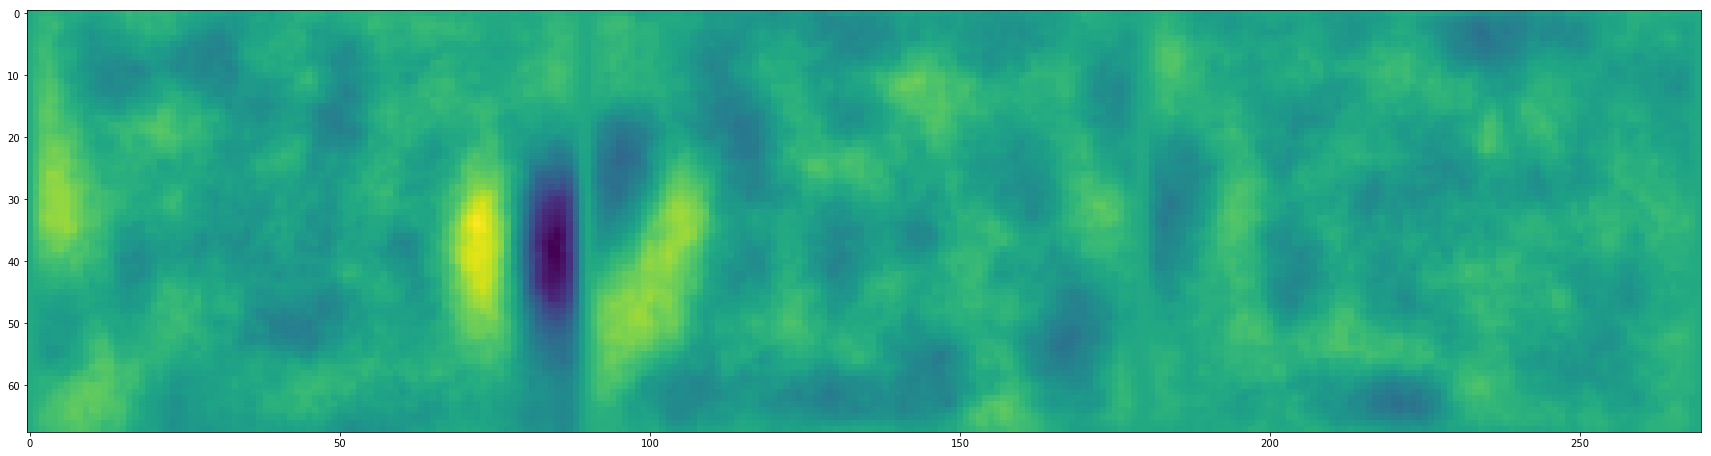

[[ 5.3106993e-07  8.3996497e-07  1.1862942e-06 ...  6.6758332e-07
   4.0269319e-07  2.5701459e-07]
 [ 4.8796119e-07  5.9002917e-07  4.3548647e-07 ...  1.6103493e-06
   1.2885648e-06  5.4450152e-07]
 [ 4.2726623e-07  1.5018095e-07 -1.7854754e-07 ...  1.7194544e-06
   1.6386196e-06  7.4404545e-07]
 ...
 [ 2.5340537e-07  6.2767975e-07  6.6066099e-07 ... -1.5170748e-06
  -5.4381525e-07  6.0595660e-08]
 [ 8.3080813e-08 -8.5245681e-08 -2.2359959e-07 ... -1.3499480e-06
  -4.9146598e-07  9.1015899e-08]
 [-2.0034605e-07 -7.8863536e-07 -1.2836250e-06 ... -1.4796511e-06
  -5.1583118e-07  1.0174206e-07]]


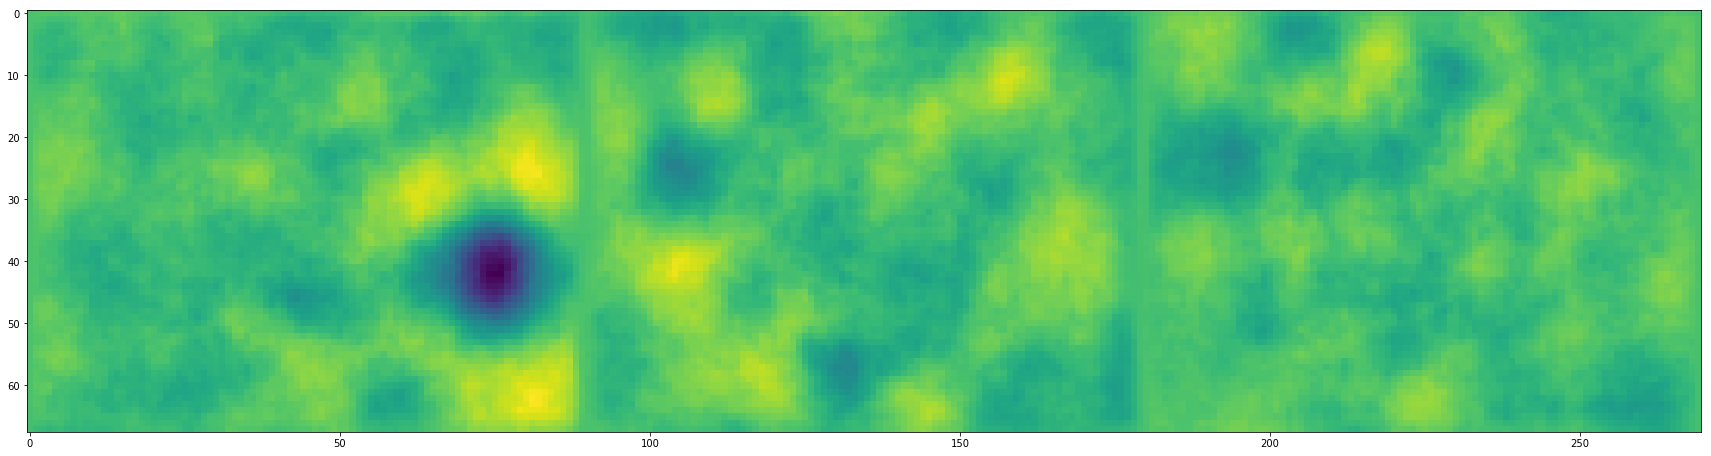

[[ 6.7025076e-07  4.1933369e-08 -8.4469445e-07 ...  1.3678655e-06
   1.0573287e-06  8.5882715e-07]
 [ 5.7695496e-07 -4.2896968e-07 -1.5546095e-06 ...  1.9308459e-06
   1.4552124e-06  9.0171045e-07]
 [ 5.1965878e-07 -5.9107469e-07 -1.9423626e-06 ...  1.8156248e-06
   1.4860526e-06  9.3505088e-07]
 ...
 [ 9.9976955e-07  1.3975321e-06  1.7879083e-06 ...  2.9338068e-08
   6.1435804e-07  9.6866415e-07]
 [ 9.7058148e-07  1.2689851e-06  1.5903926e-06 ...  7.4054924e-08
   5.9364038e-07  9.0203872e-07]
 [ 9.5071607e-07  1.1243632e-06  1.2761186e-06 ...  5.3325169e-07
   8.5461625e-07  9.0700394e-07]]


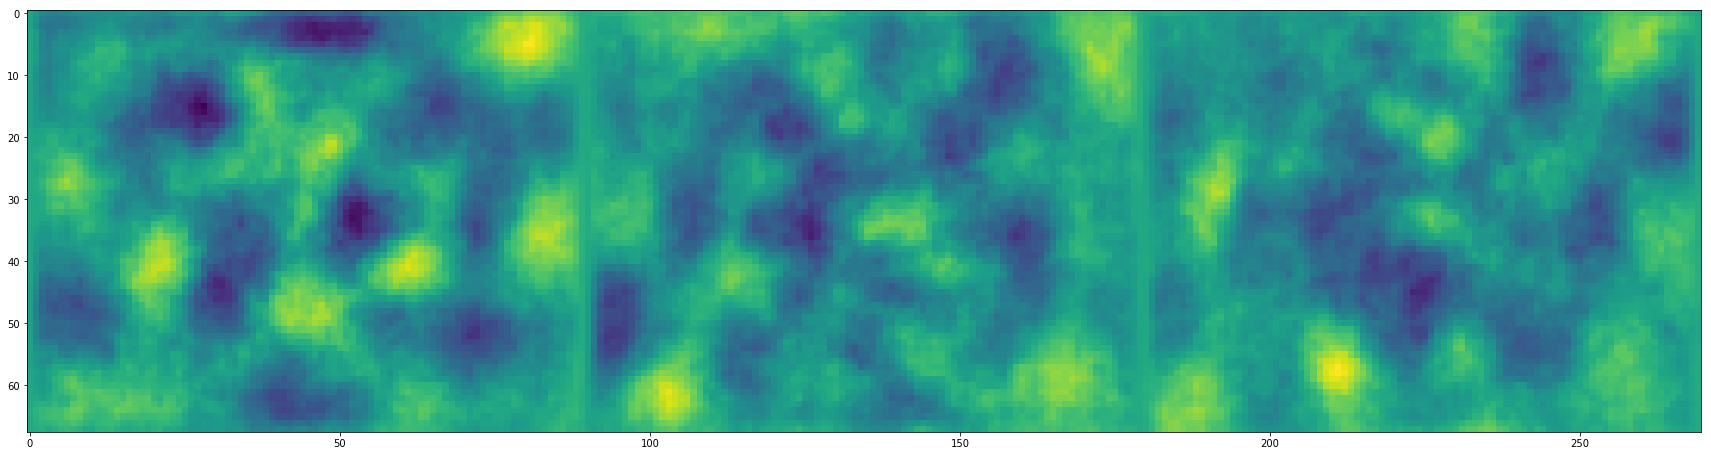

[[-5.7586442e-07 -4.4444786e-07 -2.7232775e-07 ... -2.4081237e-07
  -5.1388463e-07 -6.1688735e-07]
 [-6.3666073e-07 -3.1159186e-07 -1.7479000e-07 ... -7.7314149e-07
  -9.4113676e-07 -7.3945887e-07]
 [-7.1226168e-07 -3.6249173e-07 -1.0711844e-07 ... -9.2692545e-07
  -6.2657489e-07 -7.7794647e-07]
 ...
 [-8.9255684e-07 -1.1713560e-06 -2.3110345e-06 ...  6.0882161e-07
   5.3899868e-07 -4.2498314e-07]
 [-8.5116000e-07 -1.1783147e-06 -1.8303488e-06 ... -2.3787128e-07
   1.3097066e-07 -3.8695526e-07]
 [-8.6601426e-07 -1.2384468e-06 -1.4212268e-06 ... -2.7627507e-07
  -3.3549233e-07 -4.9882891e-07]]


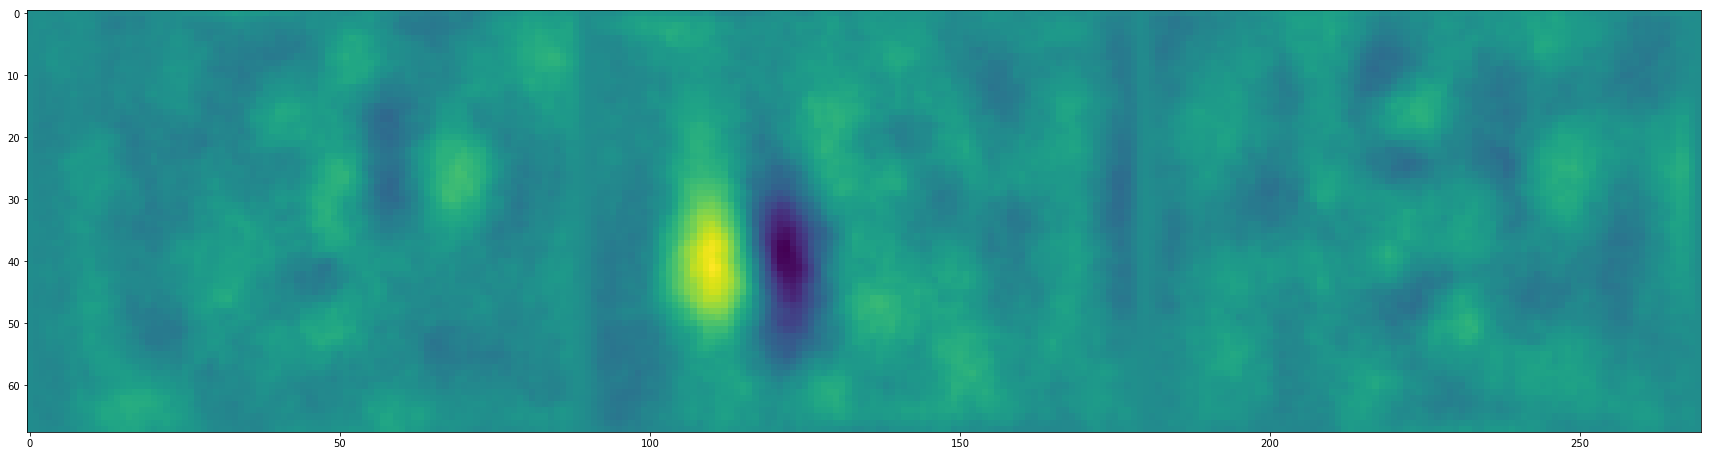

[[ 5.5613140e-07  7.4521375e-07  6.7967289e-07 ...  5.2799732e-07
   4.7511364e-07  3.8766822e-07]
 [ 4.7410109e-07  4.5780394e-07  2.4714734e-07 ...  1.0789073e-06
   7.8144728e-07  4.3416023e-07]
 [ 4.6372972e-07  2.6190548e-07 -2.4269015e-08 ...  1.4817201e-06
   1.0610486e-06  4.7597521e-07]
 ...
 [ 4.1813070e-07  3.6430154e-07  4.8281879e-07 ...  5.2551269e-07
   8.8140018e-07  6.0516720e-07]
 [ 4.4623800e-07  3.5932064e-07  2.8320278e-07 ...  1.0154806e-06
   8.8931404e-07  5.9185305e-07]
 [ 4.9400876e-07  3.7989639e-07  1.9323183e-07 ...  9.2752367e-07
   9.5440180e-07  6.3872341e-07]]


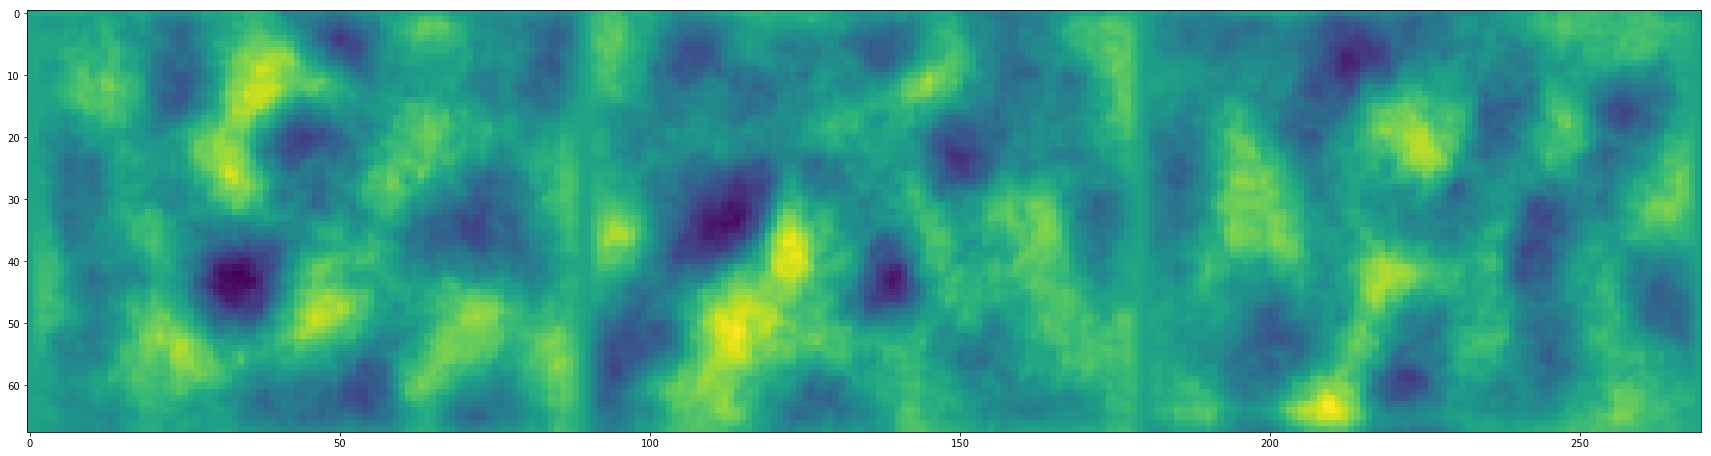

[[-9.9393198e-08  4.6479033e-07  1.4892203e-06 ...  2.1548932e-08
  -6.1368802e-08 -1.6987170e-07]
 [-6.2920336e-08  6.3920476e-07  1.7656098e-06 ...  4.8865934e-07
   2.1438416e-07 -9.4564399e-08]
 [-3.8388613e-08  7.2394170e-07  1.7937409e-06 ...  8.3985844e-07
   4.4868156e-07  4.0596248e-08]
 ...
 [-6.2115686e-07 -1.5351801e-06 -2.1911790e-06 ... -2.5734385e-06
  -1.8443884e-06 -8.3867633e-07]
 [-6.0309208e-07 -1.3273585e-06 -1.9240676e-06 ... -1.8418149e-06
  -1.5563935e-06 -6.6990503e-07]
 [-6.0550002e-07 -1.0962273e-06 -1.6713699e-06 ... -1.8155265e-06
  -1.3173546e-06 -6.1753184e-07]]


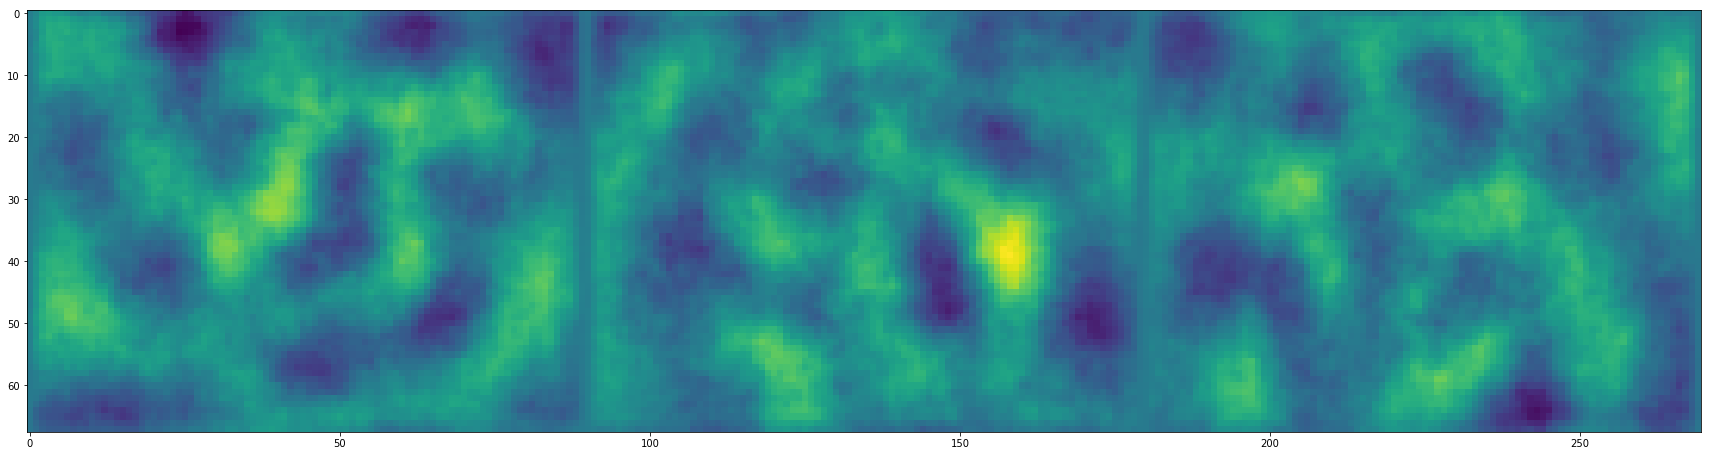

[[-2.93524550e-07 -4.80181257e-07 -7.56626036e-07 ... -3.49396657e-07
  -5.32849526e-07 -4.32044828e-07]
 [-2.95038660e-07 -2.15433602e-07 -4.42686684e-07 ... -3.28675696e-07
  -6.32207787e-07 -4.17172629e-07]
 [-3.58537164e-07  3.96001134e-08  3.49347886e-07 ... -1.37121248e-07
   1.18090256e-07 -3.16952111e-07]
 ...
 [-9.03114369e-07 -2.57229885e-06 -4.57558599e-06 ... -1.53185135e-06
  -1.11137126e-06 -4.86195802e-07]
 [-8.83159885e-07 -2.17284310e-06 -3.09818529e-06 ... -1.56862643e-06
  -1.11716224e-06 -3.78337290e-07]
 [-9.40158827e-07 -1.62268509e-06 -2.18990999e-06 ... -1.54404438e-06
  -9.14936606e-07 -3.83411958e-07]]


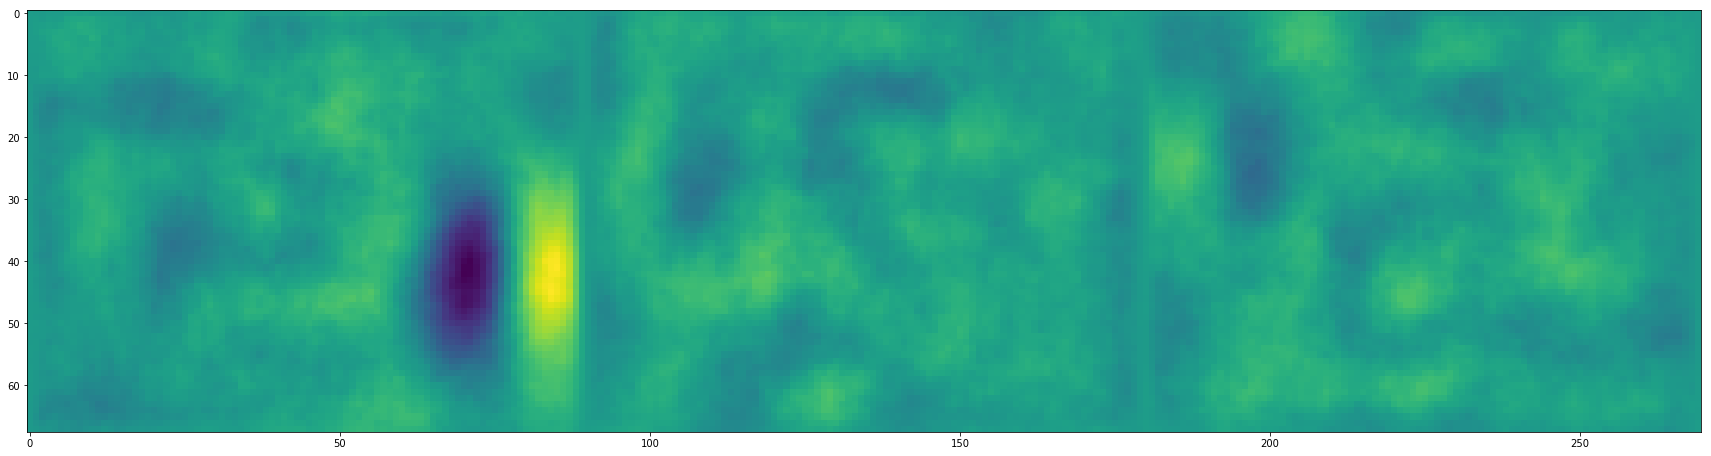

[[ 6.41834788e-07  5.08467679e-07  1.04159376e-07 ... -2.90511821e-06
  -1.43332852e-06  1.22083836e-08]
 [ 5.80465212e-07  2.17405667e-08 -5.88129467e-07 ... -3.13508099e-06
  -1.62450067e-06 -4.13711732e-08]
 [ 5.75948093e-07  7.69860193e-08 -7.08982043e-07 ... -2.97491943e-06
  -1.88181843e-06 -7.06718737e-08]
 ...
 [ 6.09677898e-07  4.03795809e-07  1.06812445e-06 ... -7.08429923e-07
  -4.86440854e-07  3.10341278e-07]
 [ 6.05927880e-07  7.55998997e-07  7.81587232e-07 ... -5.27147279e-07
  -3.18126467e-07  2.83735403e-07]
 [ 5.61960917e-07  5.72227862e-07  5.39297105e-07 ... -8.71720403e-08
   1.66895418e-07  3.12053913e-07]]


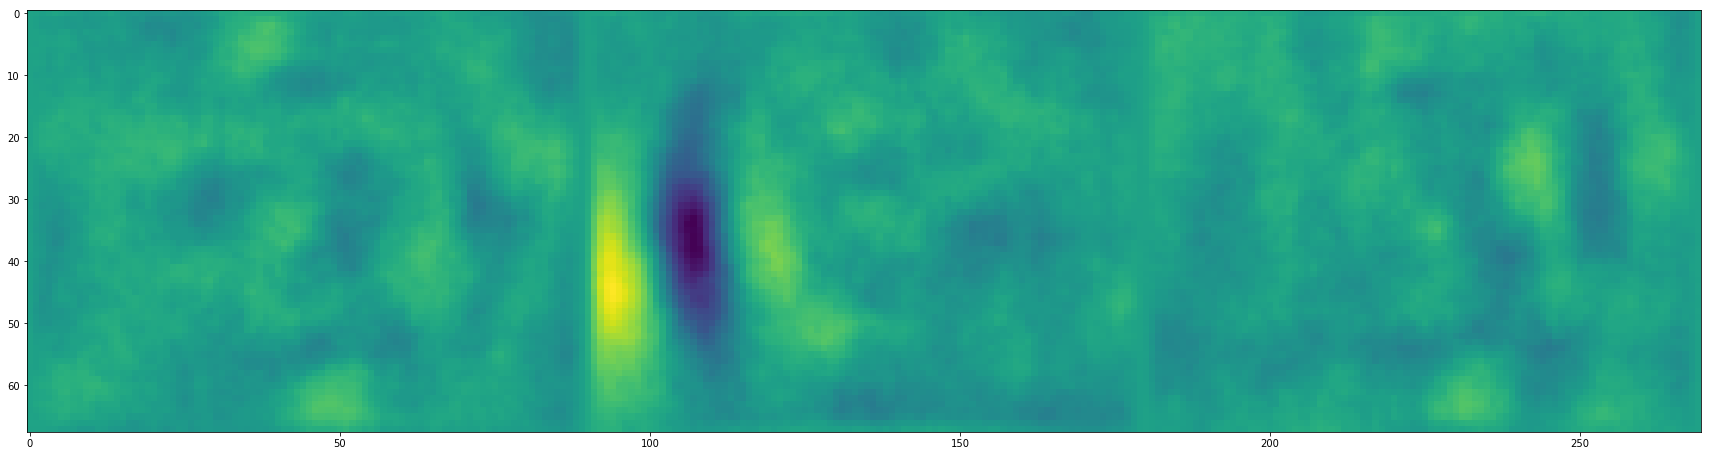

[[ 2.12939057e-07 -8.08482923e-07 -9.56625286e-07 ...  2.40569352e-06
   1.54719169e-06  9.79124479e-07]
 [ 4.30022055e-07  1.06974674e-07 -6.73228726e-08 ...  4.02045998e-06
   2.59960507e-06  1.10899907e-06]
 [ 5.77438698e-07  1.00577984e-06  5.85795931e-07 ...  4.54806286e-06
   3.14834688e-06  1.25232339e-06]
 ...
 [ 1.74219664e-07 -4.43663424e-07 -6.86373710e-07 ... -1.71763213e-06
  -7.53904430e-07  1.79717148e-07]
 [ 3.00064272e-07  1.48115831e-07 -7.40016162e-07 ... -1.09132077e-06
  -5.06178537e-07  2.88839288e-07]
 [ 1.83956516e-07 -5.64609230e-08 -4.60121640e-07 ... -9.79544211e-07
  -2.76371253e-07  2.53552230e-07]]


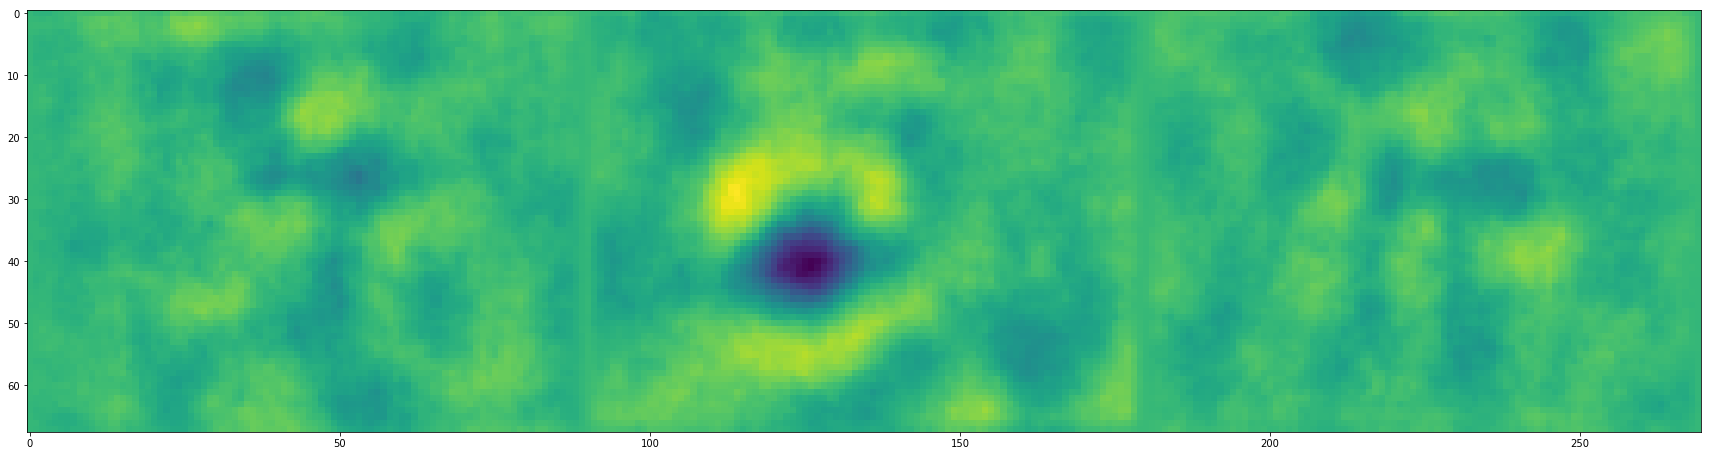

[[-2.1895491e-06 -1.7592816e-06 -9.1196551e-07 ... -2.5946440e-06
  -2.2262830e-06 -2.2811587e-06]
 [-2.0806922e-06 -1.5487842e-06 -4.3067735e-07 ... -3.2862667e-06
  -2.5543839e-06 -2.3995760e-06]
 [-2.0781731e-06 -1.5837654e-06 -5.0087482e-07 ... -3.4572768e-06
  -3.0260562e-06 -2.3640680e-06]
 ...
 [-2.1861106e-06 -2.3191087e-06 -2.5470774e-06 ...  1.1846633e-06
  -7.2847968e-07 -2.0381719e-06]
 [-2.0272241e-06 -1.8732464e-06 -2.3245716e-06 ...  2.8116463e-07
  -1.1680158e-06 -2.2185097e-06]
 [-1.9290999e-06 -1.5282704e-06 -1.5530641e-06 ... -5.7531230e-07
  -1.7187558e-06 -2.3514992e-06]]


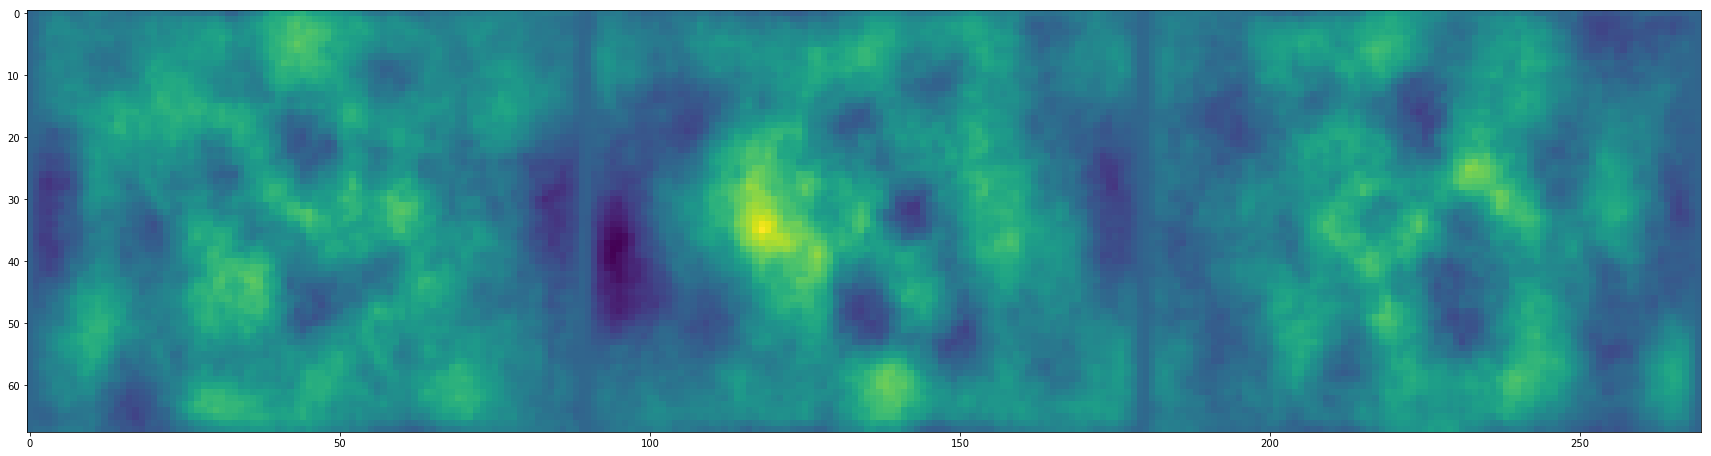

[[ 3.0246446e-07  1.6442789e-06  1.9187357e-06 ...  2.3404800e-06
   8.1960843e-07 -1.7240950e-07]
 [ 3.6066356e-07  1.8382271e-06  2.3681400e-06 ...  2.3659711e-06
   1.2910872e-06 -2.2163341e-08]
 [ 3.7809070e-07  2.0132745e-06  3.1031818e-06 ...  3.0690430e-06
   1.7869526e-06  1.2920712e-07]
 ...
 [-3.5233936e-07 -1.2082683e-07 -9.6368342e-07 ...  1.4540684e-06
   9.9589431e-07  1.1382559e-08]
 [-3.7869958e-07 -5.2861111e-07 -8.4968622e-07 ...  1.4387228e-06
   9.7858913e-07  3.2234535e-08]
 [-3.6087062e-07 -6.8988646e-07 -7.8421715e-07 ...  1.7457519e-06
   1.0804899e-06  7.8313754e-08]]


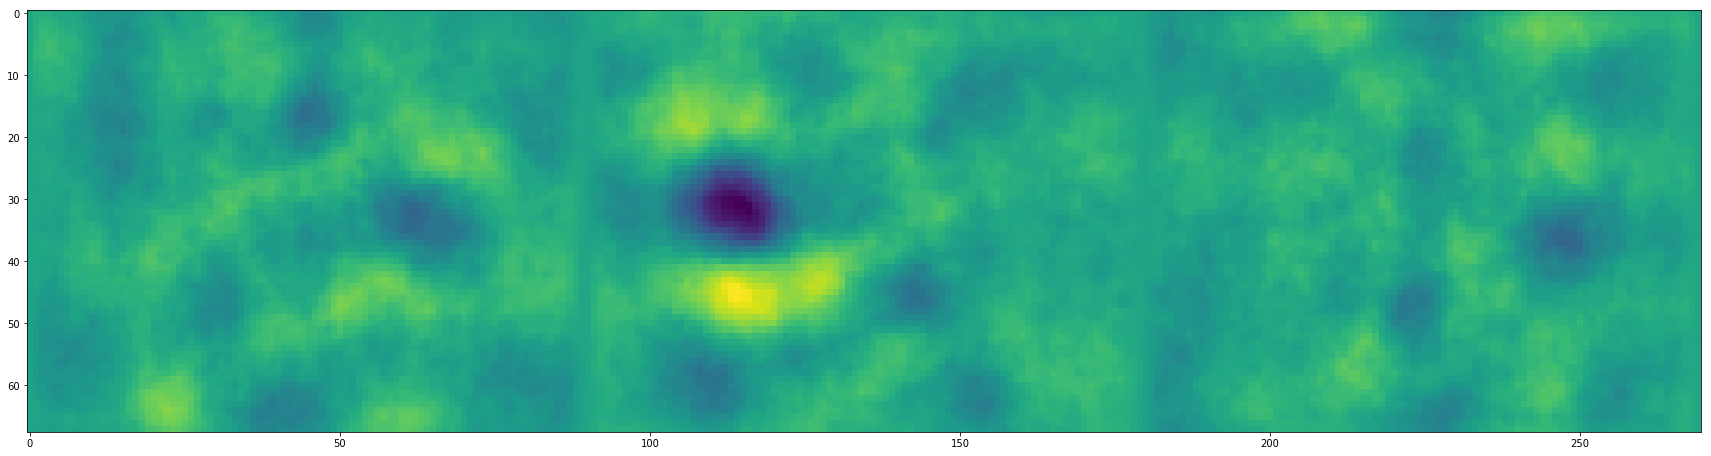

[[-4.5759802e-07 -7.6026748e-07 -1.0097199e-06 ...  1.5597942e-06
   9.7089082e-07  7.6980349e-08]
 [-4.4237723e-07 -7.3191916e-07 -1.2528034e-06 ...  1.0714194e-06
   7.0572560e-07 -1.6217244e-08]
 [-4.7104749e-07 -9.0353399e-07 -1.1213381e-06 ...  1.1224096e-06
   6.8644607e-07 -7.8892647e-08]
 ...
 [-6.2194493e-07 -1.4377878e-06 -2.6010985e-06 ...  1.5288875e-06
   9.4506322e-07  7.7946233e-08]
 [-6.0597347e-07 -1.3730515e-06 -2.1343151e-06 ...  1.2097072e-06
   7.3821951e-07  4.7872422e-08]
 [-4.9973255e-07 -8.7021402e-07 -1.4264516e-06 ...  6.1390301e-07
   1.5253691e-07 -5.6262390e-09]]


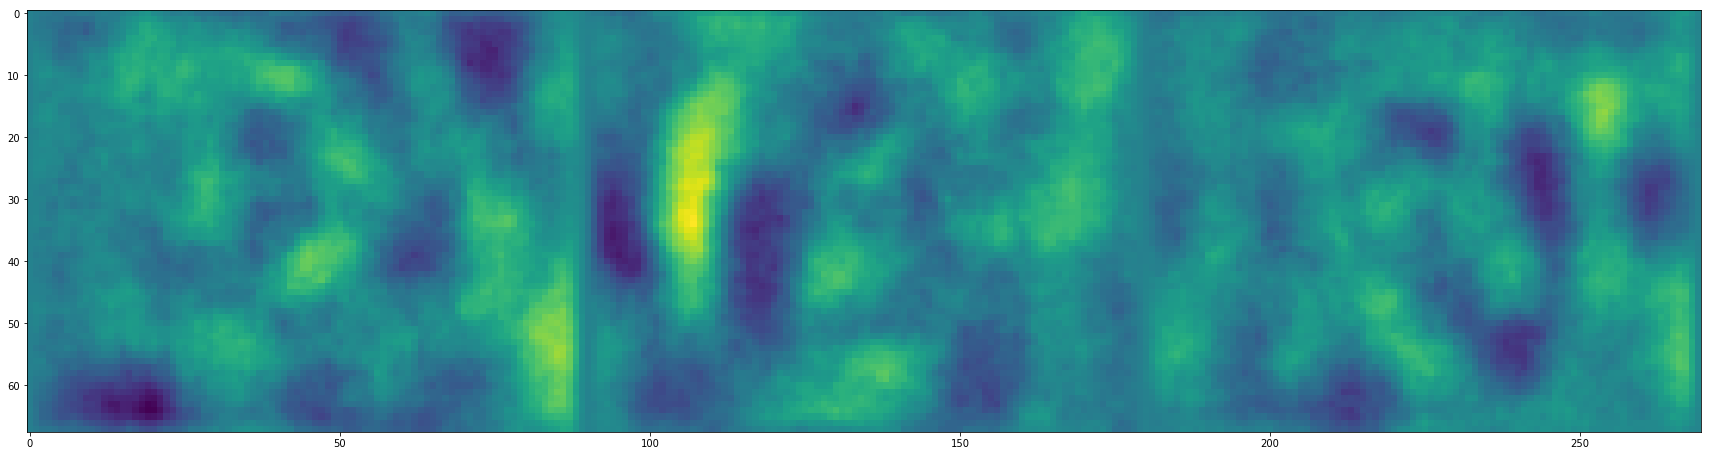

[[-7.8138845e-07 -8.2721010e-07 -7.5620125e-07 ...  1.1583654e-06
   5.8475604e-07 -1.4410365e-08]
 [-8.1700603e-07 -1.0236557e-06 -4.5645734e-07 ...  8.0580850e-07
   3.0814991e-08 -2.4889076e-07]
 [-8.0879738e-07 -1.0926912e-06 -6.0559358e-07 ...  6.0194151e-07
  -4.5011080e-07 -4.2136230e-07]
 ...
 [-9.5842483e-07 -2.1482729e-06 -2.6978978e-06 ... -1.1796676e-06
  -1.3816432e-06 -7.6345879e-07]
 [-8.2102838e-07 -1.7059068e-06 -2.1749729e-06 ... -3.4514531e-07
  -6.5097919e-07 -5.6449579e-07]
 [-7.4655435e-07 -1.3068545e-06 -1.4085797e-06 ...  3.2837923e-07
  -4.0264428e-07 -5.3251432e-07]]


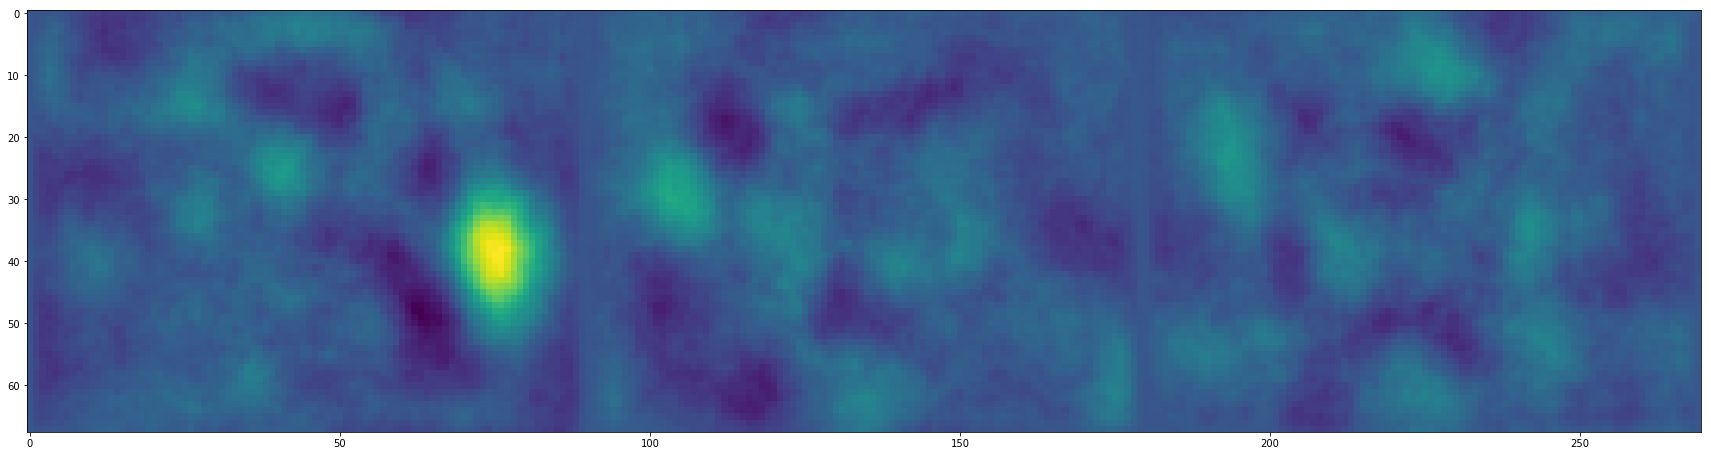

[[ 3.6239840e-07  1.8649604e-06  3.3367087e-06 ... -1.5477441e-06
  -5.1670253e-07 -1.4059609e-07]
 [ 4.5731144e-07  2.0973366e-06  3.5521948e-06 ... -2.1227604e-06
  -1.1877282e-06 -1.6262875e-07]
 [ 4.1365377e-07  1.8084351e-06  2.9864589e-06 ... -2.7979263e-06
  -1.6558821e-06 -2.5994825e-07]
 ...
 [ 6.7911026e-07  2.2746233e-06  3.9098491e-06 ... -1.4497879e-06
  -3.7690617e-07 -1.5140260e-07]
 [ 4.8196119e-07  1.8769454e-06  3.3637134e-06 ... -1.7121081e-06
  -7.1662402e-07 -1.9774384e-07]
 [ 3.3940421e-07  1.8109648e-06  2.7633782e-06 ... -1.3789127e-06
  -7.7775582e-07 -2.9578101e-07]]


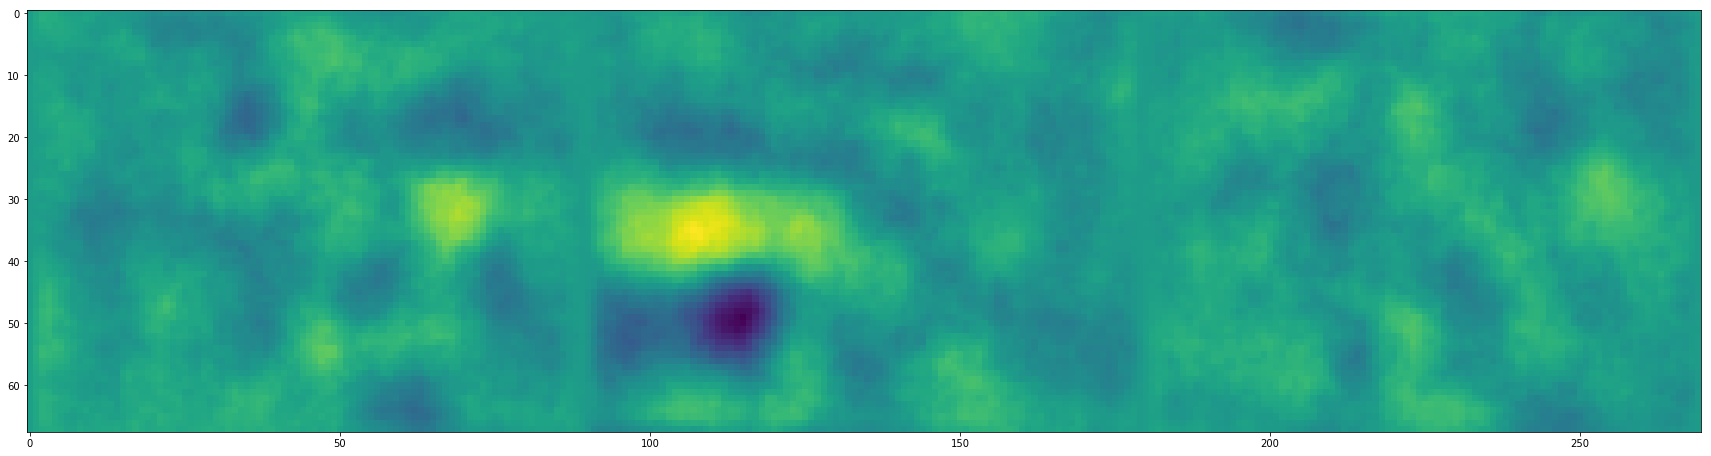

[[ 2.7667485e-07 -1.1307434e-07 -4.6252076e-08 ...  6.7762071e-06
   4.5041197e-06  1.8598942e-06]
 [ 4.4352339e-07  5.0282586e-07  5.1263288e-07 ...  7.8004241e-06
   4.8422171e-06  1.8616448e-06]
 [ 6.5191159e-07  1.0735930e-06  1.1015014e-06 ...  8.8381721e-06
   5.3276622e-06  2.0727102e-06]
 ...
 [ 8.0866891e-07  1.3020041e-06  1.3964132e-06 ...  8.2550292e-07
   6.3700935e-07  6.4017632e-07]
 [ 8.9554538e-07  1.6358740e-06  1.7169563e-06 ...  1.0436166e-06
   4.6710161e-07  4.9748360e-07]
 [ 1.0432390e-06  1.8578737e-06  1.9684510e-06 ...  1.5097818e-06
   8.0121100e-07  5.5204646e-07]]


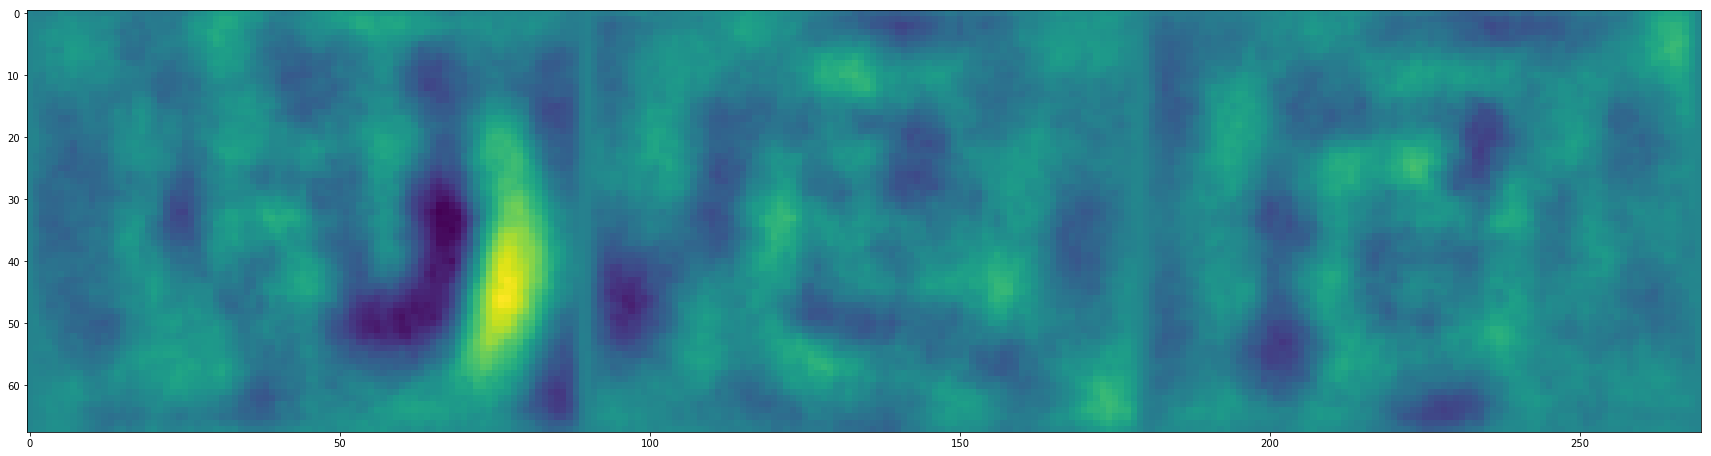

[[ 8.5281823e-07  3.2182936e-07 -4.9727575e-08 ...  3.5404425e-06
   2.4238216e-06  1.4252745e-06]
 [ 8.9593806e-07  5.8985040e-07  2.6541500e-07 ...  4.2242887e-06
   2.8858319e-06  1.5775206e-06]
 [ 8.9553771e-07  5.7078660e-07  4.9506201e-07 ...  4.2466600e-06
   2.9623127e-06  1.6152721e-06]
 ...
 [ 1.2888499e-06  1.5891459e-06  2.2469951e-06 ...  3.2917367e-06
   2.2950326e-06  1.4648643e-06]
 [ 1.1361193e-06  1.3652766e-06  2.1385083e-06 ...  3.0786339e-06
   2.2931674e-06  1.3632921e-06]
 [ 1.1672435e-06  1.3653408e-06  1.7579769e-06 ...  2.2096749e-06
   1.8973369e-06  1.4111343e-06]]


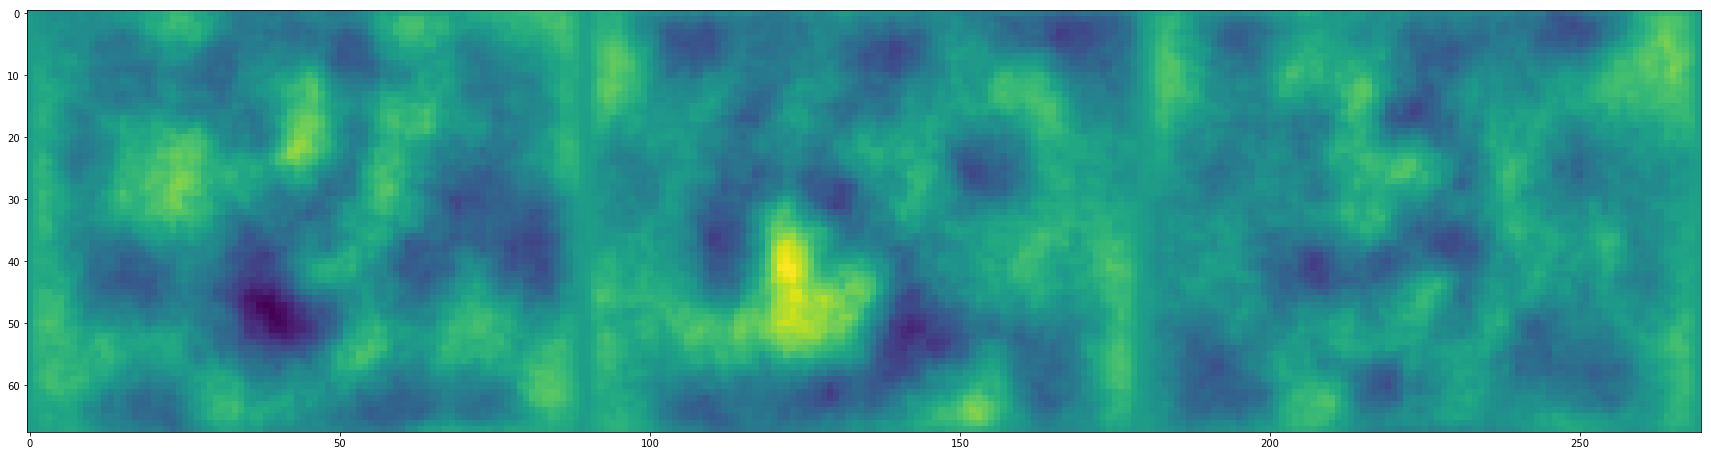

[[ 3.90468131e-07  4.96954613e-07  1.40090961e-07 ...  8.13911583e-07
   9.90786031e-09  1.11659226e-07]
 [ 3.59862582e-07  6.21249683e-07  4.37687135e-07 ...  4.00353514e-07
   4.00069865e-07  4.05051509e-07]
 [ 2.92066801e-07  4.61284145e-07  5.94486323e-07 ...  2.35957245e-07
   5.34369008e-07  5.91294338e-07]
 ...
 [ 4.51999597e-07  3.85283215e-07 -1.56347468e-07 ... -6.70232758e-10
   4.81713514e-08  3.31138153e-07]
 [ 2.81234492e-07  7.45193631e-08  2.07930299e-07 ... -3.82411201e-07
   1.33802629e-07  3.76179230e-07]
 [ 2.13596792e-07  3.58271244e-08  1.78075226e-07 ... -3.33165730e-07
   1.80057086e-07  3.97305939e-07]]


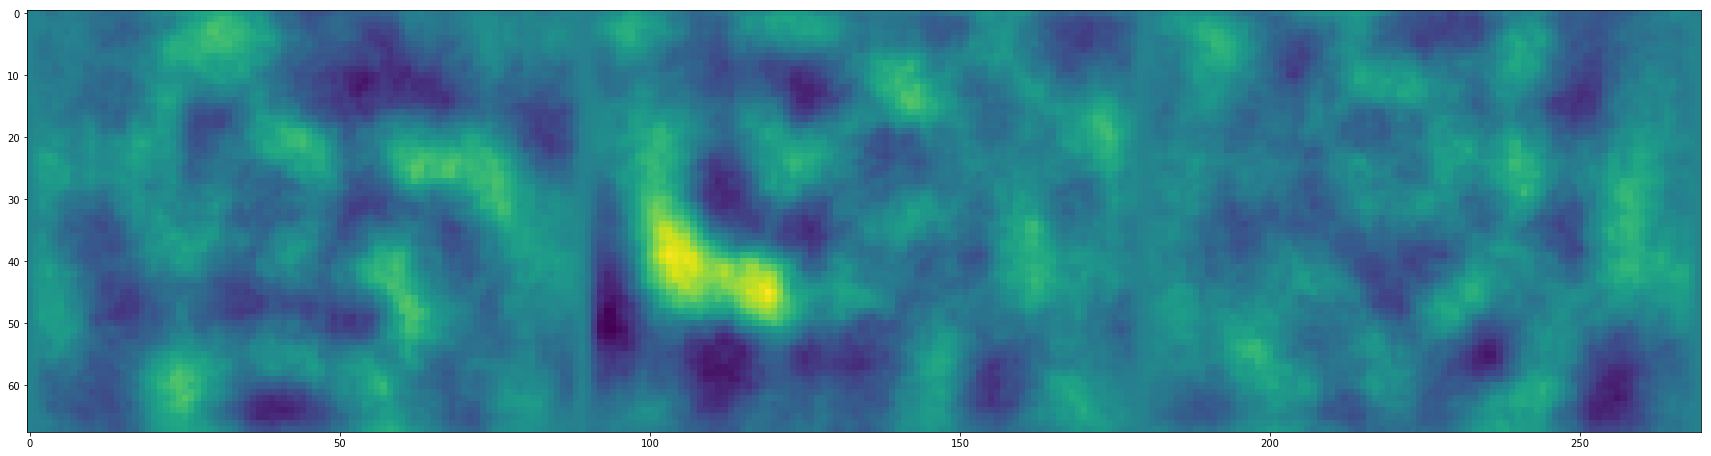

[[ 1.2708757e-06  1.7797252e-06  2.0485159e-06 ... -3.9671222e-06
  -2.0996713e-06  3.6203107e-07]
 [ 1.1315349e-06  1.7444823e-06  2.7086658e-06 ... -6.9685689e-06
  -3.9049050e-06  3.9324441e-08]
 [ 1.1456192e-06  2.1465273e-06  2.4125820e-06 ... -8.6905520e-06
  -4.9892251e-06 -1.9873345e-07]
 ...
 [ 4.1609798e-07 -1.6232906e-06 -2.3762548e-06 ...  1.6088586e-06
   7.9148066e-07  1.0749945e-06]
 [ 6.2338518e-07 -6.6213488e-07 -1.3193236e-06 ...  2.0993621e-06
   1.3799574e-06  1.2498398e-06]
 [ 6.5607207e-07 -4.7124308e-07 -9.8371970e-07 ...  1.4167341e-06
   1.4207528e-06  1.3653346e-06]]


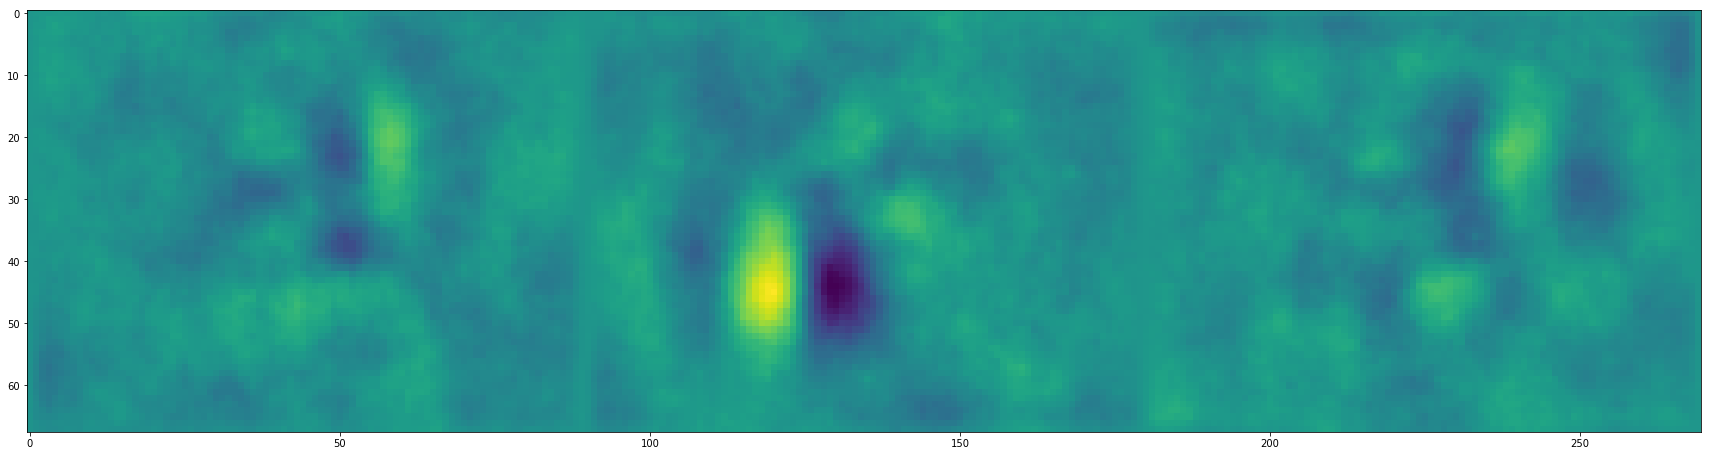

[[-4.6612635e-07 -2.4797700e-06 -4.1981398e-06 ...  5.7675936e-07
   5.2233150e-07  4.0273756e-07]
 [-5.3820901e-07 -3.3558113e-06 -6.1148394e-06 ...  2.0021980e-06
   1.3582967e-06  3.4772648e-07]
 [-8.2984371e-07 -4.3592390e-06 -7.7251698e-06 ...  2.5438180e-06
   1.6934468e-06  3.9458743e-07]
 ...
 [ 7.3404880e-07  1.6044121e-06  2.0816999e-06 ... -1.3539367e-06
  -3.6515317e-07  2.4420797e-07]
 [ 6.0900112e-07  1.1037905e-06  1.6746673e-06 ... -1.3845038e-06
  -5.9585824e-07  1.7073022e-07]
 [ 6.8598047e-07  8.2248744e-07  1.2282269e-06 ... -8.6641973e-07
  -1.5668510e-07  1.5473849e-07]]


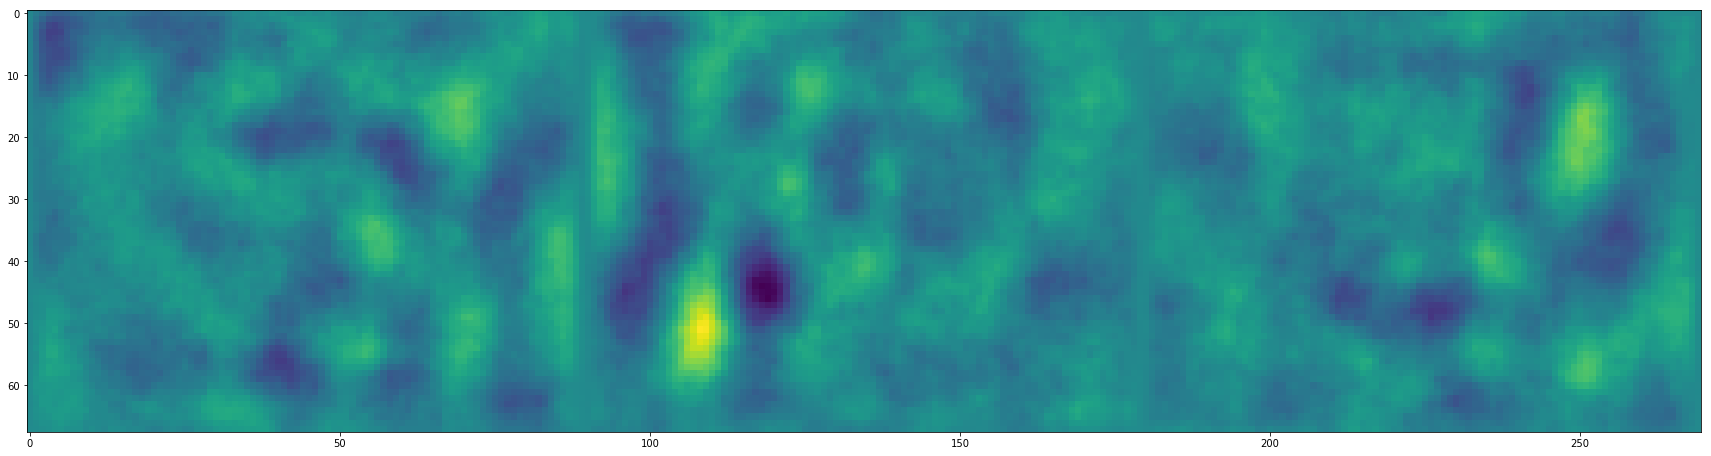

[[ 3.0978515e-07  4.1154610e-07  4.8002971e-07 ... -4.3805838e-07
  -2.2592315e-07  9.2119443e-08]
 [ 3.3155959e-07  5.3455994e-07  5.8889736e-07 ... -8.7765937e-07
  -4.8345476e-07  7.4988627e-08]
 [ 2.8805474e-07  4.3150365e-07  6.7446319e-07 ... -1.3474877e-06
  -5.9184651e-07  4.9308561e-08]
 ...
 [ 6.4815147e-08 -6.4672599e-07 -1.0886656e-06 ...  1.6901690e-06
   1.0671512e-06  3.9881152e-07]
 [ 1.0506742e-07 -5.6896852e-07 -8.0903243e-07 ...  1.1990271e-06
   8.1326698e-07  3.8649310e-07]
 [ 1.5824345e-07 -1.9485289e-07 -3.7913267e-07 ...  5.4341137e-07
   3.9109710e-07  3.1505334e-07]]


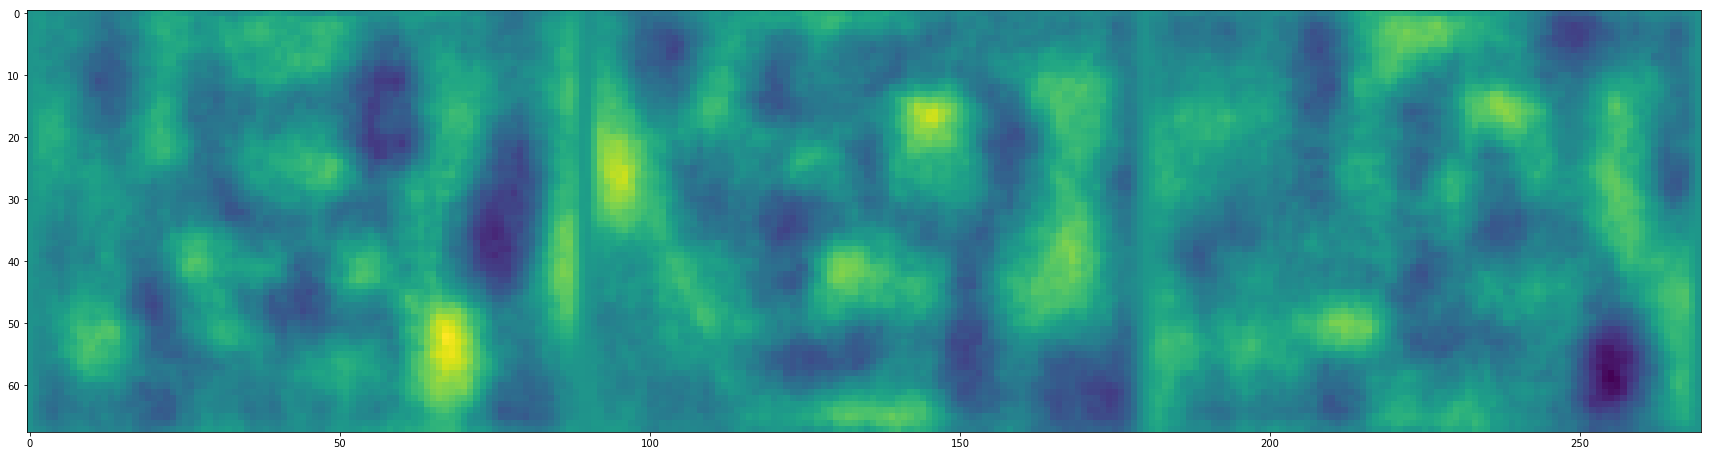

[[-8.1072375e-07 -1.9530512e-06 -2.6719297e-06 ... -1.4762687e-06
  -1.1862569e-06 -7.3321036e-07]
 [-9.0341331e-07 -2.3623779e-06 -3.5205730e-06 ... -7.2189715e-07
  -6.4692784e-07 -6.7117361e-07]
 [-9.7685506e-07 -2.2593817e-06 -3.3775150e-06 ... -6.5279386e-07
  -4.1490358e-07 -5.7678335e-07]
 ...
 [-9.5441521e-07 -2.1469446e-06 -3.2864716e-06 ... -2.5173586e-06
  -1.8887567e-06 -1.0198244e-06]
 [-8.3049952e-07 -2.1149601e-06 -3.1167933e-06 ... -2.2276158e-06
  -1.7141501e-06 -9.7313159e-07]
 [-7.3873696e-07 -1.9594163e-06 -2.6850510e-06 ... -1.9269669e-06
  -1.5191295e-06 -9.8898329e-07]]


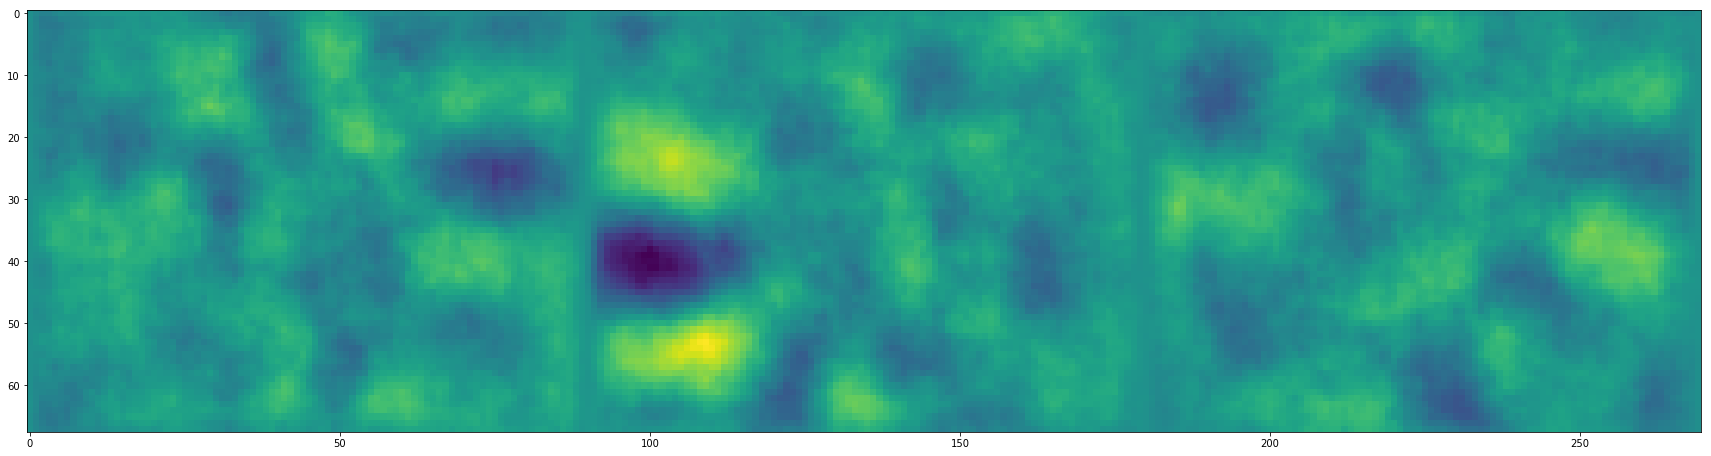

[[ 6.0424776e-07  1.2450126e-06  1.5654538e-06 ...  3.8273060e-06
   2.5629301e-06  8.0927282e-07]
 [ 7.3759725e-07  1.7768263e-06  2.0722227e-06 ...  4.9582172e-06
   3.4396219e-06  1.0575224e-06]
 [ 7.5437265e-07  2.1429514e-06  2.6732637e-06 ...  5.1538045e-06
   3.6784052e-06  1.2250475e-06]
 ...
 [ 4.2804979e-07  4.7469601e-07  3.3774839e-07 ...  6.1182294e-07
   9.8433020e-07  2.7179797e-07]
 [ 4.5782329e-07  6.5529423e-07  4.3114875e-07 ...  5.2161550e-07
   6.9029710e-07  2.1647806e-07]
 [ 4.5158916e-07  8.5478899e-07  9.5319626e-07 ... -3.0999593e-07
   5.1924481e-08  1.1966785e-07]]


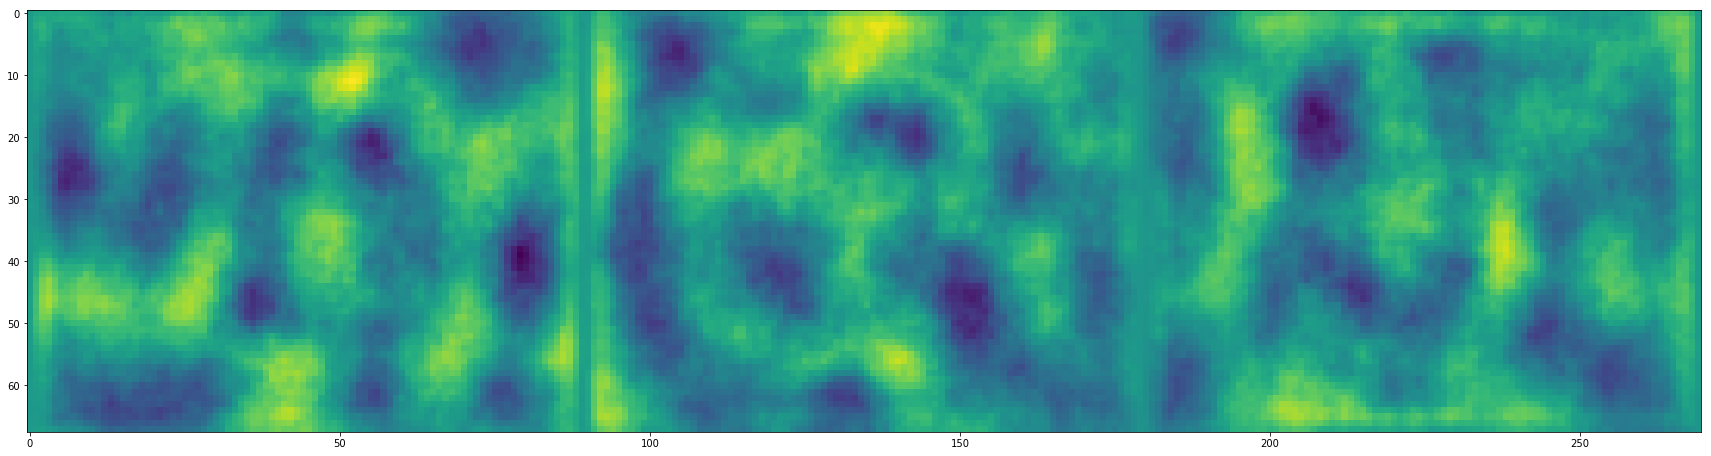

[[-2.7681054e-07 -8.4438392e-07 -1.0304575e-06 ... -1.1941472e-06
  -1.0526368e-06 -2.8526921e-07]
 [-1.9754944e-07 -3.8722678e-07 -2.3301162e-07 ... -4.6749531e-07
  -6.4912058e-07 -2.6639418e-07]
 [-1.2350416e-09  2.9004269e-07  4.7497076e-07 ...  2.1185111e-08
  -4.4852945e-07 -6.9706168e-08]
 ...
 [ 2.6459588e-07  8.3842355e-07  1.6626594e-06 ... -7.2183349e-07
  -6.9135621e-07 -1.6335107e-07]
 [ 1.0082691e-07  2.8034407e-07  3.6272726e-07 ... -1.7846901e-07
  -5.7482288e-07 -2.0764979e-07]
 [ 1.5653239e-07 -1.4697768e-07 -1.1796386e-07 ...  3.0054034e-07
  -2.9675971e-07 -1.5972967e-07]]


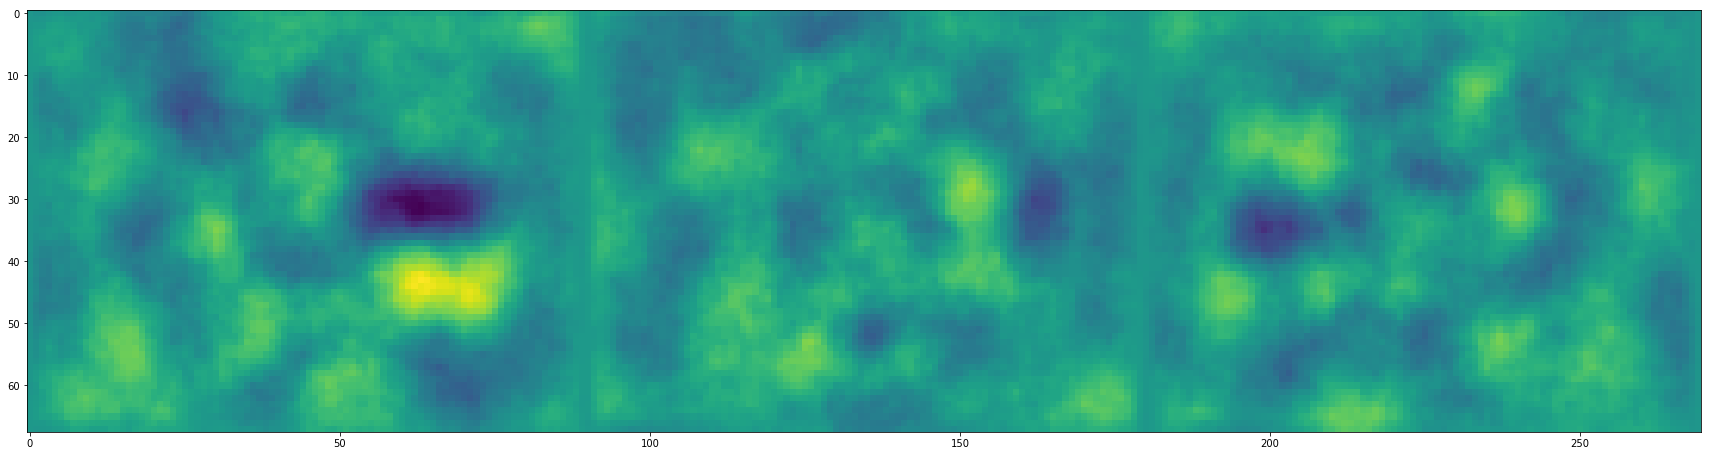

[[-2.1687248e-07 -3.2407064e-07 -5.0963172e-07 ...  2.0465766e-06
   9.2137083e-07 -3.7922707e-08]
 [-4.1352826e-07 -1.1591557e-06 -1.3467510e-06 ...  2.5498998e-06
   1.3388050e-06  1.3221918e-07]
 [-4.4867375e-07 -1.5000197e-06 -1.9533995e-06 ...  2.5848678e-06
   1.7101183e-06  2.7967482e-07]
 ...
 [ 1.0005090e-07  1.0017194e-06  1.5506308e-06 ...  1.8630661e-06
   7.1498584e-07  9.1765159e-08]
 [-3.0114549e-08  5.4956126e-07  1.4424626e-06 ...  1.4692963e-06
   7.5958974e-07  9.6152142e-08]
 [-6.1502647e-08  5.9807803e-07  1.2281815e-06 ...  1.1205514e-06
   6.3399142e-07  1.3249463e-07]]


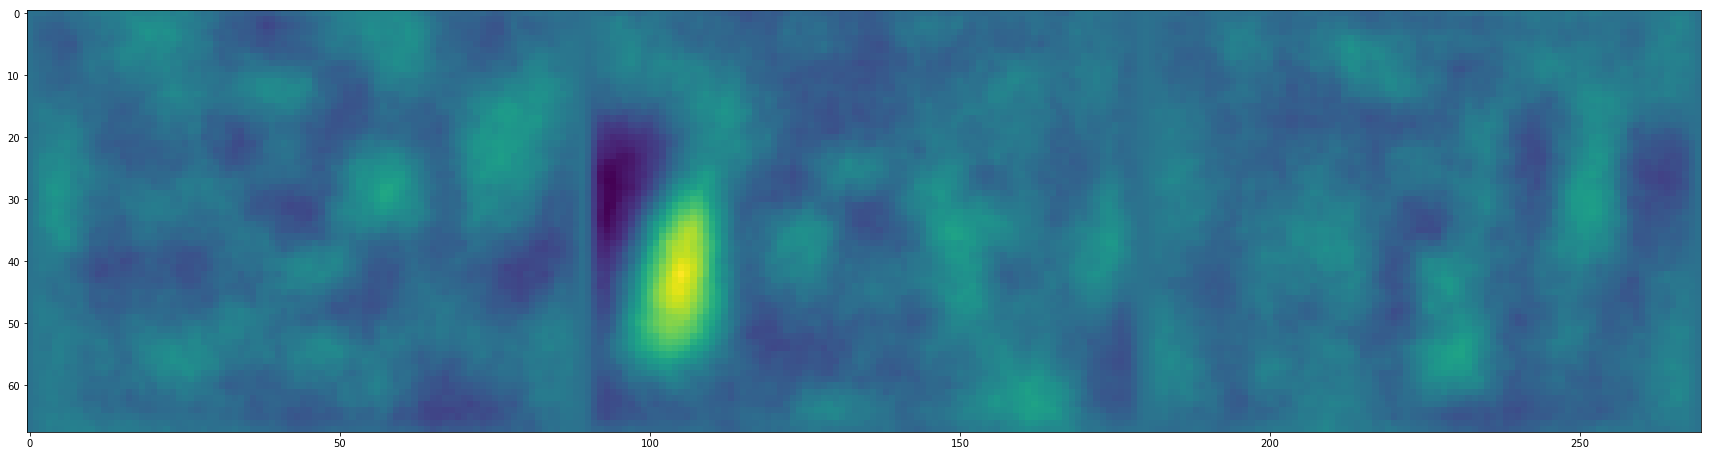

[[-1.50656163e-07 -8.29731107e-07 -1.60635898e-06 ...  7.38313190e-07
   6.26652081e-07  3.36927030e-07]
 [-1.19108485e-07 -9.86007763e-07 -1.54019153e-06 ...  7.48439732e-07
   6.67713778e-07  3.13973800e-07]
 [ 1.25569073e-07 -6.30913689e-07 -1.53509609e-06 ...  1.38007920e-06
   7.15504882e-07  3.73162919e-07]
 ...
 [ 1.44480083e-07 -1.10987756e-07 -1.72042093e-07 ... -2.17025240e-06
  -1.27948124e-06 -2.14365386e-07]
 [ 3.17852312e-07  8.00136846e-08 -4.05521291e-07 ... -1.34291611e-06
  -7.08853634e-07 -5.85233444e-08]
 [ 3.45573426e-07  1.77437670e-07 -1.99771890e-07 ... -9.27496046e-07
  -2.65612556e-07  2.38088731e-08]]


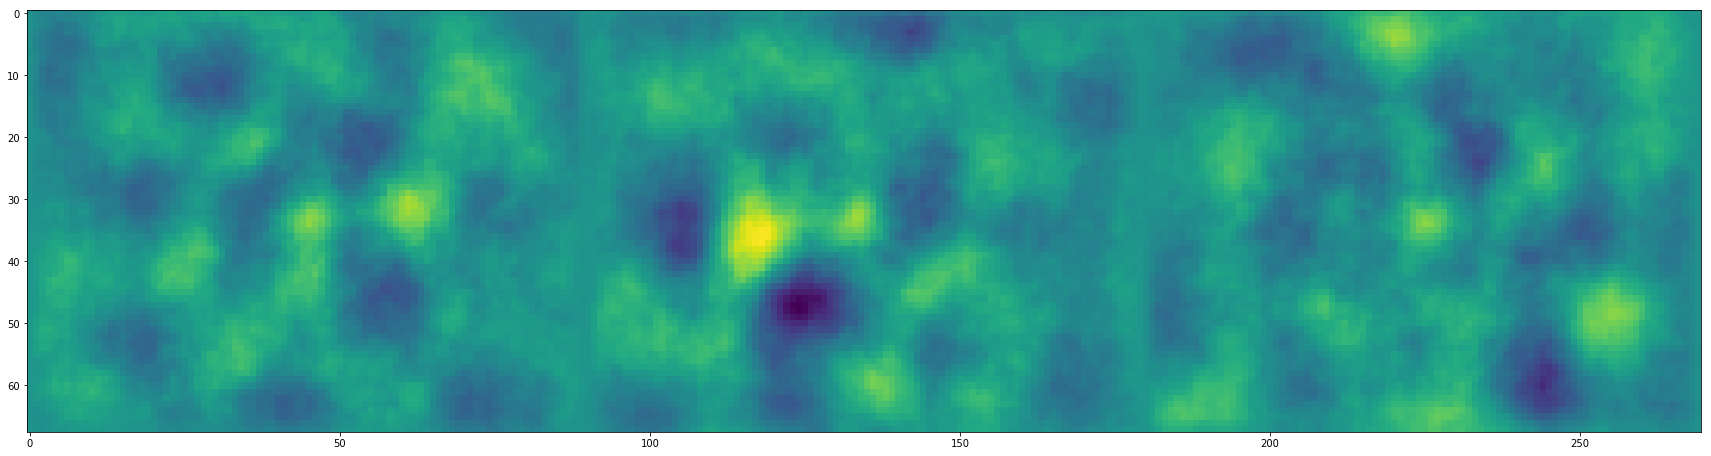

[[-1.9186896e-07 -3.0096305e-07 -3.4771779e-07 ... -1.2756501e-06
  -9.2542035e-07 -4.9937279e-07]
 [-2.5538353e-07 -2.6317312e-07 -3.7582166e-07 ... -1.4673351e-06
  -1.0088344e-06 -4.7588196e-07]
 [-2.8174455e-07 -3.8951370e-07 -5.7878833e-07 ... -1.4234129e-06
  -1.0283730e-06 -4.8999789e-07]
 ...
 [ 7.6032883e-08  4.1963150e-07  5.4868616e-07 ... -3.5694188e-06
  -2.2905790e-06 -8.9409144e-07]
 [ 9.4443443e-08  5.6518070e-07  7.9787958e-07 ... -3.0405060e-06
  -1.8573267e-06 -7.1339554e-07]
 [ 1.0676957e-07  6.5861099e-07  9.6457109e-07 ... -2.6467083e-06
  -1.5511746e-06 -6.4875962e-07]]


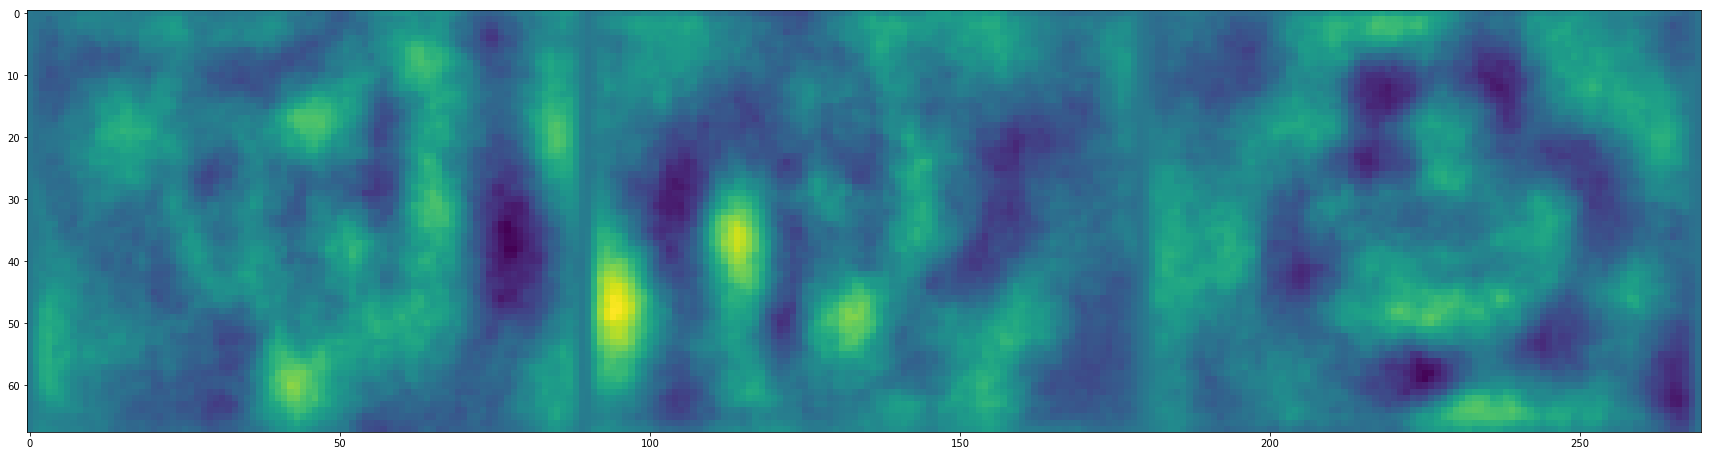

[[-3.9537488e-07 -1.0908308e-06 -1.7000312e-06 ... -2.3323560e-06
  -1.5936622e-06 -4.7625534e-07]
 [-2.8714138e-07 -6.0805019e-07 -4.1955363e-07 ... -4.6017658e-06
  -2.5763679e-06 -5.6634480e-07]
 [-1.6259249e-07 -4.6777816e-07 -4.9621974e-07 ... -5.3381614e-06
  -3.3482927e-06 -7.0330526e-07]
 ...
 [ 4.0411855e-08  6.5470090e-08  1.3481802e-07 ... -8.3703532e-07
  -1.3985838e-06 -2.3778396e-07]
 [-3.4242099e-08  1.7394600e-08  4.8821050e-07 ... -1.4092723e-06
  -1.2561529e-06 -2.7532400e-07]
 [ 2.5101923e-09  2.7708711e-07  4.6323703e-07 ... -1.5699806e-06
  -9.4149328e-07 -2.2892630e-07]]


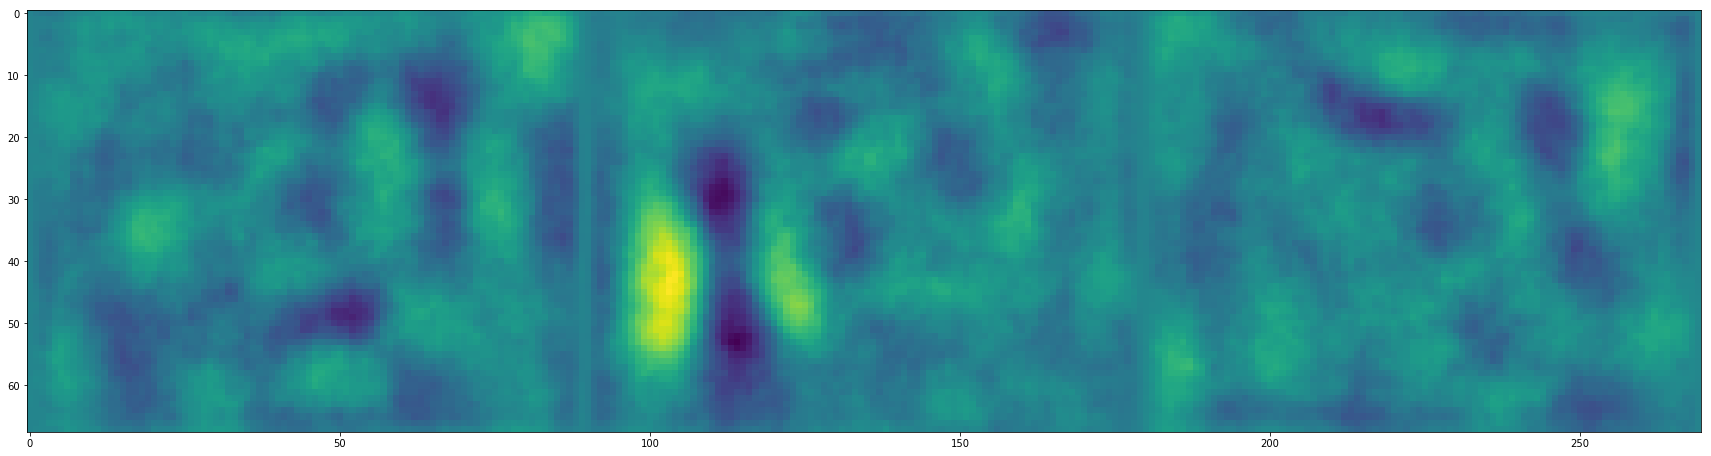

[[1.0280419e-06 2.2506381e-06 3.3912397e-06 ... 3.4840744e-07
  5.0836121e-07 5.5235961e-07]
 [1.1879407e-06 3.1433685e-06 4.4094627e-06 ... 9.7680561e-07
  6.7920780e-07 5.4541044e-07]
 [1.4155042e-06 3.5747407e-06 5.2117307e-06 ... 1.1036306e-06
  7.5187285e-07 4.9294306e-07]
 ...
 [9.1621115e-07 1.7046170e-06 2.6560483e-06 ... 6.2060724e-07
  7.1924632e-07 5.7767181e-07]
 [9.4760560e-07 1.7130344e-06 2.1816909e-06 ... 8.2254689e-07
  6.1319162e-07 5.0207814e-07]
 [8.6029956e-07 1.4964248e-06 1.8969370e-06 ... 8.8810032e-07
  4.2869064e-07 4.6698051e-07]]


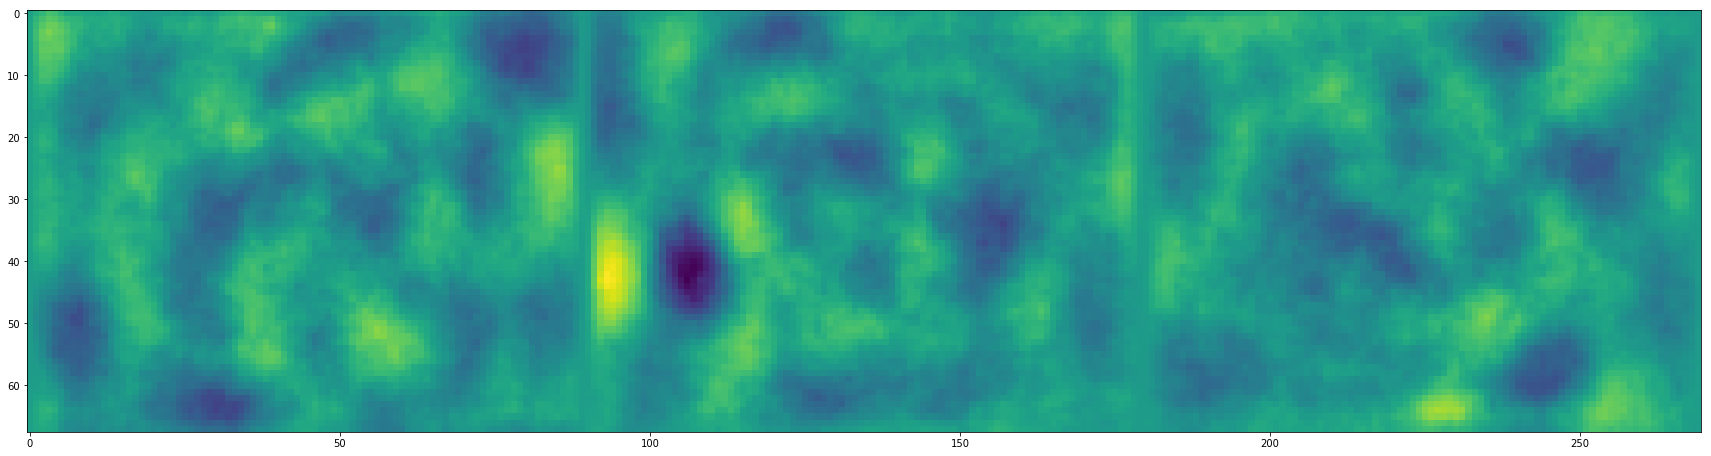

[[-1.6490353e-07 -5.7596668e-07 -9.3751987e-07 ...  1.1342634e-07
   3.2088047e-07  7.2512250e-08]
 [-7.0481242e-08 -7.2613580e-07 -1.5701829e-06 ...  3.7529568e-07
   1.5691739e-07 -3.8742156e-09]
 [-8.1350585e-08 -5.9092235e-07 -1.4592860e-06 ...  5.6539449e-07
   2.9179590e-08 -1.9432193e-07]
 ...
 [-3.6464687e-07 -5.3502271e-07  2.9638407e-08 ... -2.2776173e-06
  -1.0356601e-06 -2.1928808e-07]
 [-2.9290925e-07 -4.7546612e-07 -5.8805335e-07 ... -1.7318160e-06
  -9.8008934e-07 -1.7580014e-07]
 [-2.8164044e-07 -8.5893066e-07 -1.0280477e-06 ... -1.2777084e-06
  -6.6969062e-07 -3.0793566e-07]]


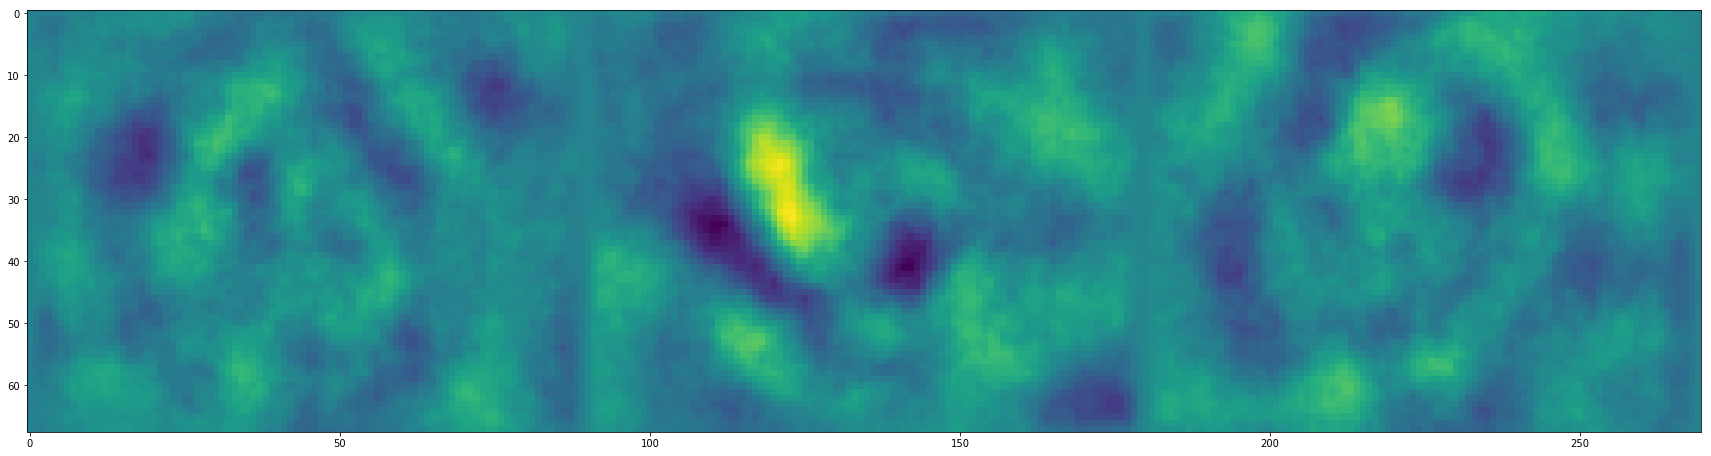

[[-7.62177805e-08  1.12373835e-08  4.12312232e-07 ... -2.19400317e-06
  -1.66366488e-06 -5.87615773e-07]
 [-1.75982564e-07  3.23706445e-07  9.80765890e-07 ... -3.29125487e-06
  -1.96289125e-06 -7.16461045e-07]
 [-2.12053692e-07  3.44345352e-07  1.12314558e-06 ... -4.62555272e-06
  -2.64374376e-06 -8.56575866e-07]
 ...
 [-5.05082141e-07 -9.77007289e-07 -1.47022854e-06 ...  2.72671127e-06
   1.28164197e-06  1.54401310e-08]
 [-5.13014129e-07 -8.91248249e-07 -1.29779505e-06 ...  9.46159560e-07
   3.38668684e-07 -2.20916334e-07]
 [-5.37880226e-07 -8.70930762e-07 -7.57342775e-07 ... -3.65158627e-07
  -7.89223009e-07 -4.25786084e-07]]


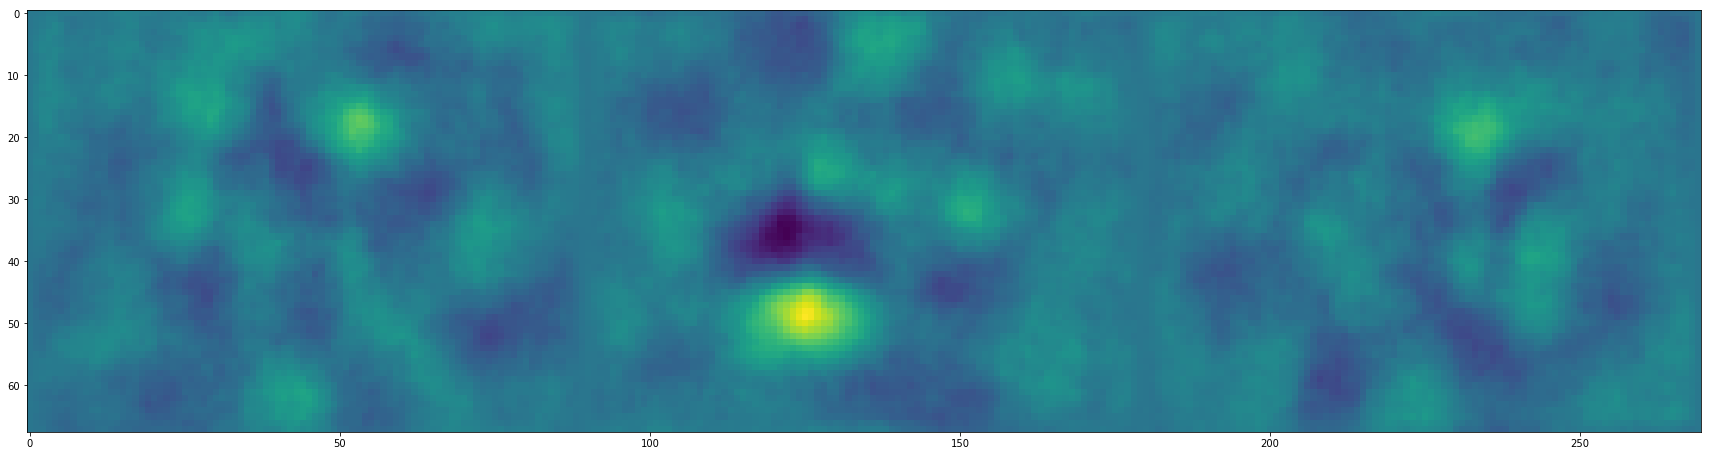

[[-1.8055896e-07  1.7725903e-07  6.0563639e-07 ... -1.8229049e-06
  -1.4068037e-06 -5.8428247e-07]
 [-1.7029012e-07  5.9350003e-07  1.7926141e-06 ... -2.4730368e-06
  -1.6977133e-06 -6.2359163e-07]
 [ 3.2315288e-08  1.1505862e-06  2.7401604e-06 ... -2.3651066e-06
  -1.8162719e-06 -6.8667720e-07]
 ...
 [-3.2605342e-07 -7.0518229e-07 -1.0066809e-06 ... -4.0027385e-06
  -3.3661661e-06 -1.1283895e-06]
 [-2.0549655e-07 -1.4798090e-07 -2.9968976e-07 ... -2.5879569e-06
  -2.1572207e-06 -7.9907539e-07]
 [-1.1938826e-07  2.3139073e-08  1.8615212e-07 ... -1.8179061e-06
  -1.4528956e-06 -6.6092565e-07]]


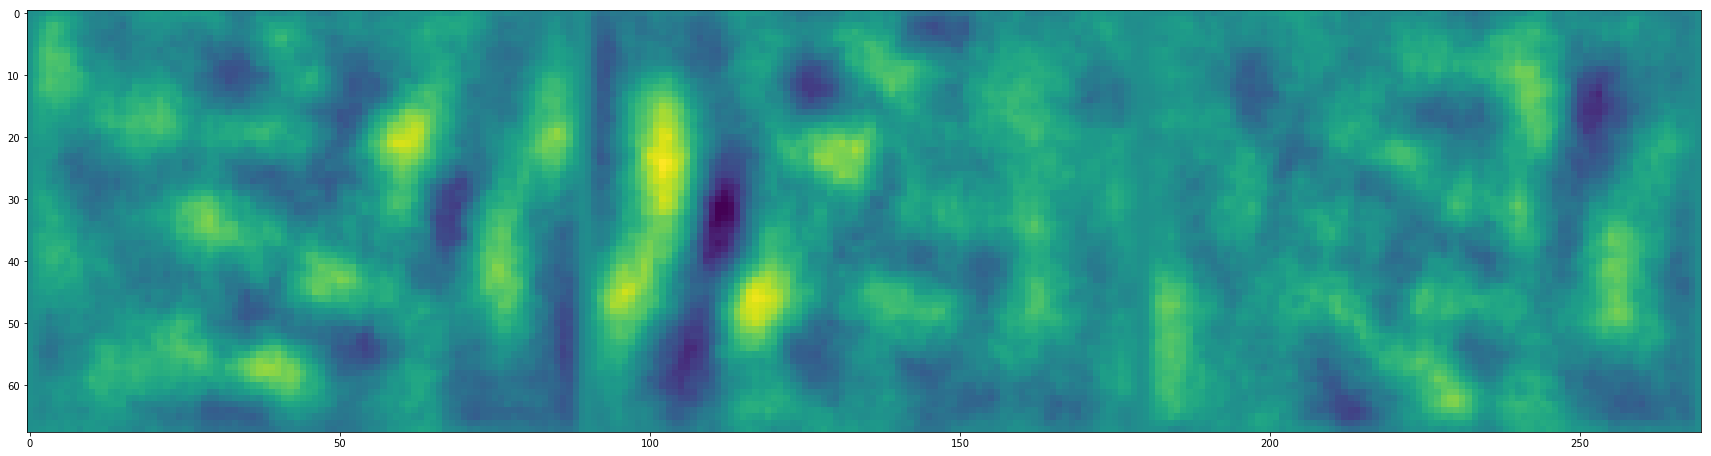

[[ 2.6682625e-07  3.8285265e-07 -9.3676945e-08 ...  1.7691059e-06
   1.3311185e-06  5.9492572e-07]
 [ 3.3925073e-07  4.5218445e-07  2.1500590e-08 ...  2.2518125e-06
   1.6540572e-06  6.8501521e-07]
 [ 2.9932949e-07  5.2917380e-07  1.3459756e-07 ...  2.1703993e-06
   1.8105326e-06  6.9906906e-07]
 ...
 [ 8.7466691e-07  3.0027188e-06  4.4669455e-06 ... -7.8785104e-07
   6.3351159e-08  2.2570512e-07]
 [ 6.3534026e-07  2.1156309e-06  3.4815173e-06 ... -9.1832288e-07
  -5.7305598e-08  2.0389849e-07]
 [ 4.9380992e-07  1.3235505e-06  2.3186412e-06 ... -3.9411373e-07
   7.3312854e-08  1.3048115e-07]]


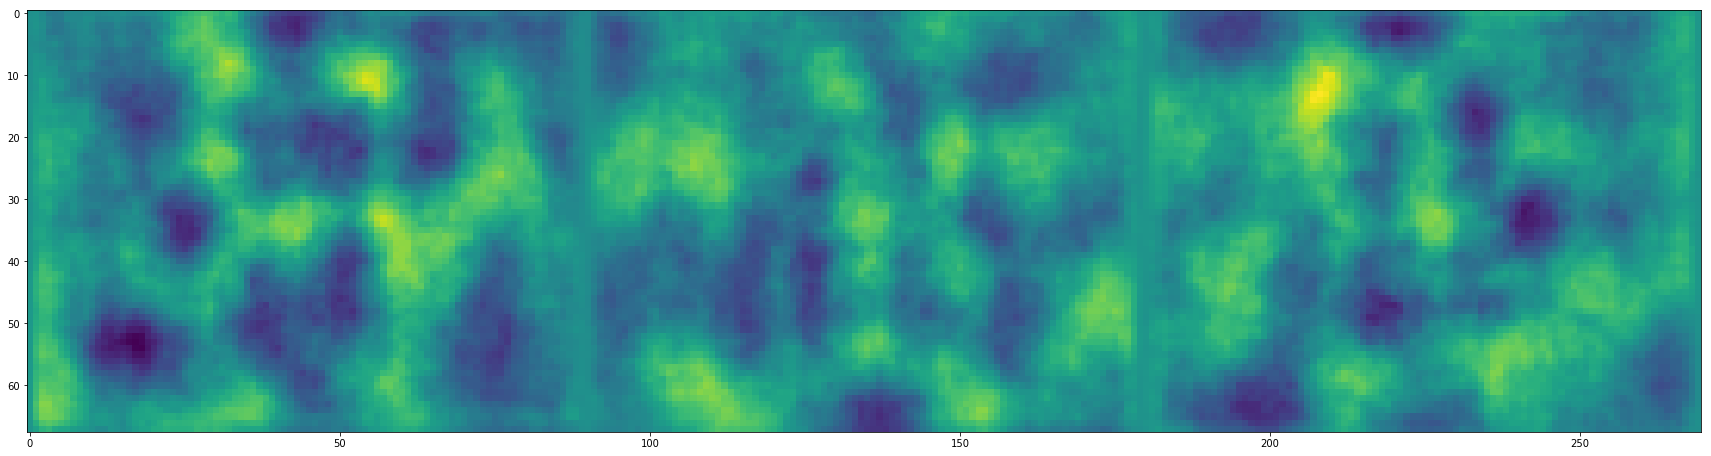

[[-2.8817985e-07  3.5992656e-07  1.0914724e-06 ... -2.0553778e-06
  -1.2056552e-06 -8.2376141e-07]
 [-3.3048482e-07 -3.4333382e-08  2.7034920e-07 ... -3.4507320e-06
  -2.3168507e-06 -9.4208633e-07]
 [-2.6140370e-07 -2.3699850e-07 -6.0856344e-08 ... -3.1756904e-06
  -2.6166806e-06 -1.1928671e-06]
 ...
 [ 3.4796628e-07  2.6110392e-06  4.2194288e-06 ... -6.2401449e-07
  -7.6977290e-07 -7.8168824e-07]
 [ 2.4323381e-07  1.6062675e-06  2.8133254e-06 ... -5.6140567e-07
  -7.6645972e-07 -7.8271171e-07]
 [ 1.7931593e-07  1.1912632e-06  1.8635105e-06 ... -5.0332352e-07
  -7.3827078e-07 -7.7865360e-07]]


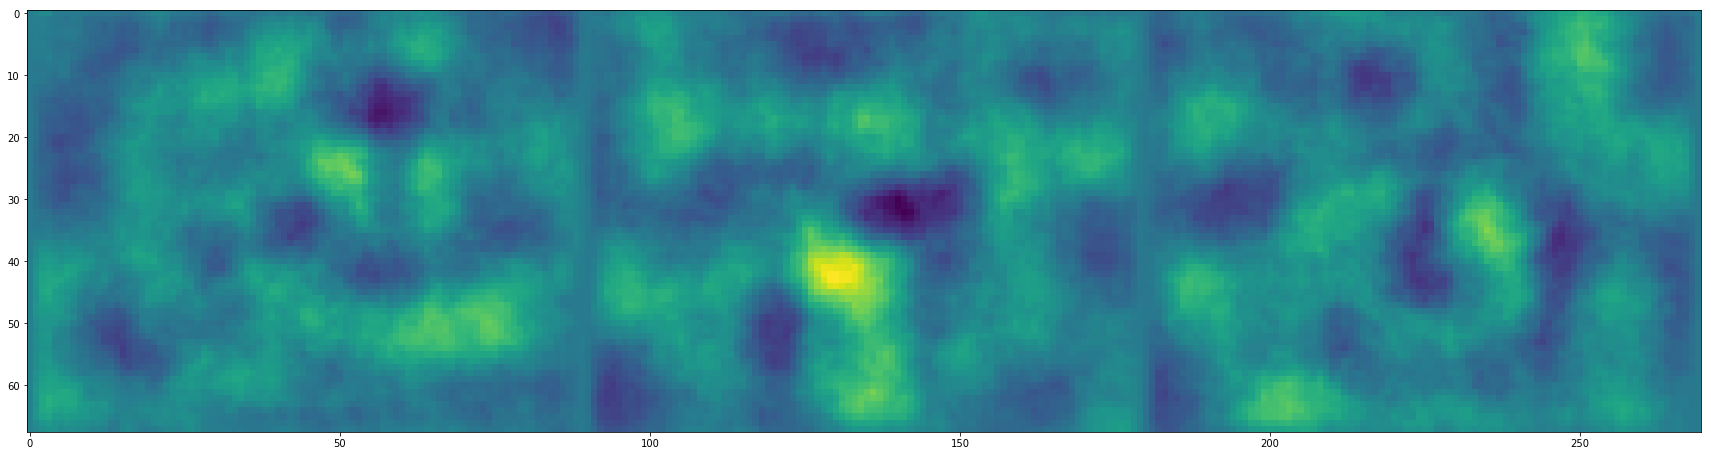

[[-9.3036171e-08  5.3014486e-07  1.1660192e-06 ... -3.7150048e-06
  -2.3129692e-06 -1.0413576e-06]
 [-1.1094669e-07  7.1980446e-07  1.7733738e-06 ... -4.1781191e-06
  -2.7449839e-06 -1.1416741e-06]
 [-1.2021195e-07  8.6489143e-07  1.7936050e-06 ... -4.6266496e-06
  -3.1385723e-06 -1.2540528e-06]
 ...
 [-2.8081084e-07  9.6349174e-07  1.5852895e-06 ... -3.8241333e-06
  -2.6463283e-06 -1.2403308e-06]
 [-3.4231371e-07  5.8934762e-07  1.0232789e-06 ... -3.5108210e-06
  -2.4378389e-06 -1.2031961e-06]
 [-4.7059595e-07 -2.6789095e-07  1.3001555e-07 ... -3.2038861e-06
  -2.1833976e-06 -1.2029018e-06]]


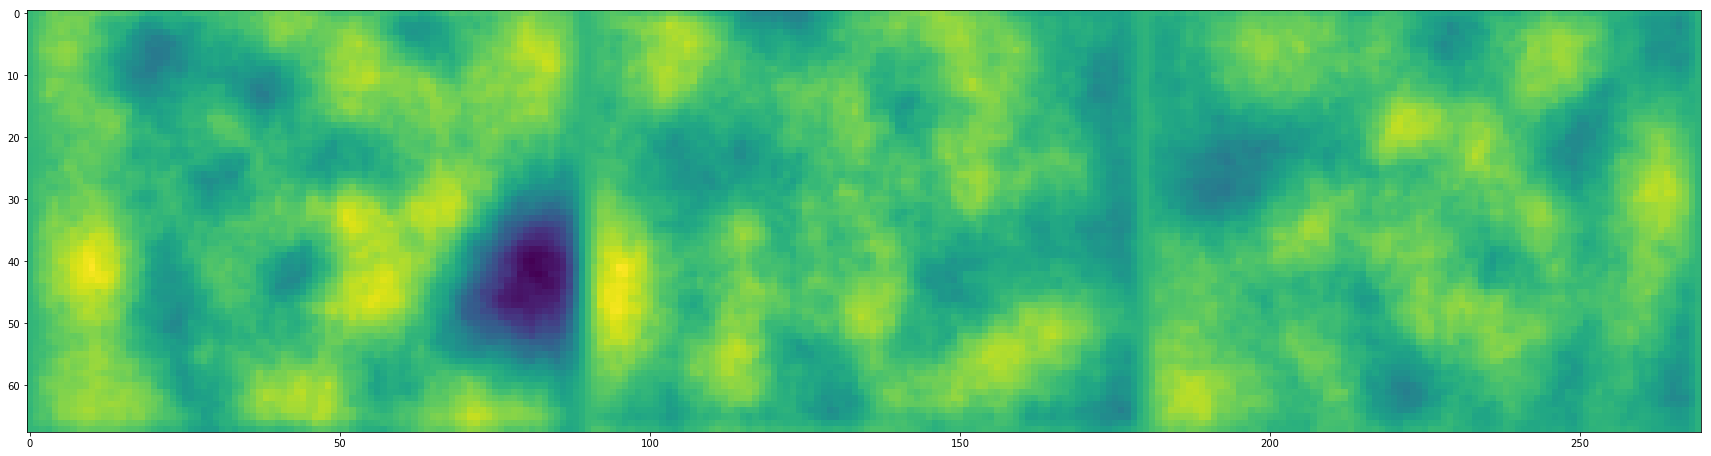

[[-6.2492870e-07  1.9510348e-07  1.1077726e-06 ...  2.6410842e-06
   1.5594928e-06  5.2993265e-08]
 [-3.7692959e-07  3.4194386e-07  1.6254990e-06 ...  2.6019552e-06
   1.5162545e-06  8.0362703e-08]
 [-2.9578788e-07  7.4403090e-07  2.1409653e-06 ...  3.5022897e-06
   1.6146748e-06  3.3875157e-08]
 ...
 [-7.4168474e-07 -8.4139162e-07 -1.0781813e-06 ...  2.3756365e-06
   1.4695141e-06  1.4542681e-07]
 [-6.1343889e-07 -8.2532966e-07 -8.8227040e-07 ...  2.8377581e-06
   1.5593250e-06  7.4734920e-08]
 [-5.6623838e-07 -6.3469918e-07 -6.1304758e-07 ...  2.8012416e-06
   1.5022945e-06  9.6897494e-08]]


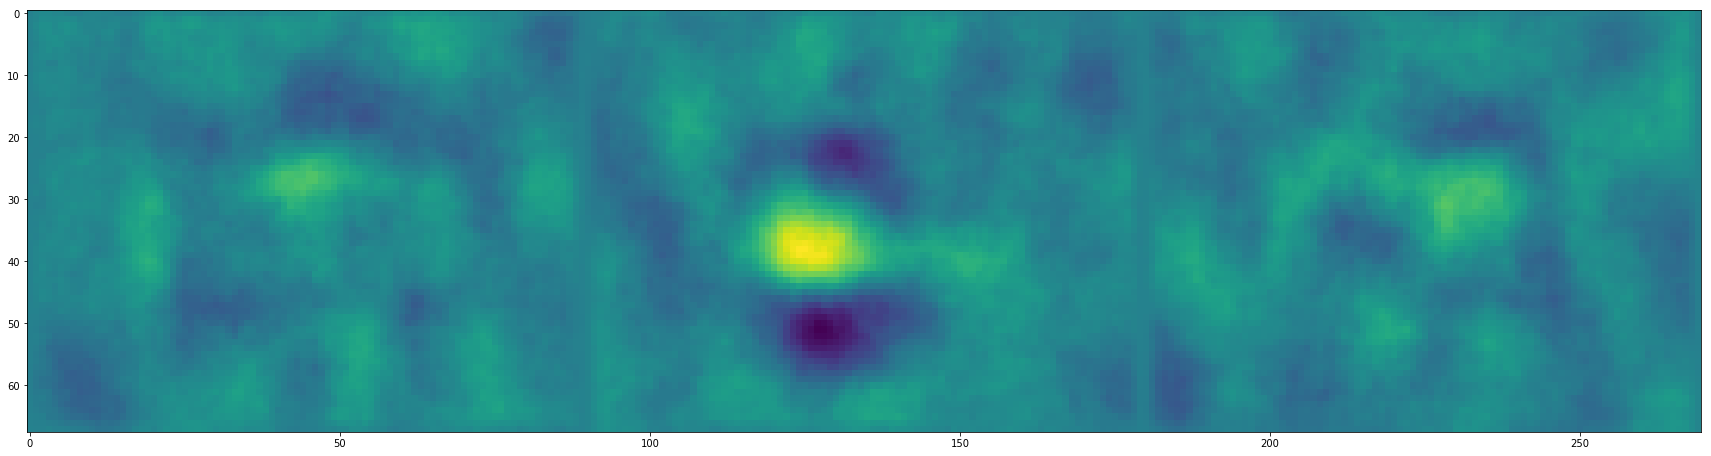

[[-9.9941850e-08 -2.7935292e-07 -7.6249597e-07 ... -1.4025684e-06
  -3.3043304e-07  7.1207602e-08]
 [-1.1711947e-08 -1.8210987e-07 -8.7346893e-07 ... -2.6655700e-06
  -1.2996527e-06 -9.5104816e-08]
 [-7.6173087e-08 -1.4230567e-07 -4.0698225e-07 ... -3.0599356e-06
  -1.7609452e-06 -3.7783593e-07]
 ...
 [ 2.8305985e-08 -1.7663108e-07 -7.3255183e-07 ...  4.6510750e-06
   2.8986763e-06  5.6523754e-07]
 [ 1.7903015e-07 -2.5220714e-07 -3.4283212e-07 ...  3.9515585e-06
   2.3073228e-06  5.2237004e-07]
 [ 1.9521957e-07  2.2230664e-07  4.9244829e-07 ...  3.2425478e-06
   1.6968636e-06  4.2069382e-07]]


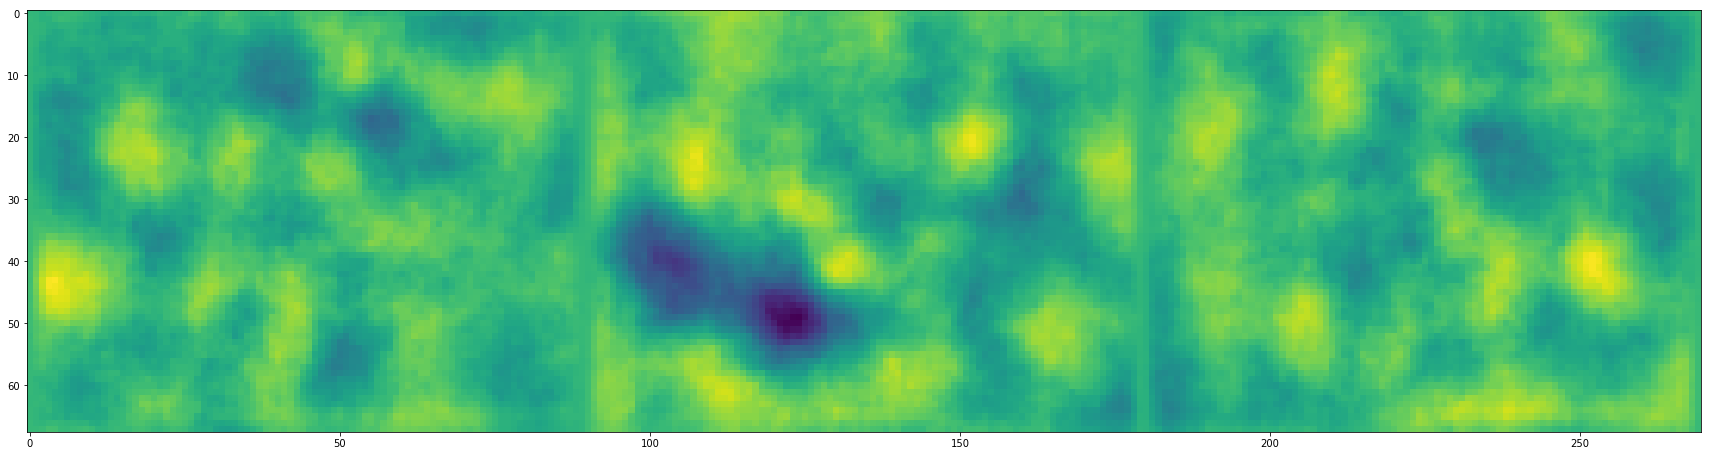

[[ 5.9532795e-07  6.1444132e-07  3.7234031e-07 ...  1.7223244e-06
   1.2779309e-06  8.6746996e-07]
 [ 5.6408777e-07  2.2716804e-07 -5.8650755e-07 ...  8.2651030e-07
   5.7229732e-07  8.1722612e-07]
 [ 4.6976749e-07 -5.8124588e-08 -9.2949989e-07 ...  3.6925050e-07
  -4.2905540e-08  5.6465780e-07]
 ...
 [ 1.6875802e-07 -1.6912174e-06 -2.9809923e-06 ...  3.0443707e-06
   2.2582133e-06  1.3712767e-06]
 [ 4.3235852e-07 -8.8481278e-07 -2.1538769e-06 ...  3.3998347e-06
   2.5065649e-06  1.4256995e-06]
 [ 5.1526092e-07 -4.9739180e-07 -1.1873317e-06 ...  3.4542643e-06
   2.8178097e-06  1.4369898e-06]]


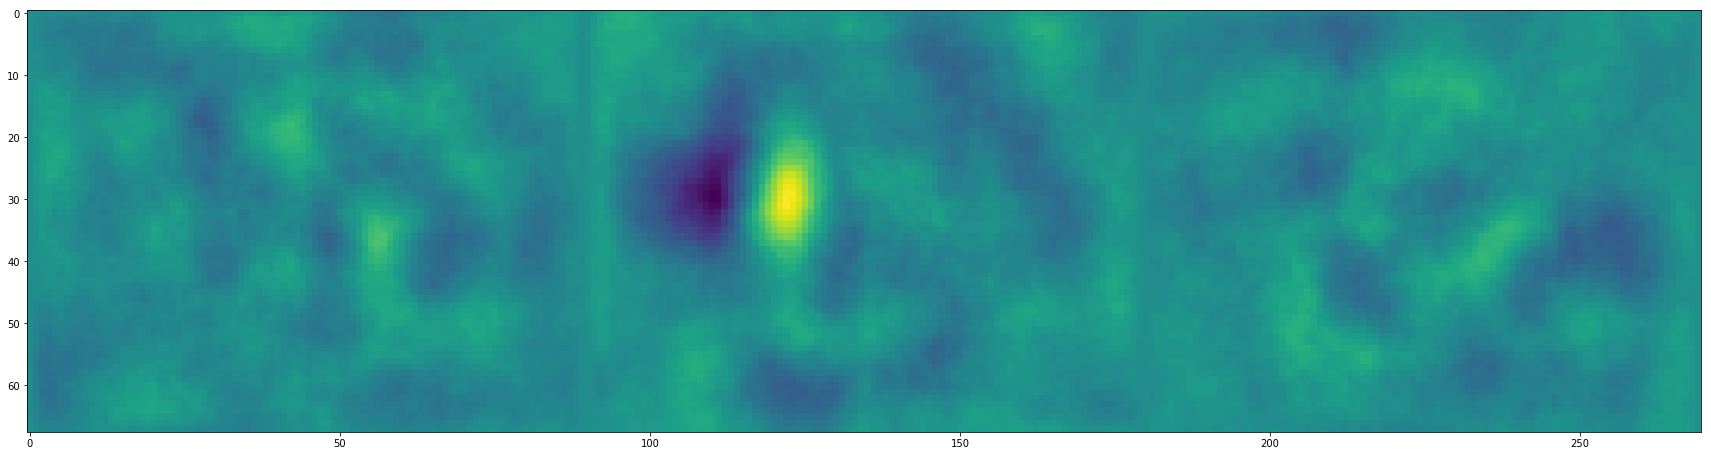

[[1.2202092e-06 1.9891590e-06 2.2978822e-06 ... 1.0827620e-06
  1.2661341e-06 9.0126076e-07]
 [1.2172366e-06 1.6707806e-06 1.9884446e-06 ... 1.6098408e-06
  1.2603757e-06 9.8871783e-07]
 [1.2049225e-06 1.4913572e-06 1.6360801e-06 ... 1.2179295e-06
  9.8720125e-07 8.3856963e-07]
 ...
 [1.4352858e-06 2.9072908e-06 4.7046528e-06 ... 3.8304017e-07
  7.2317232e-07 9.1073957e-07]
 [1.2240353e-06 2.5077450e-06 3.9425336e-06 ... 7.2467799e-07
  7.7260916e-07 8.2171260e-07]
 [1.2035737e-06 2.2102543e-06 2.7994734e-06 ... 1.0513546e-06
  9.2560953e-07 8.7746241e-07]]


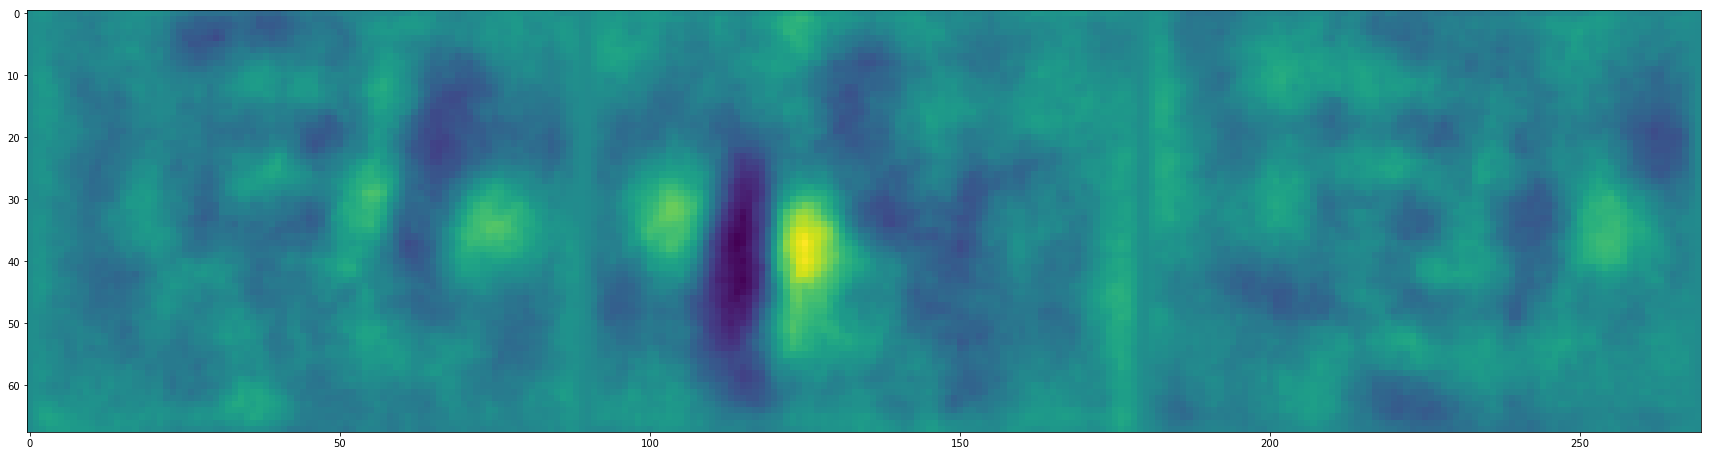

[[ 2.04560493e-07  9.54363259e-07  1.64590165e-06 ...  3.32604600e-07
  -7.32267367e-08 -9.42440934e-08]
 [ 1.64101081e-07  8.57753662e-07  1.44084333e-06 ...  2.25951976e-06
   1.15276441e-06  9.15535594e-08]
 [ 1.57379262e-07  1.20981804e-06  2.27978694e-06 ...  2.84848238e-06
   2.46079207e-06  5.26861015e-07]
 ...
 [-2.96295770e-08  2.22976297e-07 -1.17106991e-08 ... -1.53486127e-07
  -1.07015641e-08 -2.28089405e-07]
 [-1.39048282e-07 -4.39100845e-08  9.38886942e-08 ... -3.06908731e-07
  -3.59512228e-07 -1.53912055e-07]
 [-1.12221436e-07 -9.67844684e-08 -4.18682582e-08 ...  2.30488581e-07
  -3.25359508e-07 -2.63901001e-07]]


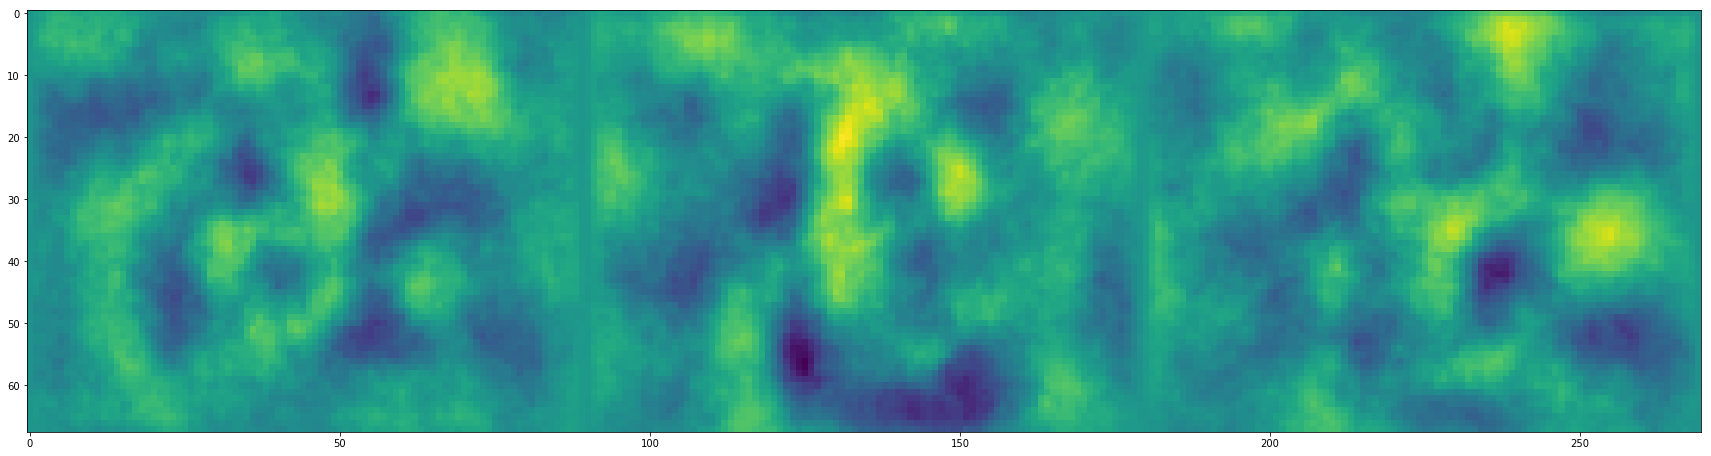

[[-2.3209118e-07 -7.5906235e-07 -1.7620901e-06 ...  1.9309161e-06
   1.1218590e-06  4.6196436e-07]
 [-3.7511452e-07 -1.4735751e-06 -2.7489807e-06 ...  1.9813501e-06
   1.4444643e-06  4.1142451e-07]
 [-3.9938138e-07 -1.7690670e-06 -3.4231846e-06 ...  1.9793804e-06
   1.1380866e-06  3.5733979e-07]
 ...
 [-3.0400622e-07 -1.4300779e-06 -2.3904900e-06 ...  2.0927589e-06
   1.0829717e-06  4.3966409e-07]
 [-3.5532818e-08 -6.4494003e-07 -1.3554630e-06 ...  1.8874435e-06
   1.2340793e-06  6.0140025e-07]
 [-2.4322180e-08 -3.0044720e-07 -4.3490783e-07 ...  2.4363023e-06
   1.7720419e-06  6.5991105e-07]]


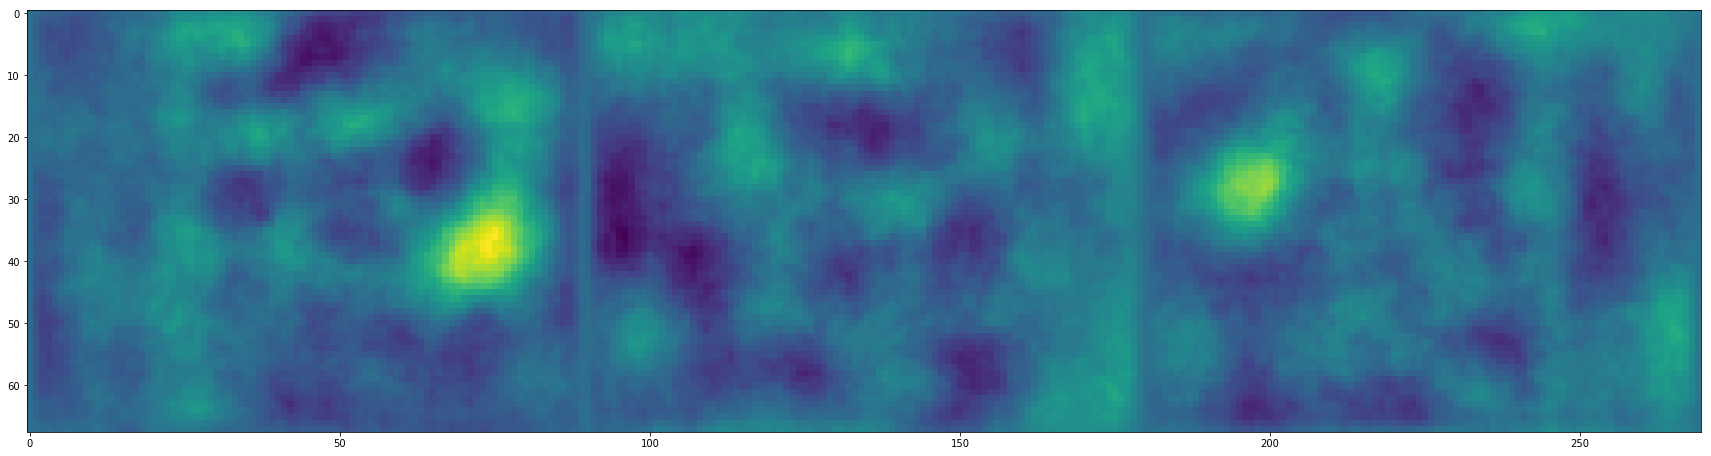

[[ 1.13494991e-06  1.59842739e-06  2.22531048e-06 ...  9.27635085e-07
   1.26175814e-06  1.01530657e-06]
 [ 1.24163932e-06  2.12751206e-06  2.79632627e-06 ...  2.30879110e-07
   4.48778309e-07  9.35510172e-07]
 [ 1.10992812e-06  1.95536995e-06  2.84043563e-06 ... -1.05991035e-07
   2.72761810e-07  8.12071278e-07]
 ...
 [ 9.22263439e-07  1.35415826e-06  1.77806851e-06 ...  1.49285290e-06
   1.11366830e-06  8.39832637e-07]
 [ 7.28796522e-07  8.44781482e-07  8.81833842e-07 ...  5.56616328e-07
   6.85992461e-07  7.21689844e-07]
 [ 6.30971670e-07  3.46725898e-07 -7.83892631e-08 ... -4.55567402e-07
   9.27494028e-08  6.95927838e-07]]


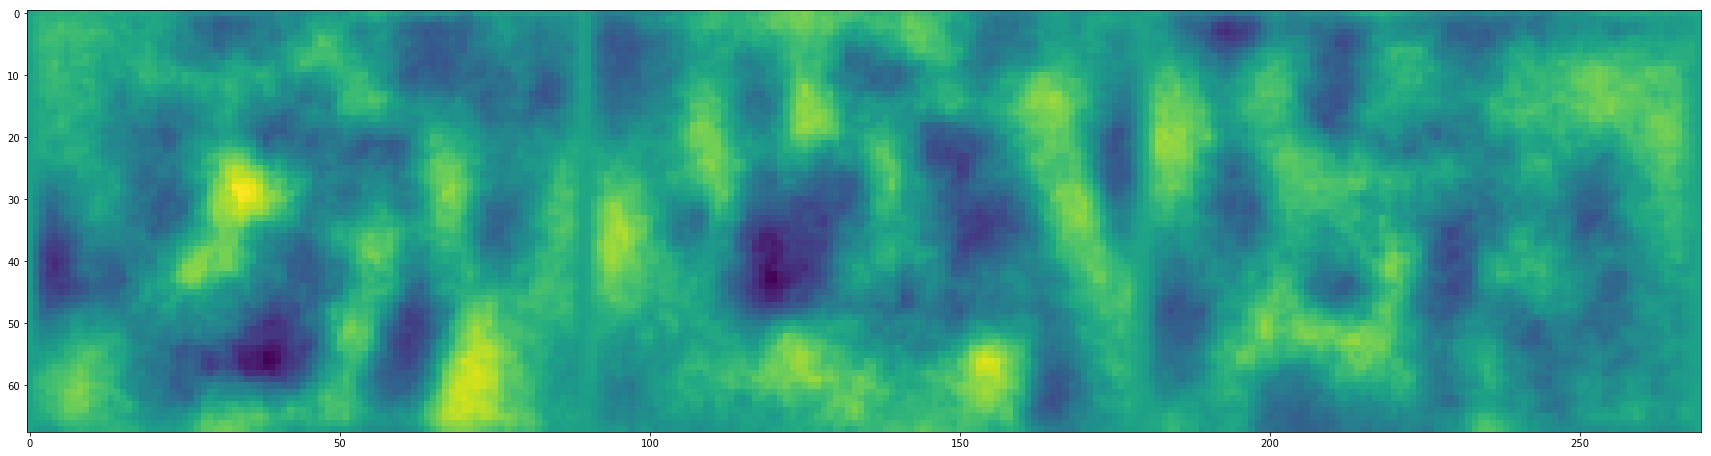

[[ 5.1463905e-07  6.8098234e-07  5.9684118e-07 ...  4.2585177e-07
   2.2055669e-07  2.4102906e-07]
 [ 4.1065354e-07  3.8216152e-07  1.2658630e-07 ...  9.9523142e-08
   2.1782022e-07  3.0658126e-07]
 [ 3.1052463e-07  3.8587024e-07 -6.6345734e-08 ...  2.9630229e-07
   3.7410928e-07  4.8259017e-07]
 ...
 [ 8.6768915e-07  2.4253604e-06  3.3180552e-06 ...  1.4440865e-06
   1.0360779e-06  3.8949207e-07]
 [ 6.2211581e-07  1.7178694e-06  2.5335526e-06 ...  9.7935083e-07
   7.1431879e-07  3.1846585e-07]
 [ 5.5192356e-07  1.2102244e-06  1.8768704e-06 ...  7.8479087e-07
   5.5916036e-07  3.3905303e-07]]


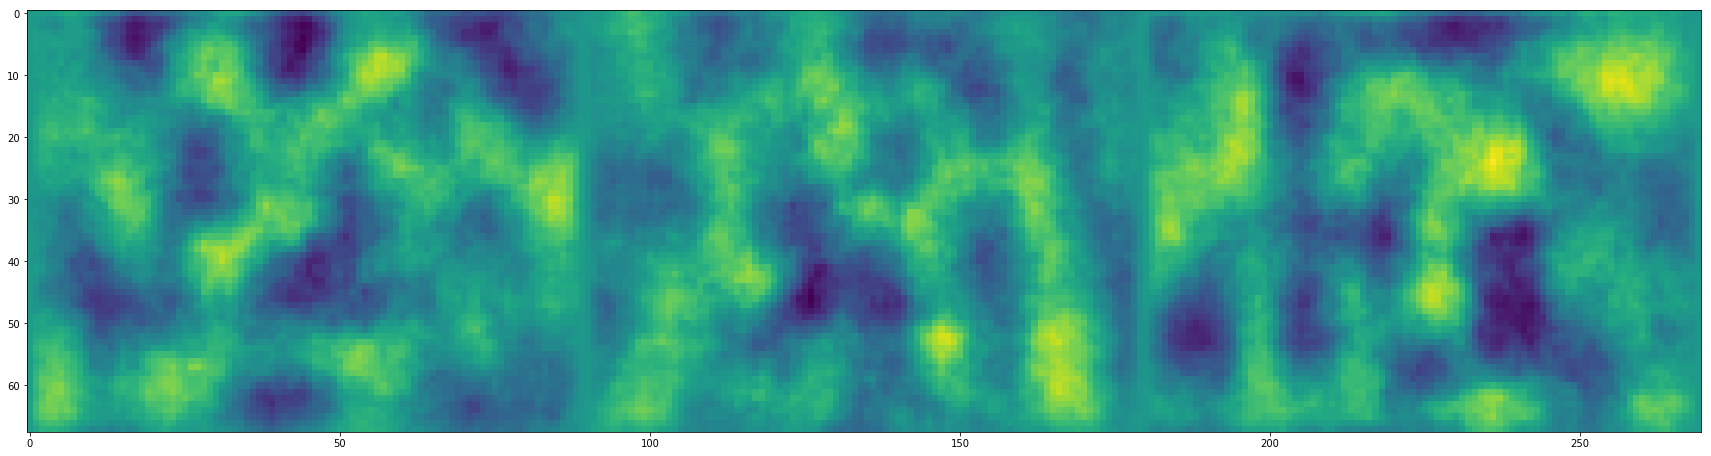

[[ 8.8592795e-09  6.0740348e-07  1.2757496e-06 ...  7.7830873e-07
   6.0838425e-07  2.6984452e-07]
 [-2.4294584e-08  5.2503788e-07  1.1562066e-06 ... -1.4677019e-08
  -1.2696994e-07  1.0638328e-07]
 [ 1.6630334e-08  6.2091993e-07  1.3153069e-06 ... -2.0832381e-07
  -3.4601700e-07 -2.4278457e-08]
 ...
 [-3.8955113e-07 -1.6041254e-06 -2.6904029e-06 ...  3.7817772e-06
   2.2762033e-06  6.3809523e-07]
 [-1.9960176e-07 -1.1635107e-06 -2.0208495e-06 ...  3.3843899e-06
   1.9321769e-06  7.0116994e-07]
 [-1.2166767e-07 -4.2344149e-07 -9.3596782e-07 ...  2.7789865e-06
   1.5856689e-06  6.1476243e-07]]


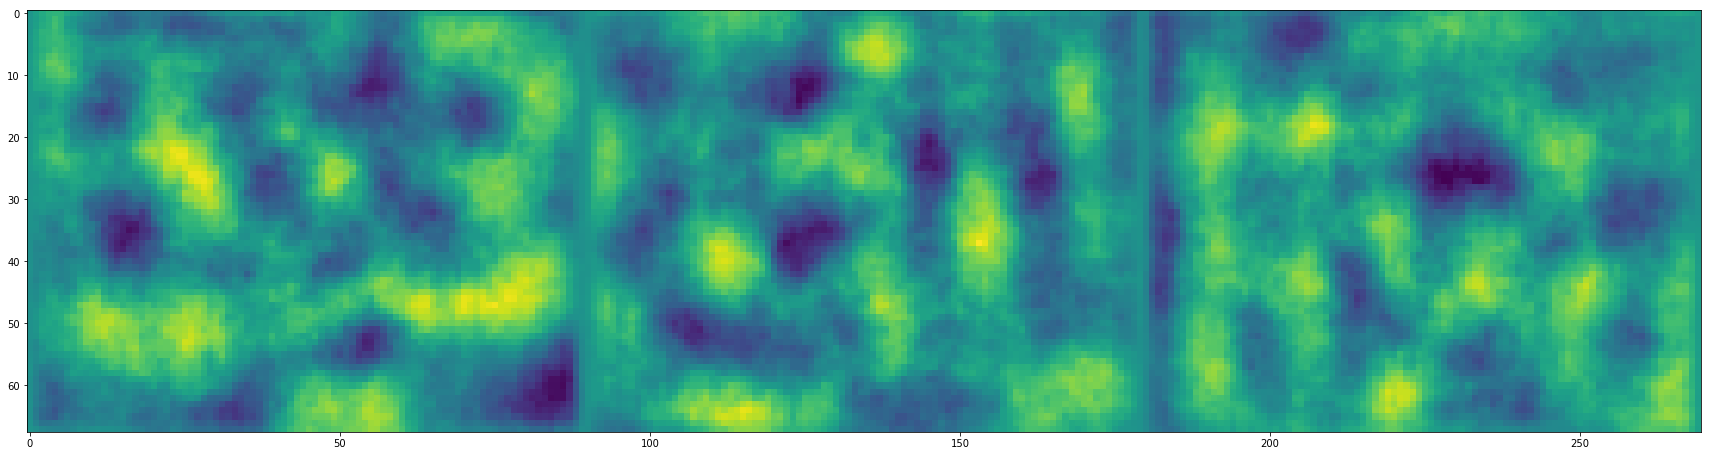

[[ 2.2003746e-07 -2.7409169e-07 -9.7199222e-07 ... -1.7958341e-06
  -1.2148141e-06 -3.0477315e-07]
 [ 2.2449844e-07 -4.8291855e-07 -1.2460065e-06 ... -1.3575851e-06
  -5.4783118e-07 -7.5631718e-08]
 [ 1.5169860e-07 -5.0890662e-07 -9.9614556e-07 ... -1.7606382e-06
  -6.7233873e-07  1.7352784e-08]
 ...
 [ 6.0183697e-07  1.5040670e-06  2.0209825e-06 ... -1.2422727e-06
  -5.4684261e-07  6.6803331e-08]
 [ 3.2791377e-07  3.0495315e-07  6.7832212e-07 ... -2.0534785e-06
  -7.7050430e-07  5.4873631e-08]
 [ 1.9916911e-07 -5.6569917e-07 -6.9979336e-07 ... -2.2832526e-06
  -8.8516731e-07 -7.1451836e-08]]


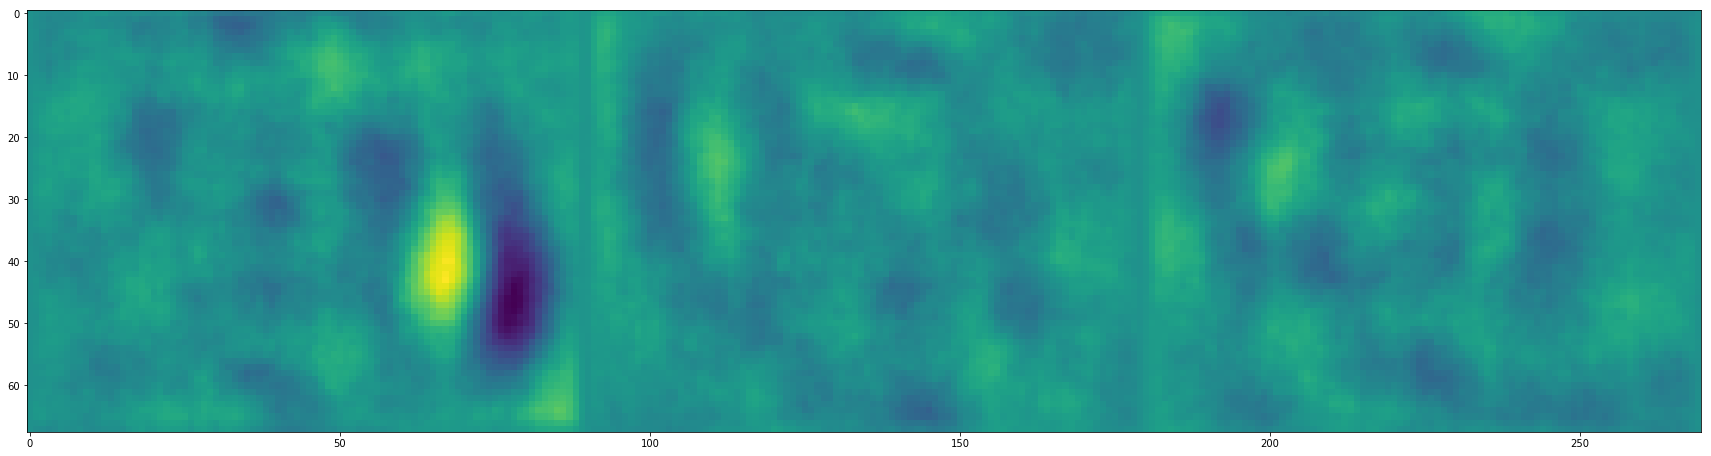

[[ 1.5005961e-06  1.5303370e-06  1.4643363e-06 ... -3.0585543e-06
  -1.3790545e-06  4.8992166e-07]
 [ 1.3910170e-06  1.4730051e-06  1.0443938e-06 ... -3.7057941e-06
  -1.7832665e-06  3.5512298e-07]
 [ 1.3274254e-06  9.0996792e-07 -3.0039285e-08 ... -3.6968320e-06
  -1.6692161e-06  4.8073827e-07]
 ...
 [ 1.2631001e-06  9.8181533e-07  1.1562438e-06 ...  1.0028467e-06
   1.4330602e-06  1.3171453e-06]
 [ 1.1779769e-06  1.2080692e-06  9.6605004e-07 ...  7.7237956e-07
   1.1362110e-06  1.2151113e-06]
 [ 1.1406996e-06  9.1036287e-07  4.3634449e-07 ...  7.3653126e-07
   8.7940595e-07  1.2067908e-06]]


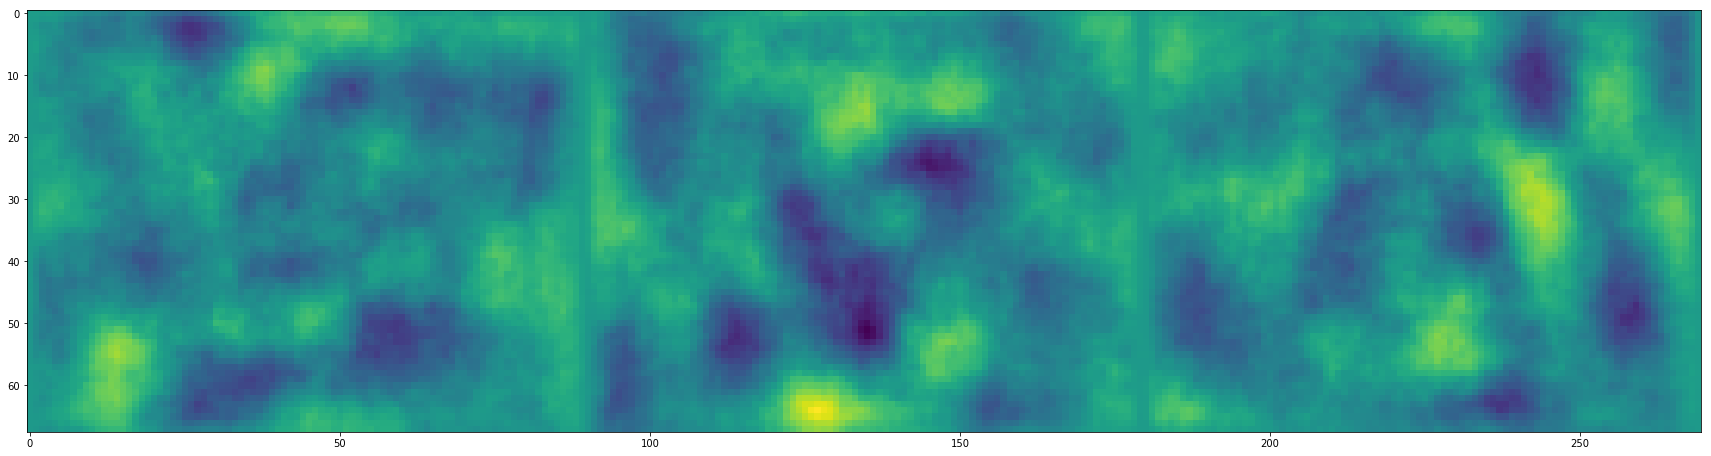

[[ 2.7486652e-07  1.8795620e-07  5.1677540e-07 ... -8.0320848e-07
  -6.4411154e-07  7.2321470e-08]
 [ 2.8893189e-07  6.3676293e-07  9.5115553e-07 ... -1.4182151e-06
  -9.0365336e-07  2.1365507e-08]
 [ 3.7655863e-07  9.2894720e-07  1.3742015e-06 ... -1.3868619e-06
  -6.4921568e-07  2.3422926e-07]
 ...
 [ 5.4923223e-08 -8.9670203e-07 -2.3414950e-06 ... -1.7645159e-06
  -1.4392297e-06 -1.2086750e-07]
 [ 9.3575574e-09 -7.5701962e-07 -1.7412563e-06 ... -1.9505742e-06
  -1.1929283e-06 -4.7007727e-08]
 [-6.5333182e-08 -6.3250923e-07 -1.0975374e-06 ... -1.6936506e-06
  -9.5559392e-07 -1.0015761e-07]]


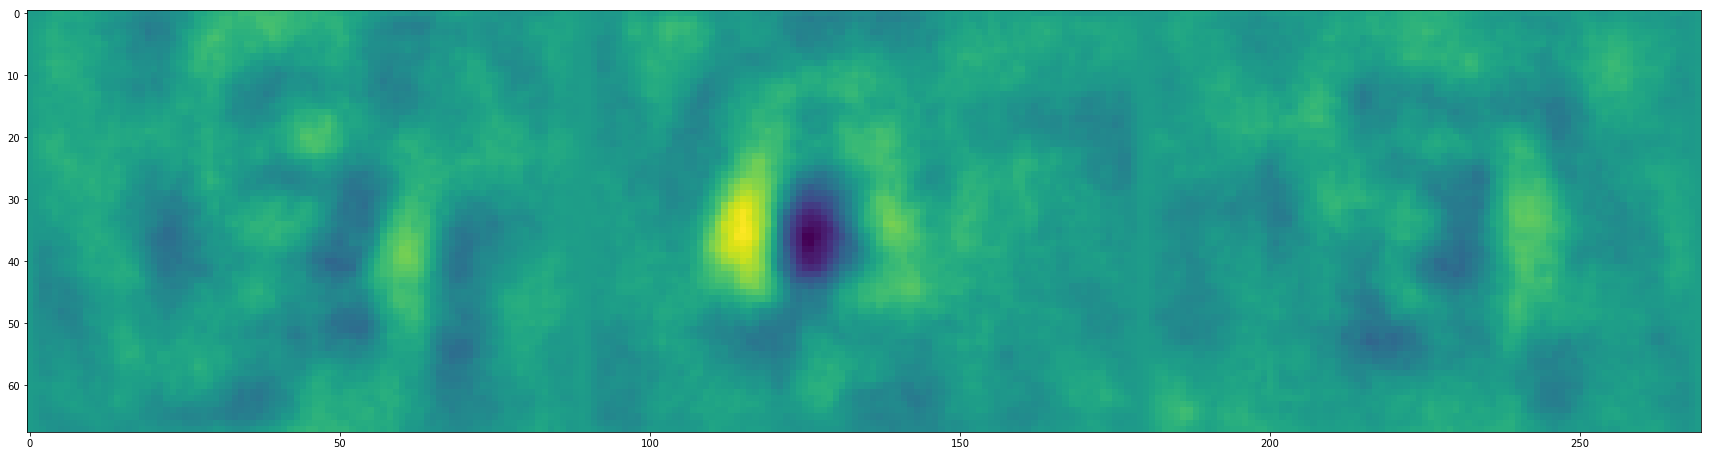

[[ 2.84272829e-07  6.07162747e-07  1.21228527e-06 ... -2.82912902e-06
  -2.10762823e-06 -5.85977432e-07]
 [ 4.08418742e-07  1.14160139e-06  2.00743261e-06 ... -3.39099756e-06
  -2.16878539e-06 -6.08221285e-07]
 [ 5.56135660e-07  1.37536961e-06  1.59988213e-06 ... -3.62072205e-06
  -2.31268518e-06 -5.48174796e-07]
 ...
 [-4.39278892e-07 -2.77585991e-06 -4.47285993e-06 ...  2.19947492e-06
   6.53641905e-07  5.37550804e-08]
 [-8.55605791e-08 -1.35584287e-06 -2.50255243e-06 ...  1.33646222e-06
   3.92134751e-08 -1.47759152e-07]
 [-5.04878663e-08 -5.39738210e-07 -1.32149694e-06 ...  7.24098300e-07
   8.96039438e-08 -1.09665116e-07]]


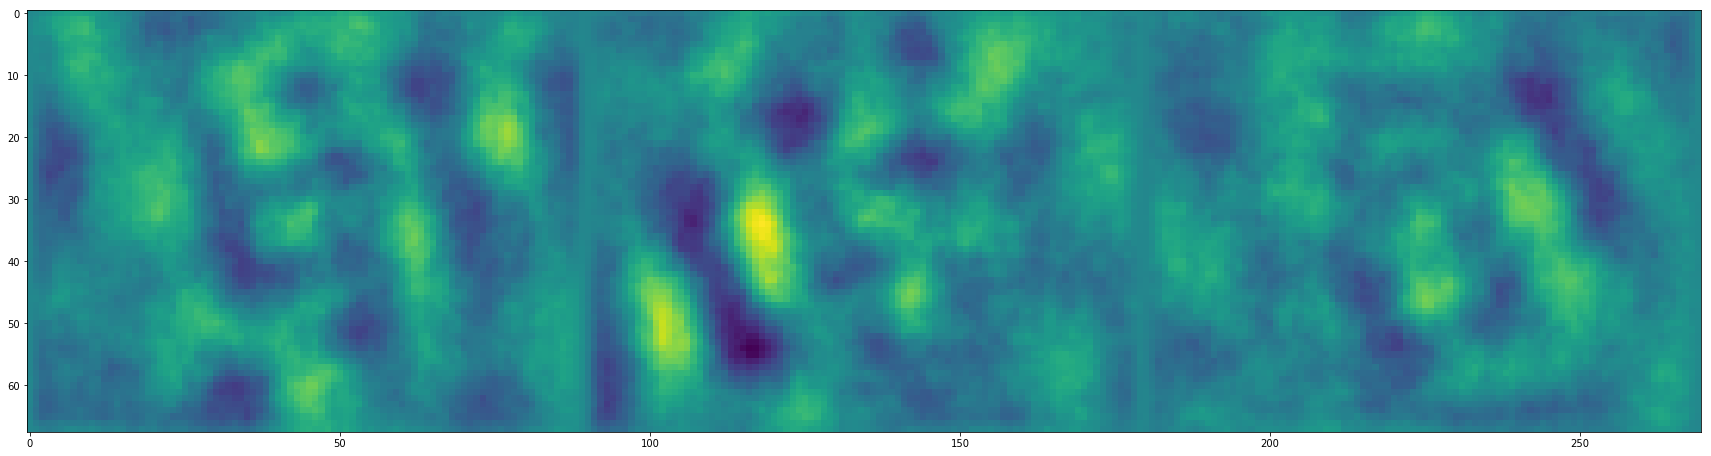

[[-5.1097834e-07 -5.7440036e-07 -2.8048694e-07 ...  1.5632541e-07
   8.4344137e-08 -2.9301410e-07]
 [-4.5121743e-07 -1.5544134e-07  1.5765845e-07 ...  5.5542438e-07
   4.4018512e-07 -2.5897603e-07]
 [-3.9831806e-07  1.8657937e-09  2.1598706e-07 ...  6.5329408e-07
   5.9388873e-07 -1.4285652e-07]
 ...
 [ 5.5366225e-08  1.6264914e-06  2.7505575e-06 ... -3.3520348e-07
  -3.2551765e-07 -4.6087453e-07]
 [-6.5525860e-08  1.1930746e-06  2.2969189e-06 ... -8.9696499e-07
  -6.9932190e-07 -5.2105395e-07]
 [-1.3157100e-07  9.9884028e-07  1.7018397e-06 ... -1.3098867e-06
  -9.5417170e-07 -5.4112161e-07]]


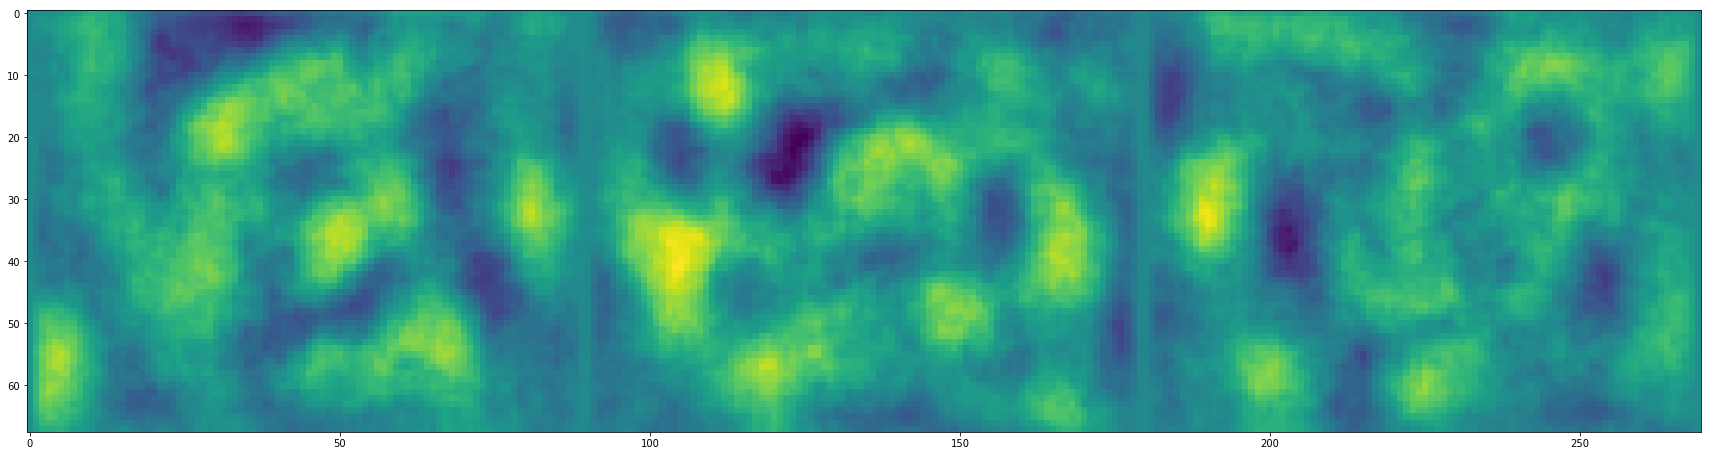

[[-4.5526360e-07 -3.5976996e-07 -4.1414918e-07 ...  7.9450707e-08
  -1.9484048e-07 -3.3406332e-07]
 [-6.3317282e-07 -7.7016097e-07 -3.2574053e-07 ...  6.7019340e-07
   4.1146226e-08 -2.2269482e-07]
 [-6.8990926e-07 -8.7792517e-07 -2.2759902e-07 ...  1.2578558e-06
   5.0493355e-07 -1.5543816e-07]
 ...
 [-6.4714328e-07 -1.3048962e-06 -1.3563142e-06 ... -3.7480970e-06
  -2.2267268e-06 -8.0801522e-07]
 [-6.6697669e-07 -1.1183358e-06 -9.4768080e-07 ... -2.5558927e-06
  -1.3314985e-06 -6.2012970e-07]
 [-5.8949115e-07 -7.8937984e-07 -7.7249007e-07 ... -2.1961575e-06
  -1.3457560e-06 -5.2495716e-07]]


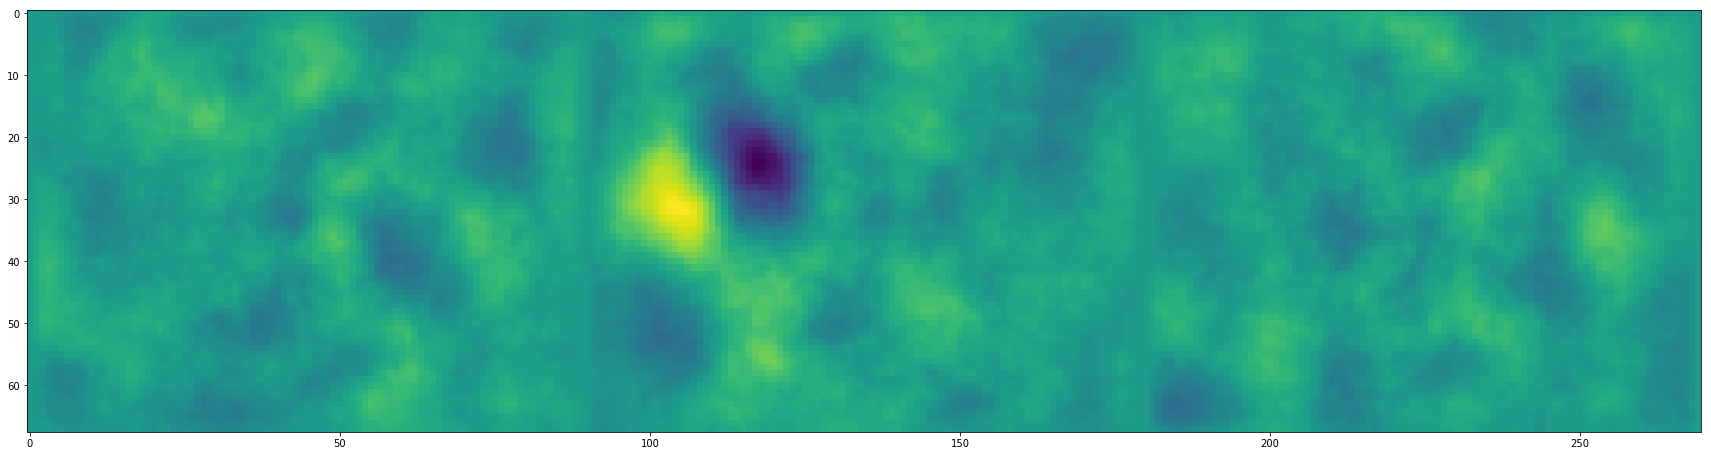

[[-2.10231136e-07 -3.51260667e-07  2.66003013e-07 ...  1.04769856e-06
   4.34552049e-07  1.50555309e-07]
 [-5.81921284e-08  8.22927291e-08  6.31066030e-07 ...  1.75888238e-06
   1.03948855e-06  2.24742706e-07]
 [ 1.38333476e-07  3.92384180e-07  1.52879727e-06 ...  2.50758944e-06
   1.46744014e-06  3.24790790e-07]
 ...
 [-2.22062280e-08 -6.83685585e-07 -1.21183928e-06 ...  3.14705676e-06
   1.48830338e-06  4.83833844e-07]
 [ 1.78979647e-07 -1.72333046e-07 -1.06431266e-07 ...  2.37462450e-06
   8.78986782e-07  4.22170814e-08]
 [ 4.49322215e-07  6.47130264e-07  5.28570183e-07 ...  1.03430955e-06
   3.46046136e-07  8.40946726e-08]]


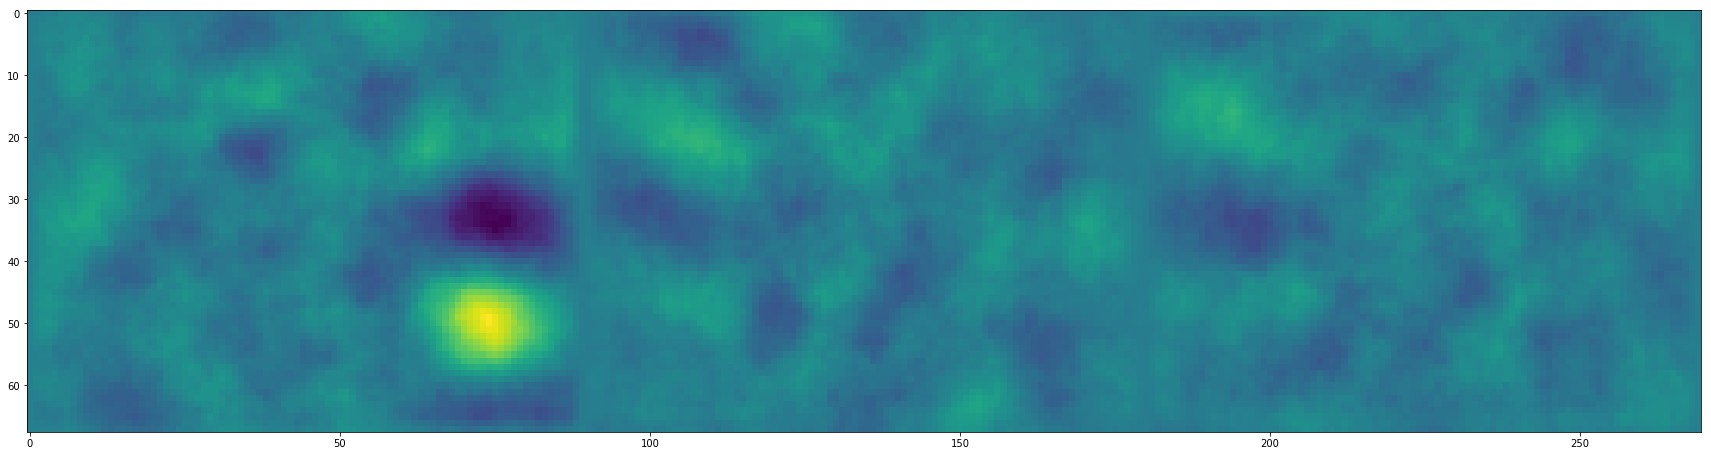

[[-6.4272098e-07 -1.0593958e-07  3.9589250e-07 ...  5.4993520e-06
   3.0062172e-06  7.9167364e-08]
 [-4.7227044e-07  5.4405979e-07  1.1139394e-06 ...  8.3892392e-06
   5.0037547e-06  4.4108538e-07]
 [-4.0309527e-07  8.1853824e-07  1.5514909e-06 ...  9.6257318e-06
   5.9010908e-06  8.5154767e-07]
 ...
 [-1.0389817e-06 -1.2340630e-06 -1.7494373e-06 ... -1.5480647e-06
  -7.6889046e-07 -6.7963521e-07]
 [-1.0815214e-06 -9.2920925e-07 -1.2511597e-06 ... -1.0895124e-06
  -7.5687836e-07 -7.6307407e-07]
 [-1.0520754e-06 -7.8962910e-07 -1.0499310e-06 ... -4.7286468e-07
  -5.5694051e-07 -7.0316253e-07]]


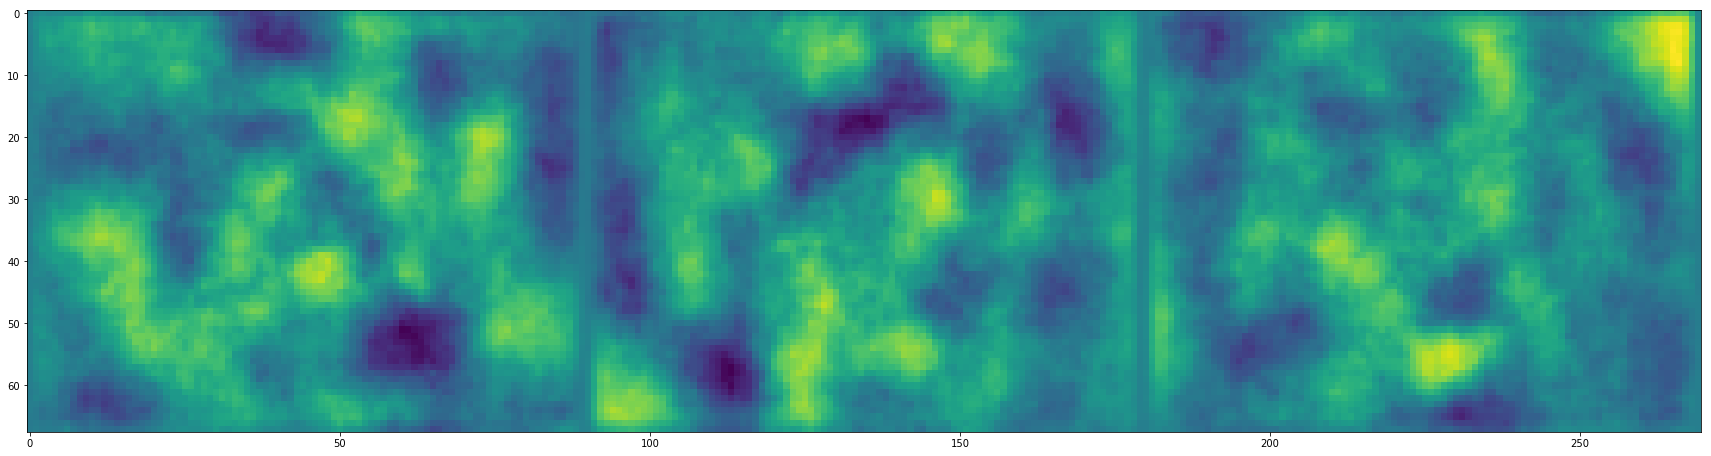

[[-3.6079459e-07 -2.1541132e-06 -3.8618500e-06 ... -5.1953731e-07
  -1.1431225e-07  3.1709126e-07]
 [-3.5462614e-07 -2.2563722e-06 -4.1633707e-06 ...  6.9791224e-07
   5.7124862e-07  3.8010552e-07]
 [-4.4116010e-07 -2.4207809e-06 -4.0576442e-06 ...  1.3292841e-06
   9.6520102e-07  4.3852546e-07]
 ...
 [ 1.7819470e-07 -9.0382684e-08  1.4179246e-07 ...  5.6214623e-07
   1.1140521e-06  6.1627014e-07]
 [ 8.0926817e-08 -2.6432355e-07 -3.3173683e-07 ... -6.6434879e-08
   5.6748587e-07  4.5131461e-07]
 [ 1.4522573e-07 -5.3786101e-07 -9.1069870e-07 ... -2.3106354e-07
   2.7726836e-07  4.2398185e-07]]


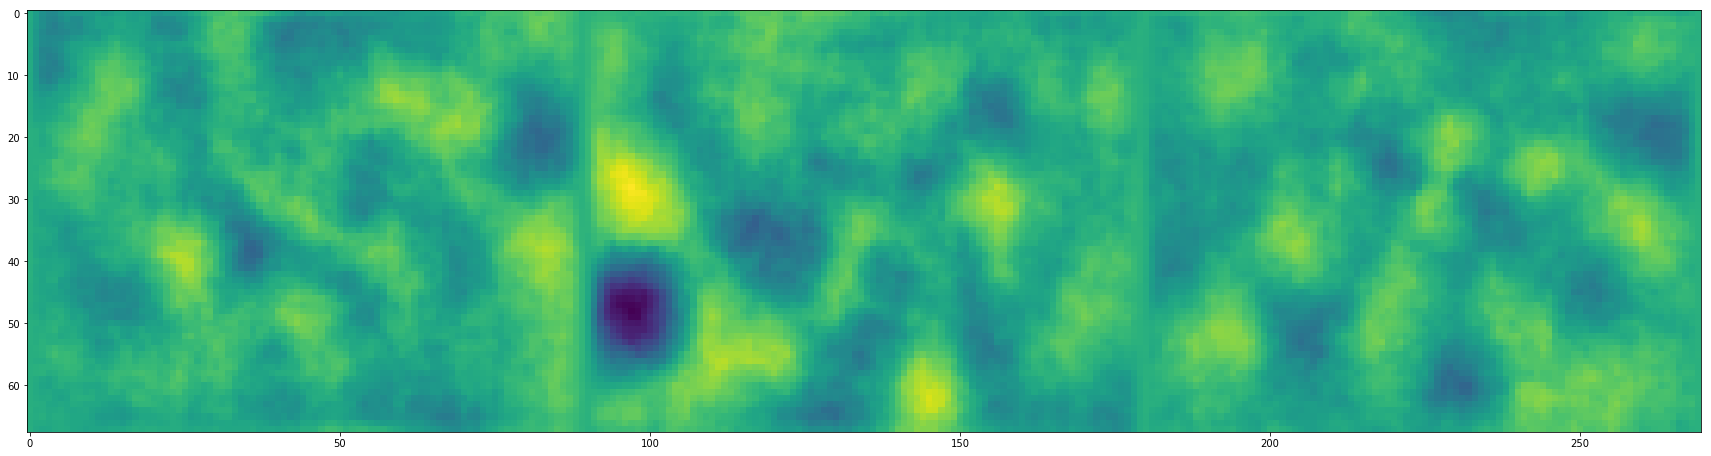

[[ 2.3834886e-07  6.2313586e-07  1.1544701e-06 ... -3.6205458e-06
  -2.3271768e-06 -6.2050265e-07]
 [ 2.2435292e-07  8.4721802e-07  1.5126303e-06 ... -4.3793962e-06
  -2.8819411e-06 -8.6009646e-07]
 [ 3.5356780e-07  7.6783033e-07  1.3115965e-06 ... -4.4230223e-06
  -2.8394807e-06 -9.2123889e-07]
 ...
 [ 1.3199940e-07  4.6104489e-07  1.4024608e-06 ...  3.2172456e-06
   1.4731579e-06  2.5074641e-07]
 [ 1.6916469e-07  4.4492285e-07  8.9438254e-07 ...  2.4500096e-06
   9.9814486e-07  8.4447237e-08]
 [ 2.5425174e-07  4.8971725e-07  8.0525689e-07 ...  1.8986201e-06
   6.5045748e-07  6.0975893e-08]]


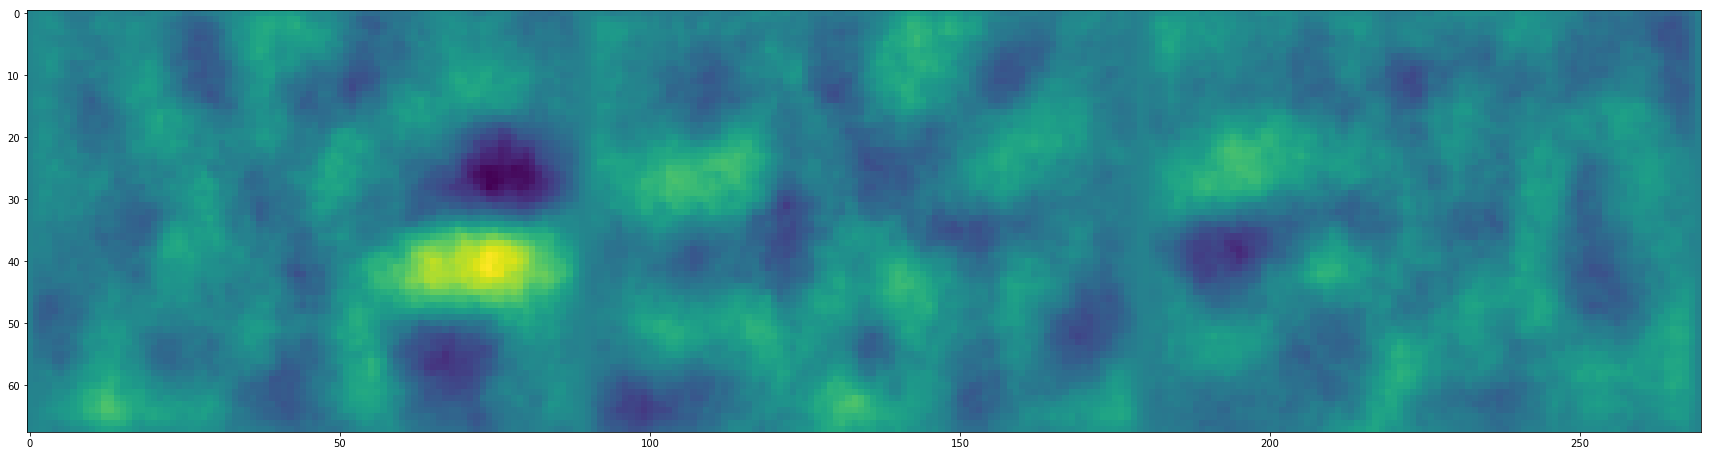

[[ 1.18382466e-07  5.52544009e-07  6.91810556e-07 ...  7.38094570e-07
   5.53527570e-07  1.09681196e-07]
 [ 1.42028966e-07  9.70015435e-07  1.06017717e-06 ...  1.07206438e-06
   6.30172849e-07  8.30511766e-08]
 [ 1.31361020e-07  1.12325517e-06  1.80811867e-06 ...  1.82305939e-06
   1.12235921e-06  7.24032247e-08]
 ...
 [-3.07690613e-07 -9.17561863e-07 -1.76765423e-06 ... -8.04196645e-07
  -2.58074692e-07 -2.76547411e-07]
 [-2.52033971e-07 -6.27781105e-07 -1.32362914e-06 ... -6.64384345e-07
  -2.59456897e-07 -2.79240652e-07]
 [-1.86896443e-07 -3.48727610e-07 -8.05662978e-07 ... -4.30394806e-07
  -2.12681798e-07 -1.66021934e-07]]


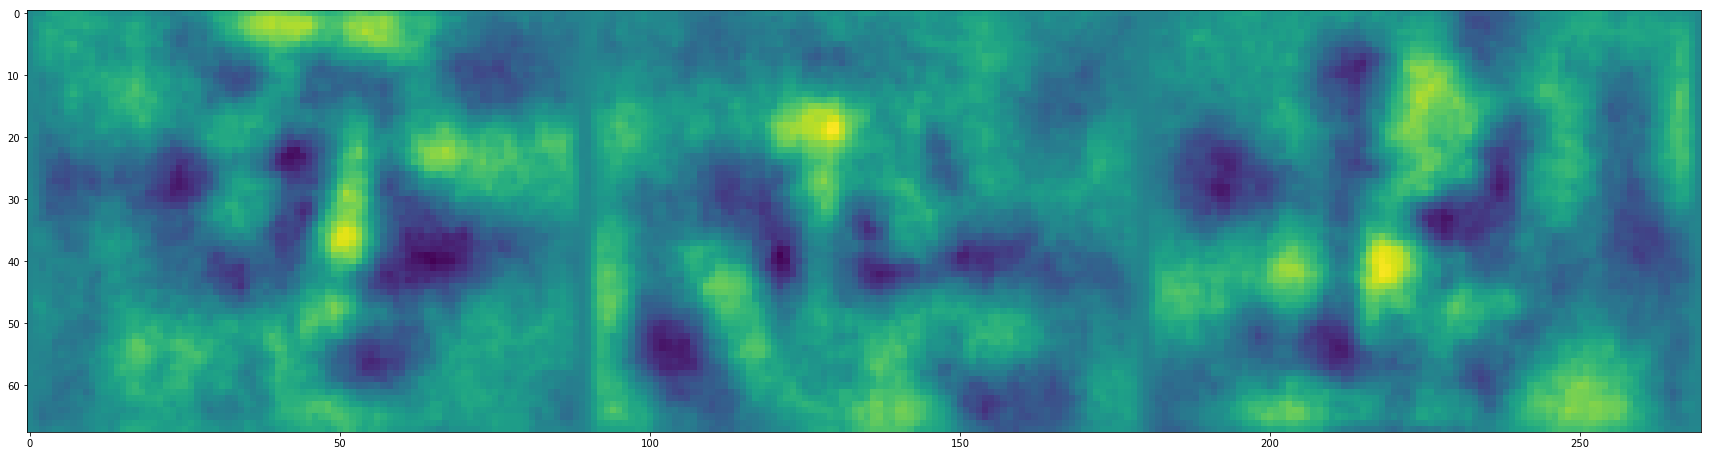

[[ 7.5163115e-08 -8.7461842e-07 -1.2813543e-06 ... -4.8467962e-07
  -2.5550878e-07  2.8999392e-07]
 [ 9.5856855e-08 -1.1204068e-06 -1.7334792e-06 ...  3.9937271e-07
   1.4831890e-07  3.5415124e-07]
 [ 2.1839492e-07 -6.8779190e-07 -1.5516529e-06 ...  3.6643169e-07
   5.0702016e-07  3.6006938e-07]
 ...
 [-1.8716959e-07 -2.3733180e-06 -3.4641821e-06 ... -6.0396434e-07
  -6.9703384e-07 -9.5727877e-08]
 [ 2.1531125e-08 -1.7703611e-06 -2.9186008e-06 ... -6.1793457e-08
  -4.2075465e-07  8.9798633e-08]
 [ 2.4400153e-08 -1.3002250e-06 -2.4588155e-06 ...  5.2534787e-08
  -5.0192131e-08  7.8897564e-08]]


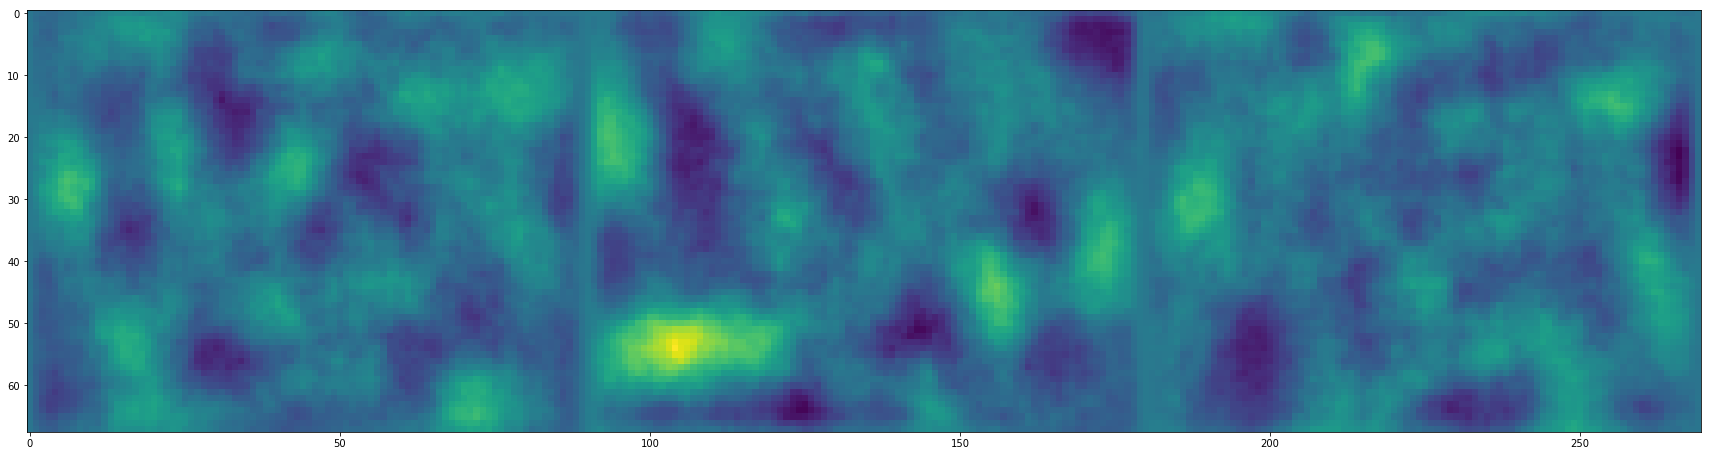

[[-3.36783017e-07 -8.22918253e-07 -1.08665972e-06 ...  4.48775211e-07
   2.77659154e-07  4.26081641e-08]
 [-1.68064972e-07 -1.96010831e-07 -3.35625998e-07 ...  8.69905250e-07
   6.40432575e-07  1.31652982e-07]
 [-2.49750400e-07 -3.23863162e-07  4.38410723e-07 ...  5.11529208e-07
   1.11833955e-07 -9.88286288e-08]
 ...
 [-7.56156282e-07 -2.84458679e-06 -4.47734510e-06 ... -1.46438845e-06
  -5.99853877e-07 -8.80416593e-08]
 [-5.85453620e-07 -2.27112105e-06 -3.77629090e-06 ... -1.15752368e-06
  -3.55818202e-07  4.08309937e-08]
 [-3.85696580e-07 -1.60639797e-06 -3.01977479e-06 ... -8.68948916e-07
  -2.44647282e-07  1.10532863e-08]]


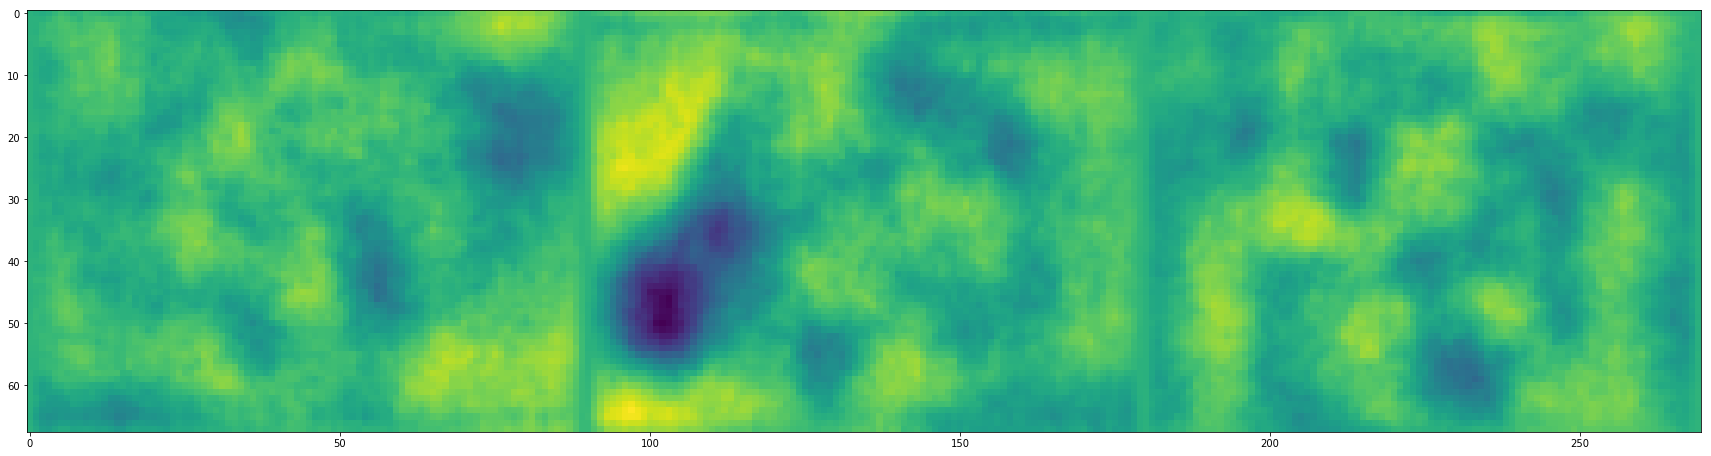

[[-2.30582700e-07 -4.71834539e-07 -5.43388467e-07 ...  3.76181646e-07
   3.16022607e-07 -8.35182234e-08]
 [-2.33376412e-07 -8.00683665e-07 -1.18181856e-06 ...  8.49534388e-07
   5.54179735e-07 -1.41707346e-07]
 [-2.36988171e-07 -8.70070608e-07 -1.21300991e-06 ...  1.59642775e-06
   7.76204899e-07 -1.04407370e-07]
 ...
 [ 6.46964153e-08  1.63803452e-06  2.91641209e-06 ... -6.96283905e-07
  -3.53308991e-07 -1.51899258e-07]
 [-1.15871785e-07  6.44153999e-07  1.29580758e-06 ... -9.65726940e-07
  -4.42975221e-07 -2.53926999e-07]
 [-2.41497816e-07 -9.12207341e-08  1.56663759e-07 ... -4.42706209e-07
  -4.78969525e-07 -3.05777263e-07]]


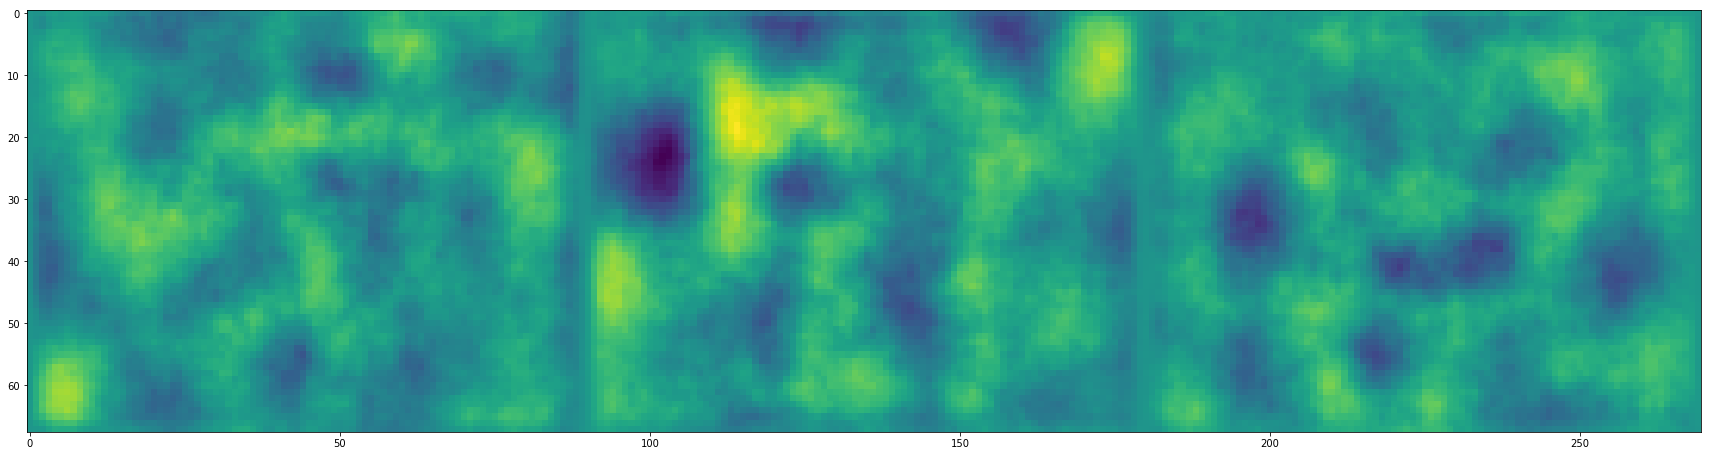

[[ 6.1837159e-07  1.1598679e-06  1.3390339e-06 ...  2.5862465e-07
   2.6131946e-07  4.5035694e-07]
 [ 5.1515462e-07  6.4487386e-07  8.4339820e-07 ...  4.4317983e-07
   3.0251647e-07  5.0044849e-07]
 [ 4.5055756e-07  1.7547977e-08  8.0822275e-08 ...  6.9295155e-08
   1.6980003e-07  3.6295310e-07]
 ...
 [ 3.3427509e-07 -7.7656196e-08 -9.1876058e-07 ... -4.5675761e-06
  -2.4849594e-06 -5.1479037e-07]
 [ 2.2939568e-07 -3.9196746e-07 -7.0739321e-07 ... -3.8328972e-06
  -2.0949856e-06 -4.2943793e-07]
 [ 1.6048801e-07 -1.3425498e-07 -6.4383011e-07 ... -2.8036020e-06
  -1.6408630e-06 -3.1128698e-07]]


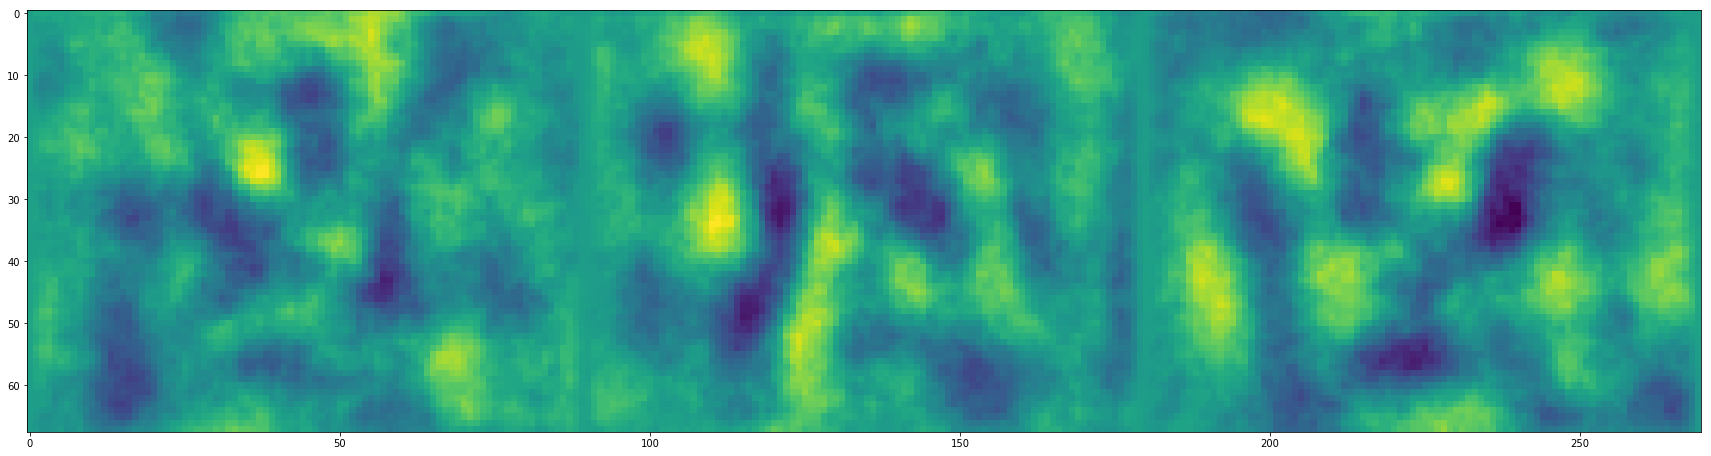

[[-4.7609888e-07  9.2915229e-08  8.6662430e-07 ...  2.7580345e-06
   1.5582351e-06 -6.0550342e-08]
 [-5.2199249e-07 -4.4925770e-07 -1.0277111e-07 ...  3.2344556e-06
   1.8040671e-06 -2.1908104e-08]
 [-6.0388447e-07 -6.7496245e-07 -5.0519611e-07 ...  2.8836525e-06
   1.6029740e-06  1.2363605e-08]
 ...
 [-7.8651070e-08  1.6554961e-06  2.8115919e-06 ...  3.0821764e-06
   1.2787071e-06 -1.5356873e-07]
 [-2.2707260e-07  9.6563804e-07  1.9049256e-06 ...  2.2115748e-06
   8.7357074e-07 -3.5303088e-07]
 [-2.5263836e-07  3.7088773e-07  9.5987957e-07 ...  9.4074340e-07
   3.8899398e-07 -4.1580577e-07]]


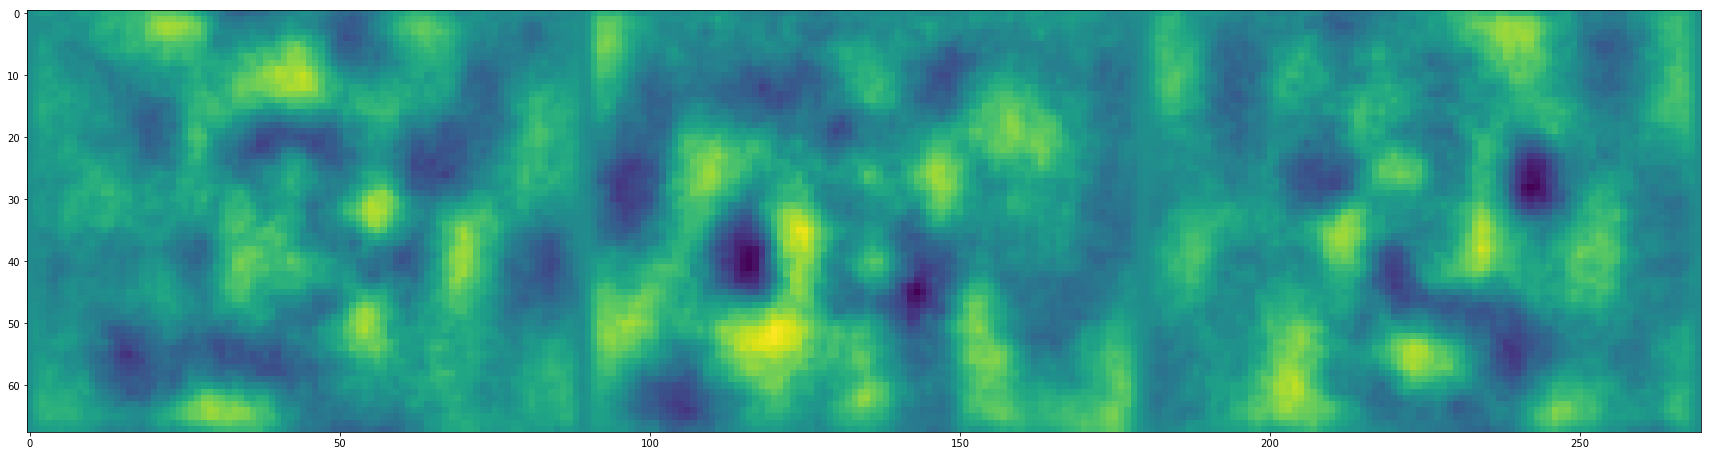

[[-9.9432022e-08  9.2700776e-07  1.7346646e-06 ... -2.1905369e-06
  -1.5949583e-06 -9.3269313e-07]
 [-2.7604230e-07  3.1739398e-07  1.0627907e-06 ... -4.0395707e-06
  -2.5867180e-06 -1.0030025e-06]
 [-3.2250105e-07  1.3143491e-08  6.3004842e-07 ... -3.4765783e-06
  -2.3879247e-06 -8.9263898e-07]
 ...
 [-1.0230528e-06 -2.1888093e-06 -3.6014083e-06 ... -1.2438406e-06
  -1.1596599e-06 -5.8517469e-07]
 [-9.4619935e-07 -1.9018736e-06 -3.1896641e-06 ... -5.5812313e-07
  -3.6150146e-07 -2.7147016e-07]
 [-9.7144425e-07 -1.2773414e-06 -2.2755862e-06 ...  2.4658777e-07
   2.6125450e-08 -2.1337013e-07]]


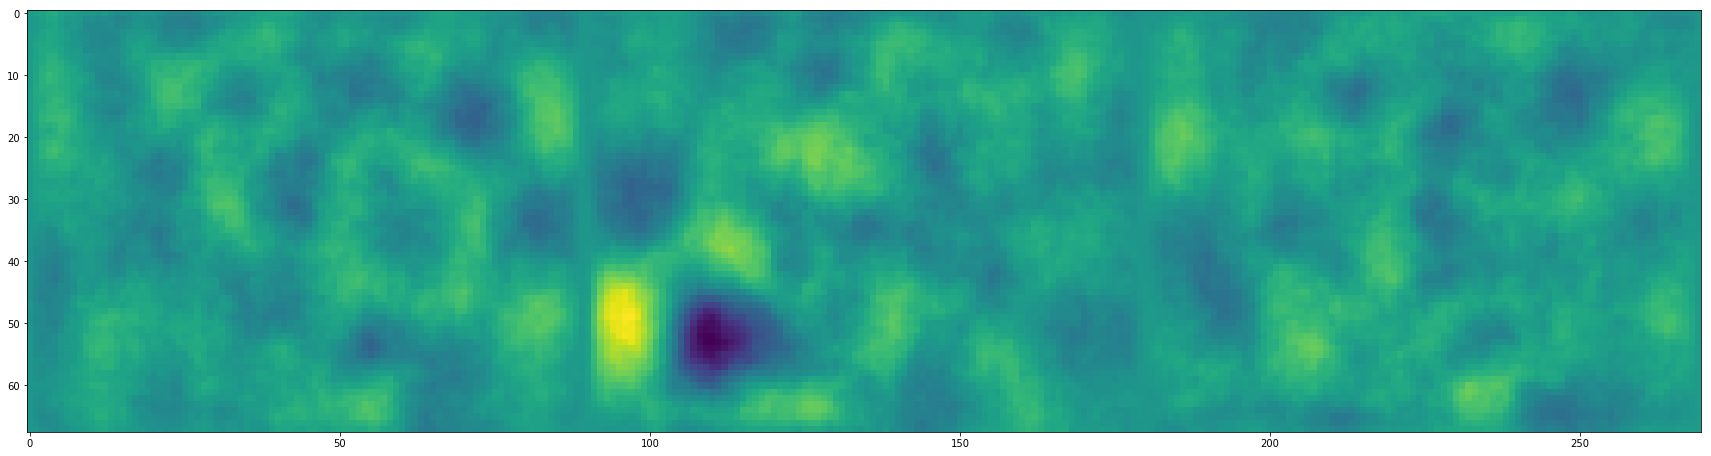

[[-8.4294453e-07 -2.5850577e-06 -4.4950393e-06 ... -5.4224273e-07
  -2.9665412e-07 -1.3730813e-07]
 [-9.9725924e-07 -3.4464506e-06 -5.4427919e-06 ... -8.1429249e-07
  -2.3687254e-07 -1.4045816e-07]
 [-1.1355830e-06 -3.5502205e-06 -6.3215780e-06 ... -9.3875815e-07
  -1.8670566e-07 -1.0261932e-07]
 ...
 [-5.9732446e-07 -1.0945685e-06 -1.3313298e-06 ... -2.5182653e-06
  -1.2275299e-06 -4.8154936e-07]
 [-5.6132637e-07 -1.1545276e-06 -1.7263172e-06 ... -2.3349257e-06
  -1.0349859e-06 -2.8616344e-07]
 [-6.7639536e-07 -1.7250798e-06 -1.9891177e-06 ... -2.1353717e-06
  -9.6458825e-07 -3.8425884e-07]]


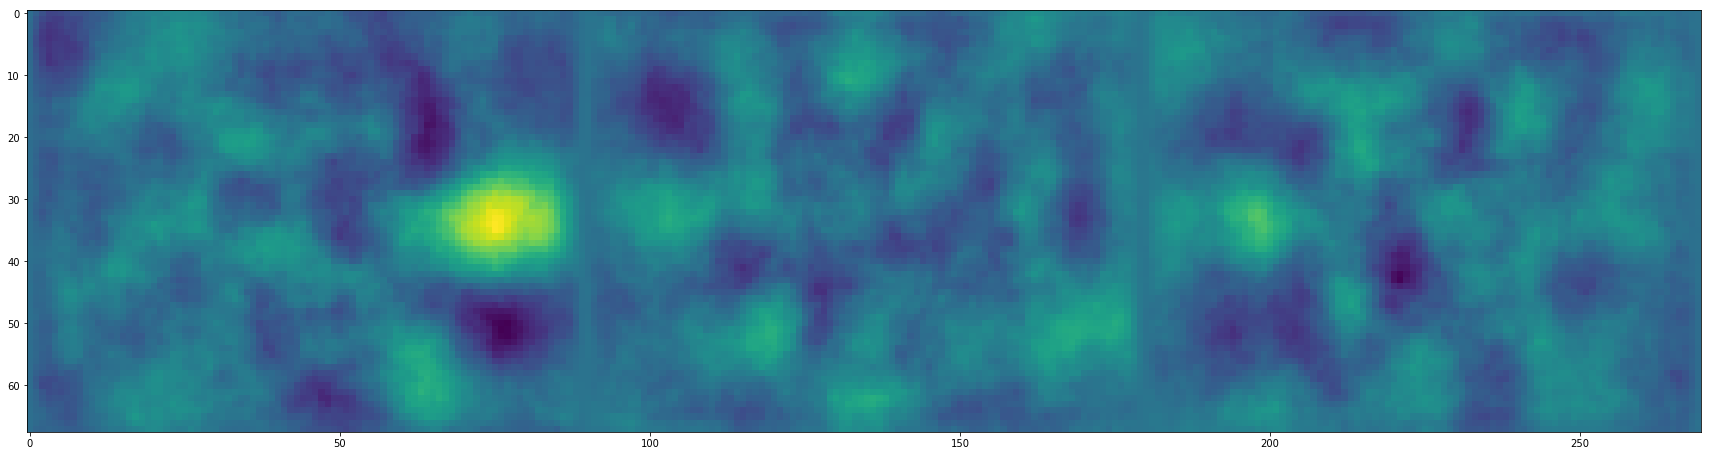

[[ 1.0969795e-06  1.9087538e-06  2.8866375e-06 ... -1.0282417e-06
  -4.0690475e-07  3.4877422e-07]
 [ 1.1450364e-06  2.2494028e-06  3.5099874e-06 ... -2.1829296e-06
  -1.2766035e-06  2.5896063e-07]
 [ 1.1587090e-06  2.2767670e-06  3.4299578e-06 ... -3.2881849e-06
  -2.0291347e-06  1.9311010e-07]
 ...
 [ 1.2772497e-06  2.8237530e-06  4.5445836e-06 ... -9.6140798e-07
  -4.7793156e-07  4.5085628e-07]
 [ 1.0840567e-06  2.4326598e-06  3.7968059e-06 ... -1.1991821e-06
  -5.1908268e-07  3.8257045e-07]
 [ 1.0225101e-06  2.0066548e-06  2.8888173e-06 ... -1.7566979e-06
  -6.3366849e-07  3.5519511e-07]]


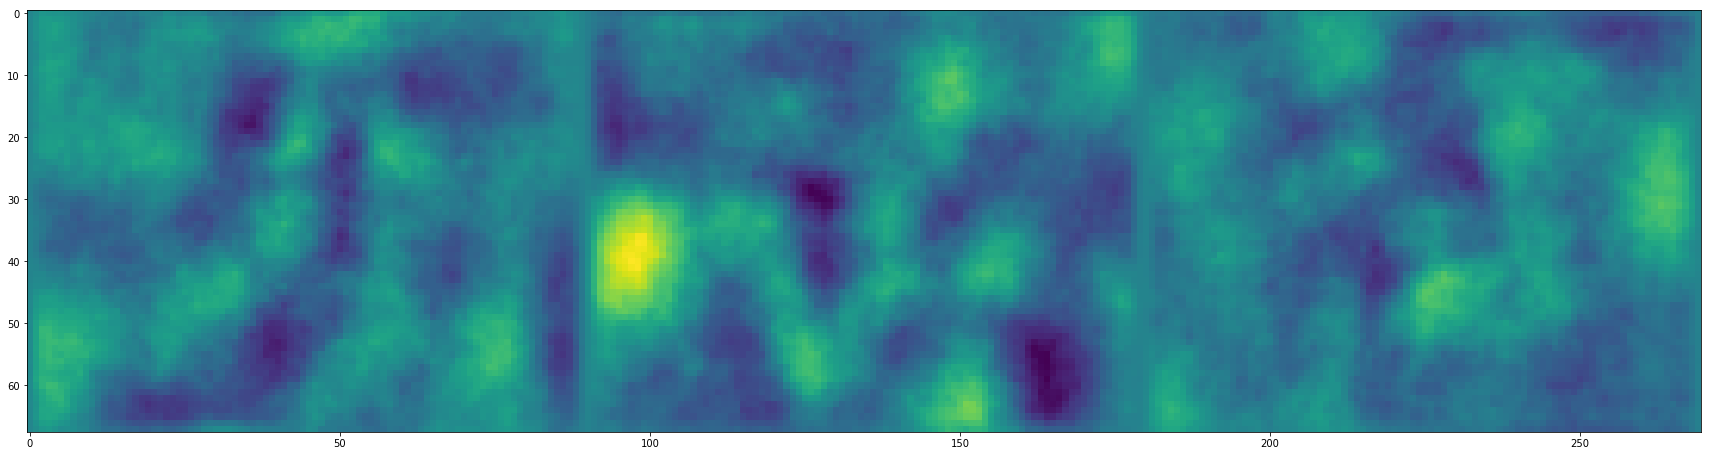

[[ 3.08110657e-07 -3.47057835e-07 -7.40536279e-07 ...  1.39275483e-06
   8.08434038e-07  7.55544818e-07]
 [ 2.88837157e-07 -4.73583725e-07 -3.05682306e-07 ...  2.13252861e-06
   1.15827595e-06  8.01829856e-07]
 [ 2.76142316e-07 -3.06341860e-07 -1.36090179e-07 ...  2.18958894e-06
   1.35313451e-06  8.13281588e-07]
 ...
 [ 1.87111254e-07 -9.42975248e-07 -1.14367776e-06 ...  1.43940539e-07
  -1.16577281e-08  3.03119975e-07]
 [ 1.93825201e-07 -8.21466926e-07 -9.84445251e-07 ...  2.70093778e-07
   1.10810824e-07  3.77349949e-07]
 [ 2.63179288e-07 -5.16556781e-07 -8.84251222e-07 ... -3.79098111e-07
   2.83656387e-08  4.10034716e-07]]


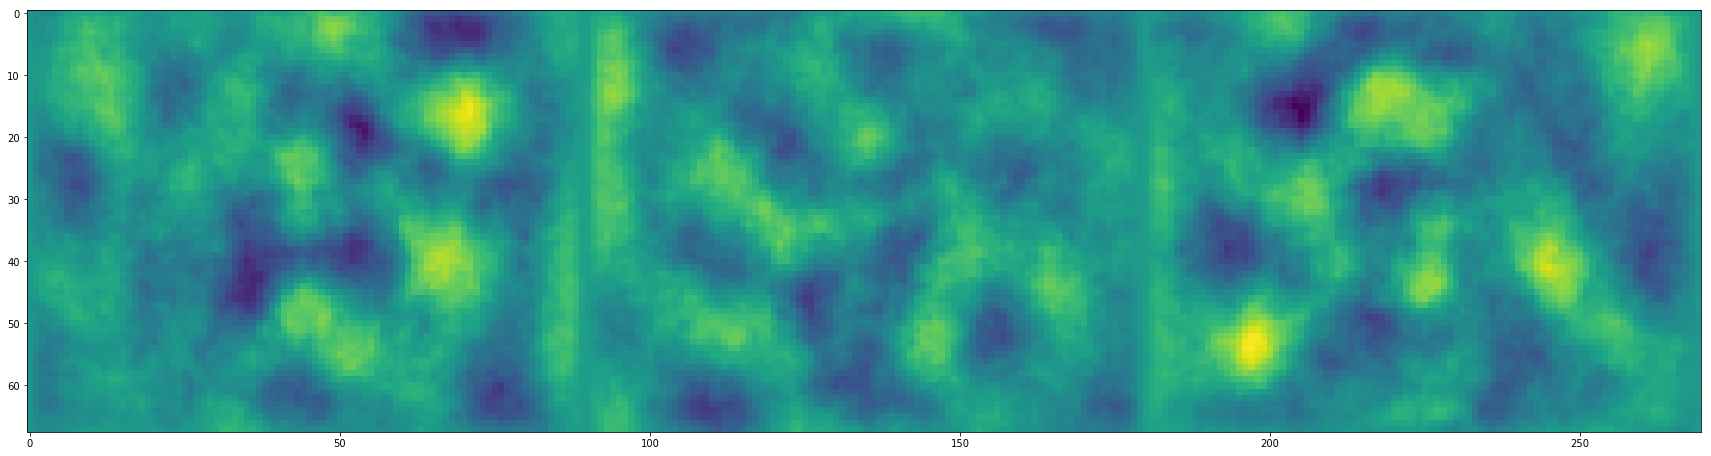

[[ 9.29697592e-07  2.50486983e-06  4.08560618e-06 ... -1.07485585e-06
  -3.77356258e-07 -1.23326373e-07]
 [ 8.57714156e-07  2.46812579e-06  3.79850394e-06 ... -5.15387512e-07
  -4.16678176e-07 -4.87555383e-08]
 [ 8.34701268e-07  2.05330957e-06  3.04040759e-06 ... -3.90081027e-07
  -1.81483742e-07 -1.18036665e-08]
 ...
 [-1.40935114e-07 -1.15778187e-06 -1.57724799e-06 ...  4.04107112e-07
   3.51537921e-07  2.02280681e-08]
 [-1.71226134e-07 -9.48045283e-07 -1.37839868e-06 ...  9.16919475e-07
   4.06559877e-07  8.20461423e-08]
 [-2.62764360e-07 -5.71910448e-07 -1.06616460e-06 ...  9.63145567e-07
   3.36411119e-07  7.81135583e-08]]


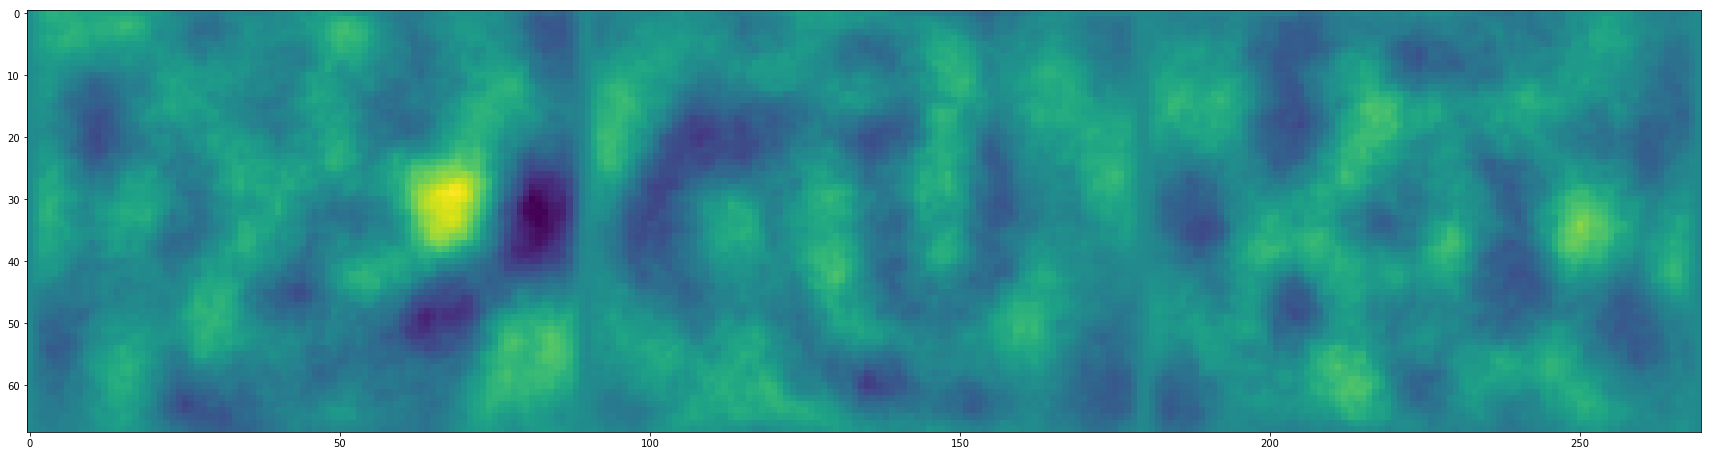

[[-1.0649017e-06 -1.7745388e-06 -2.2232150e-06 ... -2.3857328e-07
  -4.7135859e-07 -7.0948352e-07]
 [-9.8715498e-07 -1.3958346e-06 -1.6382573e-06 ... -3.5705420e-07
  -4.0835710e-07 -8.7743166e-07]
 [-8.6106058e-07 -1.0494402e-06 -1.0138162e-06 ... -3.2661998e-08
  -6.7532198e-07 -9.6669851e-07]
 ...
 [-4.5680730e-07  4.6016623e-07  1.3770967e-06 ... -5.0043644e-07
  -6.2495150e-07 -4.5151532e-07]
 [-4.1816881e-07  6.2794555e-07  1.3181782e-06 ... -4.4935035e-07
  -5.1795928e-07 -5.5246045e-07]
 [-2.1326723e-07  5.2514747e-07  1.2901037e-06 ... -1.9065416e-07
  -5.2752563e-07 -5.6386216e-07]]


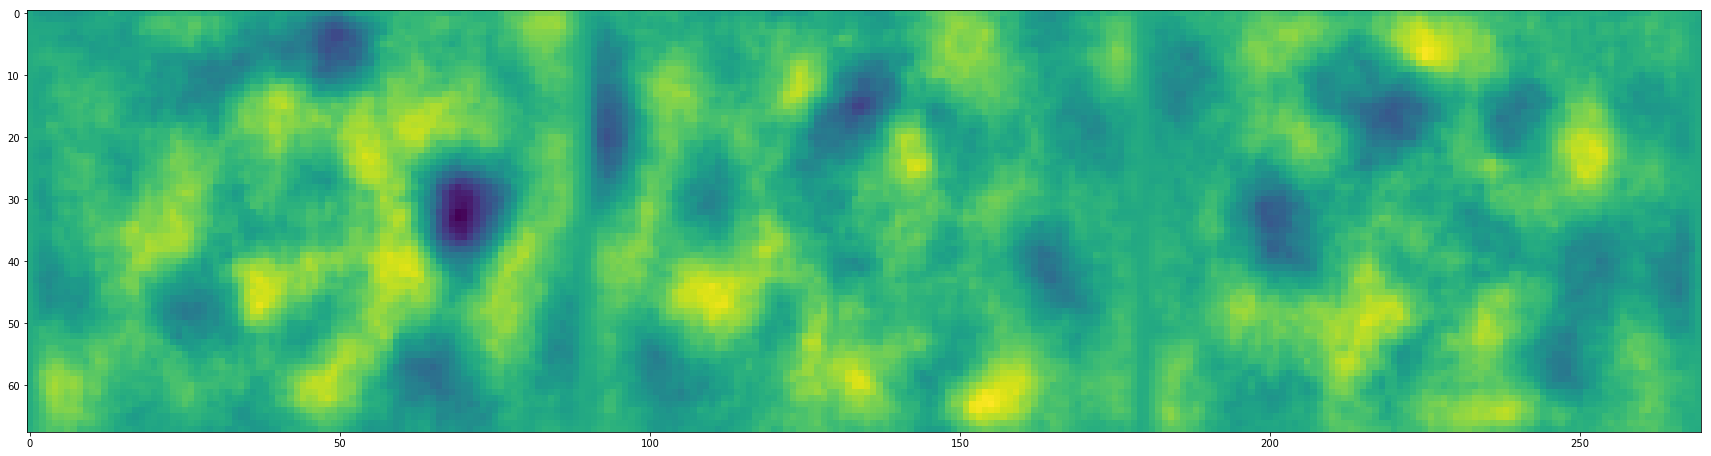

[[-7.1879941e-07 -1.2338722e-06 -1.6195411e-06 ...  6.2039436e-07
   1.2319315e-07 -3.0923579e-07]
 [-7.3470494e-07 -1.3387659e-06 -1.9419444e-06 ...  1.3953459e-06
   7.5416375e-07 -2.2422668e-07]
 [-7.0105204e-07 -1.1024016e-06 -1.8362803e-06 ...  1.6872523e-06
   1.0041811e-06 -1.3502319e-07]
 ...
 [-7.3386389e-07 -1.2020473e-06 -1.5625481e-06 ... -4.1512908e-07
  -7.6497633e-07 -6.7097443e-07]
 [-5.7175998e-07 -7.2337275e-07 -1.1952976e-06 ... -7.9073652e-07
  -9.8346402e-07 -6.6490287e-07]
 [-6.3391883e-07 -6.9122797e-07 -7.6933003e-07 ... -7.2240215e-07
  -6.8682328e-07 -6.0948577e-07]]


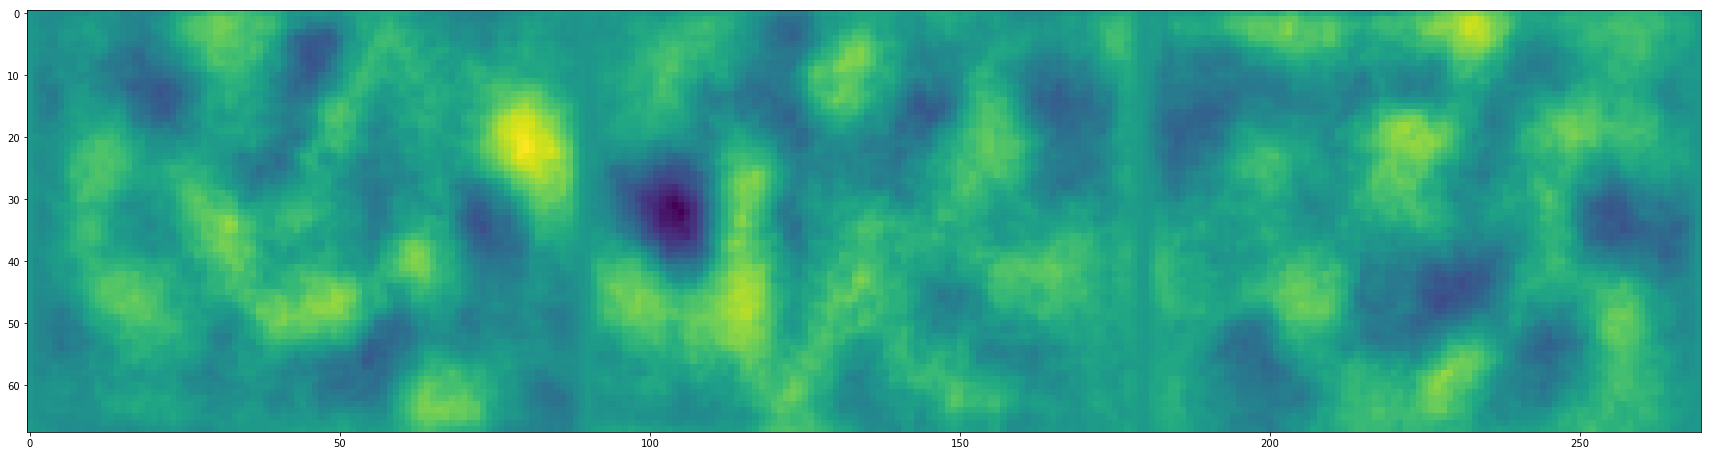

[[-7.19782065e-07 -1.69719294e-06 -2.87728949e-06 ...  6.86873648e-07
   1.32983317e-07 -1.57887712e-07]
 [-6.45344642e-07 -1.04704418e-06 -1.60421325e-06 ...  9.89078444e-07
   4.99468058e-07 -4.83716889e-09]
 [-6.34210664e-07 -8.94310688e-07 -8.60118405e-07 ...  1.03516902e-06
   6.46958938e-07  1.03449146e-07]
 ...
 [-5.76453033e-07 -1.10453584e-06 -1.86459351e-06 ... -2.73378464e-06
  -1.75615003e-06 -7.98023279e-07]
 [-6.44603119e-07 -1.19467472e-06 -1.47931246e-06 ... -2.85679471e-06
  -1.84134956e-06 -7.02943396e-07]
 [-6.91030664e-07 -8.45628961e-07 -1.03951766e-06 ... -2.75485309e-06
  -1.59598142e-06 -6.67246923e-07]]


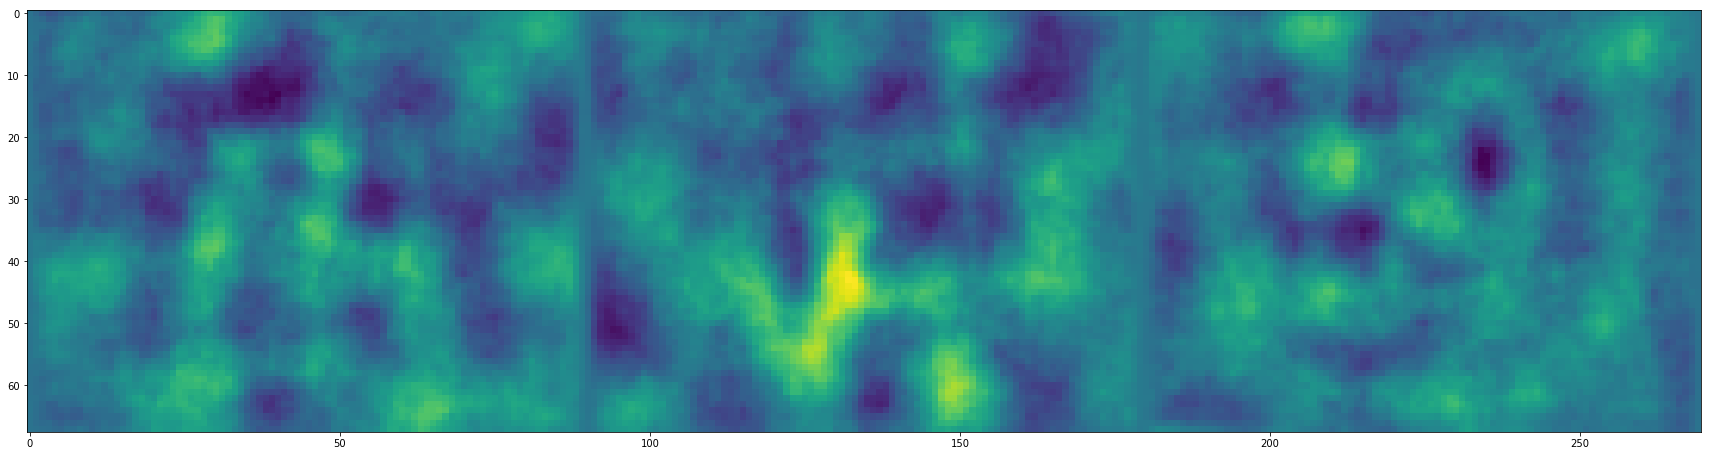

[[-1.1906222e-06 -1.4851979e-06 -2.1370552e-06 ... -2.4392230e-07
  -8.2552282e-07 -1.0707896e-06]
 [-1.5081567e-06 -2.5986294e-06 -2.9352211e-06 ... -3.3279595e-09
  -5.5077095e-07 -1.0128648e-06]
 [-1.6186918e-06 -3.3298559e-06 -3.9875504e-06 ...  3.0243910e-07
  -7.5773505e-07 -9.9114789e-07]
 ...
 [-7.2667189e-07  4.6508983e-08  8.7648061e-07 ... -3.7099426e-06
  -3.0224278e-06 -1.6402257e-06]
 [-7.7520559e-07 -5.4778474e-07  4.1480450e-07 ... -2.5835275e-06
  -2.1355786e-06 -1.4590297e-06]
 [-8.4601436e-07 -6.5429151e-07  2.2198846e-07 ... -2.3908221e-06
  -1.8470728e-06 -1.3242146e-06]]


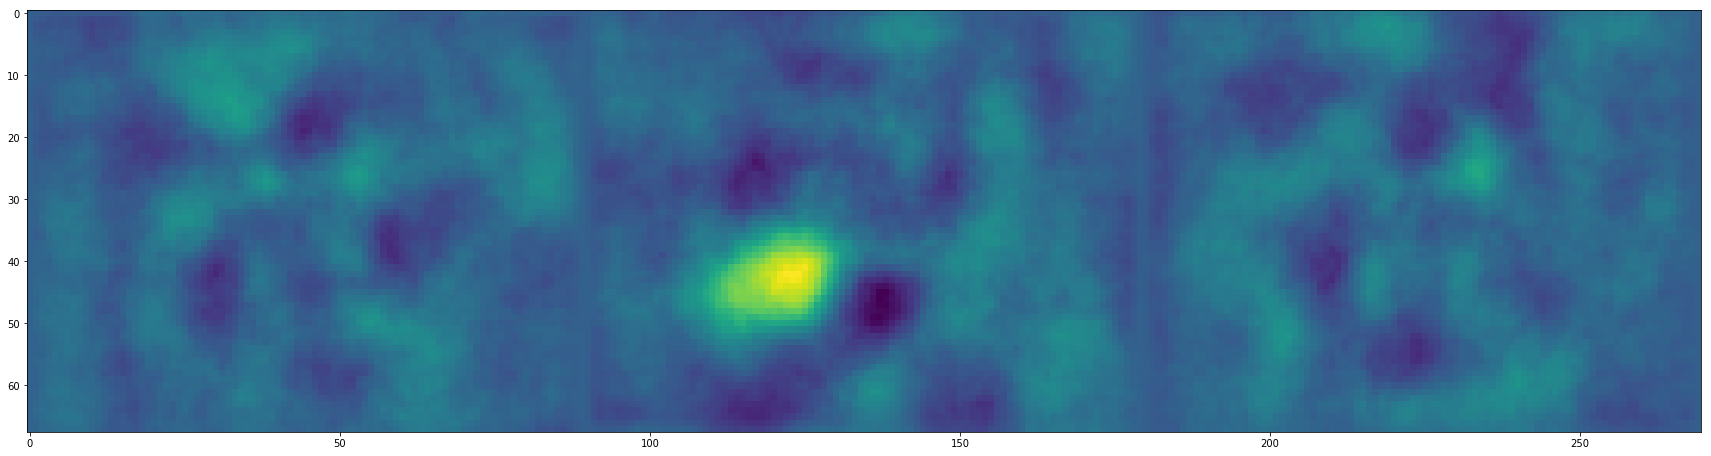

[[ 4.3668666e-07  1.2496821e-06  1.6273804e-06 ...  7.0861591e-07
   2.3810675e-07  5.4073492e-08]
 [ 5.1756302e-07  1.5407251e-06  1.8272463e-06 ... -7.5715491e-07
  -3.6065535e-07  4.4855973e-08]
 [ 6.1142384e-07  1.6922017e-06  2.1712738e-06 ... -1.1370165e-06
  -6.5690034e-07 -6.1191542e-08]
 ...
 [ 6.0502595e-07  1.5483743e-06  1.6764870e-06 ...  2.1953470e-06
   1.1399389e-06  2.6478835e-07]
 [ 6.0626229e-07  1.5310078e-06  1.7598937e-06 ...  1.5212910e-06
   7.7985402e-07  1.7128532e-07]
 [ 4.3506077e-07  1.3527747e-06  1.7558548e-06 ...  1.2061705e-06
   7.3806854e-07  1.4465319e-07]]


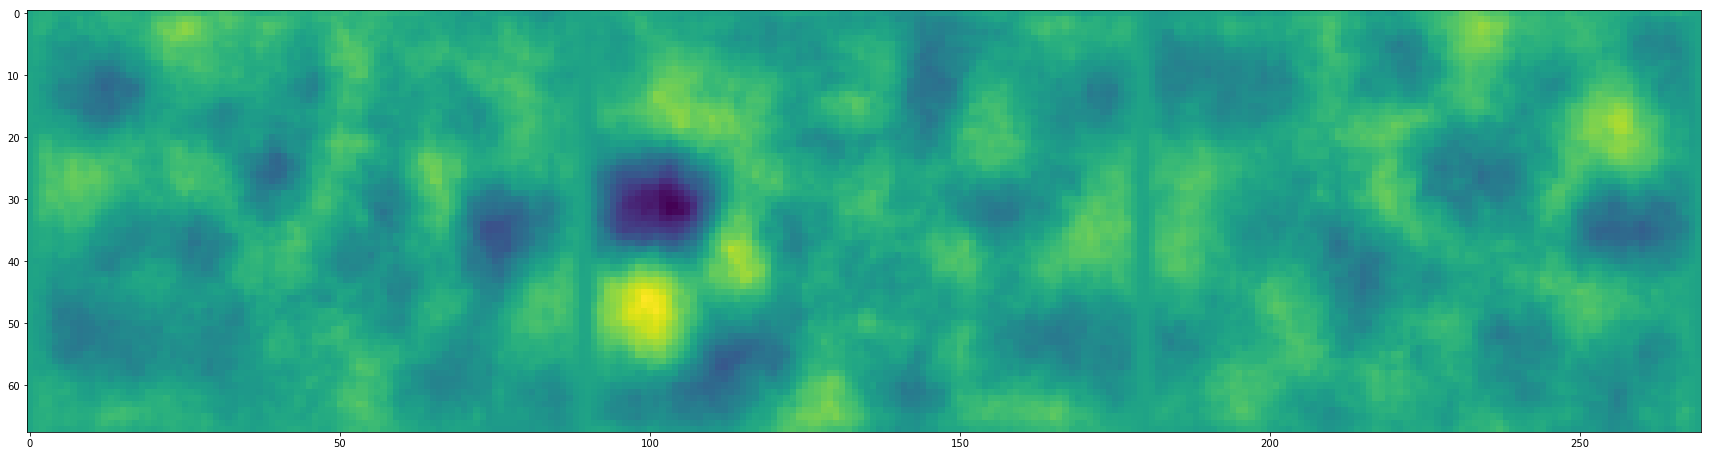

[[5.4662098e-07 1.0506736e-06 1.0355079e-06 ... 2.5583806e-06
  1.6902092e-06 7.1525346e-07]
 [7.1422835e-07 1.4704220e-06 1.5308043e-06 ... 2.9890211e-06
  1.9420379e-06 7.5286687e-07]
 [8.1501531e-07 1.7099204e-06 2.1319217e-06 ... 3.3516424e-06
  1.9827505e-06 7.9623970e-07]
 ...
 [7.9391509e-07 2.1808396e-06 3.1681534e-06 ... 2.7848489e-07
  6.5157548e-07 4.5754950e-07]
 [7.4723340e-07 1.8882639e-06 2.3799141e-06 ... 2.7403794e-07
  6.0476196e-07 3.7332671e-07]
 [7.1182660e-07 1.4666400e-06 1.8831354e-06 ... 6.2420855e-07
  5.9357450e-07 3.7275819e-07]]


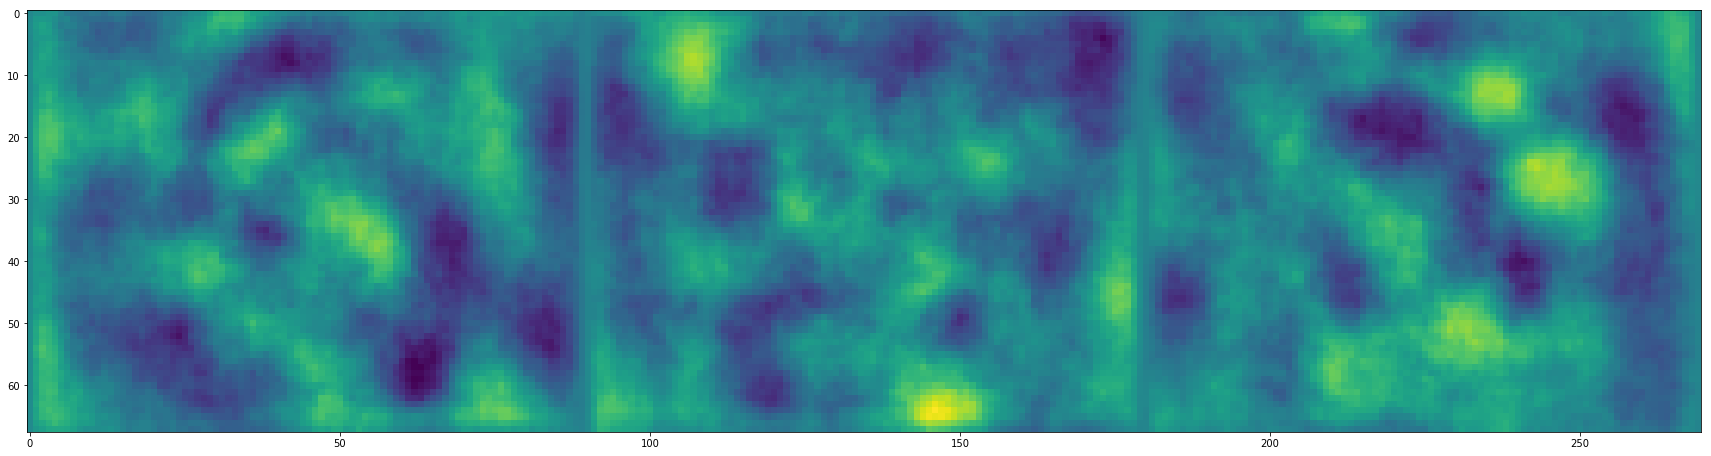

[[ 7.3362645e-07  1.5672315e-06  2.6480616e-06 ... -2.4075462e-06
  -1.1268896e-06 -7.6200941e-08]
 [ 9.4858075e-07  2.3916523e-06  3.5017752e-06 ... -2.9051494e-06
  -1.6945880e-06 -3.1405861e-07]
 [ 1.0501494e-06  2.8724953e-06  4.2998754e-06 ... -3.4290331e-06
  -1.6863498e-06 -3.1759848e-07]
 ...
 [-7.4442632e-08 -9.7561076e-07 -1.4085948e-06 ... -9.6867564e-07
  -8.0113892e-07 -1.3796362e-07]
 [ 1.0372312e-07 -4.8809216e-07 -7.7414256e-07 ... -6.3187133e-07
  -7.8130358e-07 -4.1910628e-08]
 [ 7.9989171e-08 -1.0079181e-07 -3.0637838e-07 ... -3.3302931e-07
  -4.4381429e-07 -7.9830272e-08]]


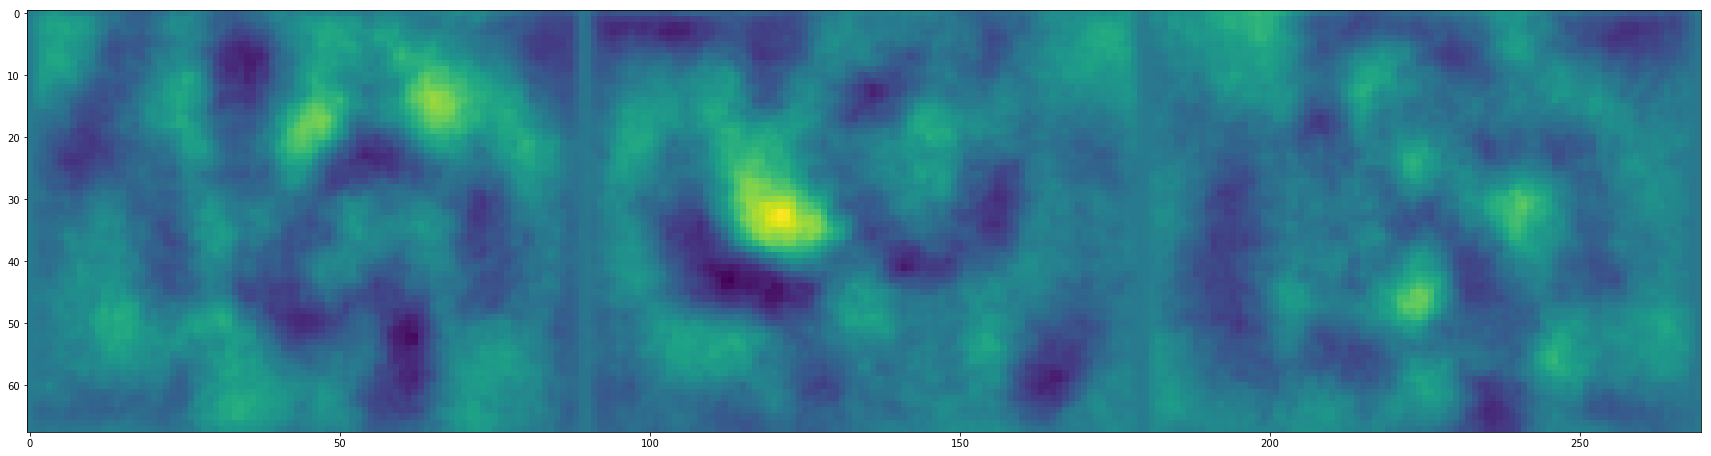

[[ 3.6061883e-07  8.3955757e-07  1.3359278e-06 ...  1.2922910e-06
   8.1387901e-07  1.9277726e-07]
 [ 5.1194985e-07  9.4014678e-07  1.0132940e-06 ...  2.5734537e-06
   1.6626207e-06  3.6872223e-07]
 [ 6.3716885e-07  1.1288718e-06  7.9194967e-07 ...  2.6146663e-06
   1.9028964e-06  5.4163019e-07]
 ...
 [ 1.1162397e-06  3.3433296e-06  5.2933865e-06 ...  1.3446456e-06
   8.5634628e-07  3.8011615e-07]
 [ 1.0480423e-06  3.0472784e-06  4.3505997e-06 ...  2.7795676e-07
   1.4660885e-07  5.6752484e-08]
 [ 8.9845594e-07  2.4493584e-06  3.5749383e-06 ...  2.9558231e-07
  -6.1057584e-08 -1.1581735e-07]]


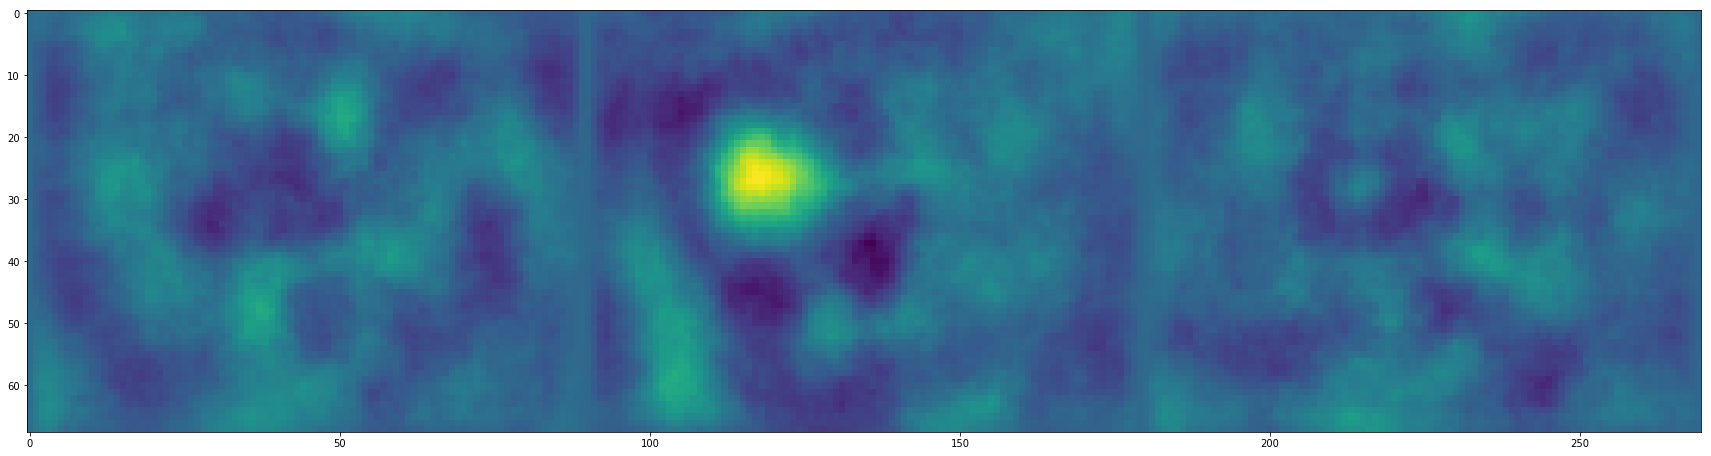

[[-2.8431180e-07 -1.4927000e-06 -2.0244654e-06 ... -4.9150935e-07
   1.4342120e-07  3.1482671e-07]
 [-4.9937580e-07 -2.4399037e-06 -3.3847143e-06 ...  1.3045393e-06
   1.1373654e-06  4.1668304e-07]
 [-6.0316472e-07 -2.7163940e-06 -4.2997799e-06 ...  1.4832773e-06
   1.8076543e-06  6.0974844e-07]
 ...
 [-2.2445281e-08 -3.1985002e-07 -2.0536963e-07 ... -2.7741719e-06
  -1.5571894e-06 -3.8817555e-07]
 [-6.1105126e-08 -9.8230839e-07 -1.1160621e-06 ... -1.5833464e-06
  -1.0768645e-06 -1.9407736e-07]
 [-1.4266938e-07 -1.0126029e-06 -1.4175192e-06 ... -9.9195961e-07
  -6.7454732e-07 -1.4666682e-07]]


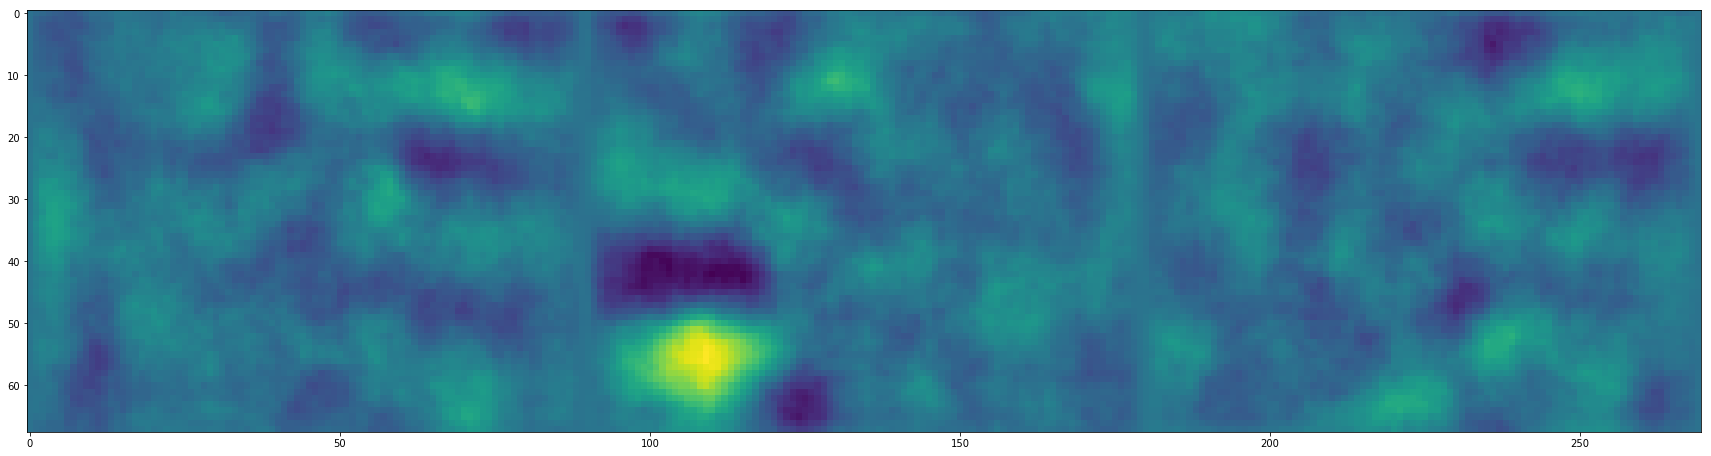

[[-5.6331345e-07 -1.0876095e-06 -1.7607566e-06 ...  8.7084231e-07
   4.8272045e-07 -1.6157529e-07]
 [-7.9810434e-07 -2.2487736e-06 -3.0791125e-06 ...  2.7807826e-07
   1.1300365e-08 -3.0238408e-07]
 [-8.6531628e-07 -2.7035180e-06 -3.5351093e-06 ... -8.1887514e-08
  -3.7984438e-07 -3.6259186e-07]
 ...
 [-8.8140627e-07 -1.5326577e-06 -1.9526260e-06 ...  2.8391203e-06
   1.3673956e-06  8.8565734e-08]
 [-7.2137317e-07 -1.2472052e-06 -1.5840759e-06 ...  2.6314488e-06
   1.4153480e-06 -5.9286652e-08]
 [-6.7213068e-07 -1.1610148e-06 -1.2620653e-06 ...  1.6792885e-06
   7.4388561e-07 -1.2539465e-07]]


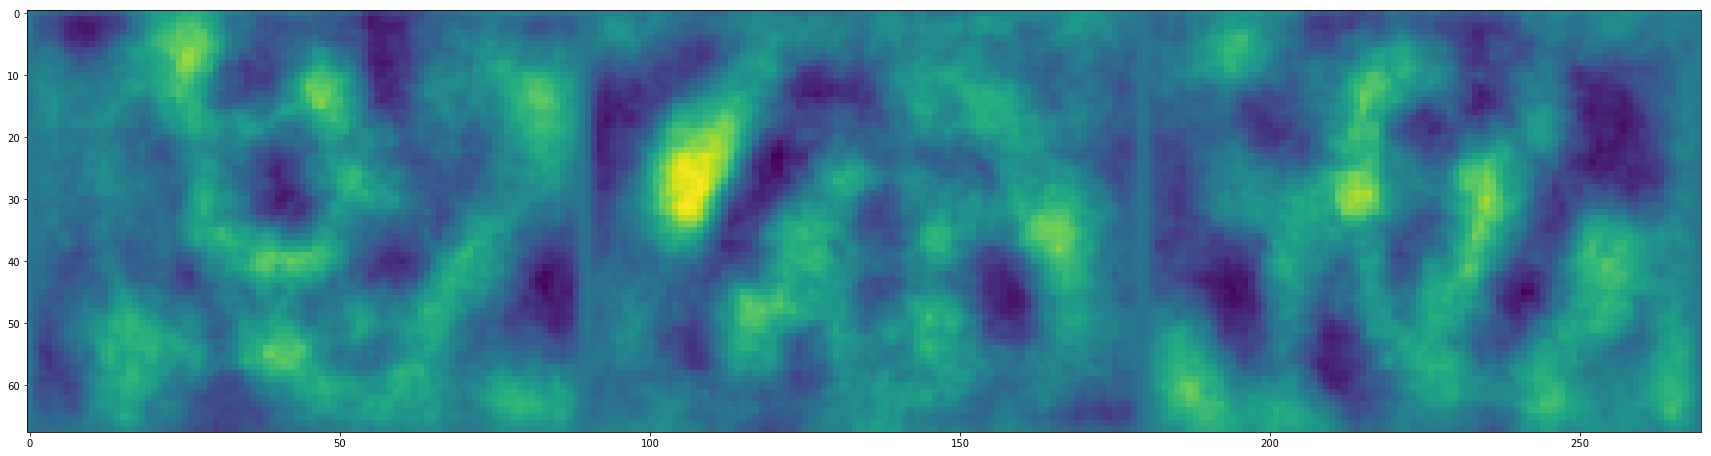

[[-6.8583688e-08 -2.3293078e-06 -4.3144096e-06 ...  1.4274756e-06
   1.0861113e-06  1.3767017e-06]
 [-2.7885287e-07 -3.3730896e-06 -5.8555506e-06 ...  1.7803872e-06
   1.0946812e-06  1.2409937e-06]
 [-2.1362665e-07 -3.5189960e-06 -6.4605574e-06 ...  2.1654719e-06
   1.2930533e-06  1.1486223e-06]
 ...
 [ 1.5707511e-06  4.1199455e-06  7.0276897e-06 ...  2.3986440e-06
   1.8059716e-06  1.3553456e-06]
 [ 1.5305011e-06  3.0909609e-06  5.1184948e-06 ...  3.0532290e-06
   2.2132044e-06  1.4919408e-06]
 [ 1.5852905e-06  2.1860189e-06  3.6385154e-06 ...  3.5265357e-06
   2.5507888e-06  1.7363705e-06]]


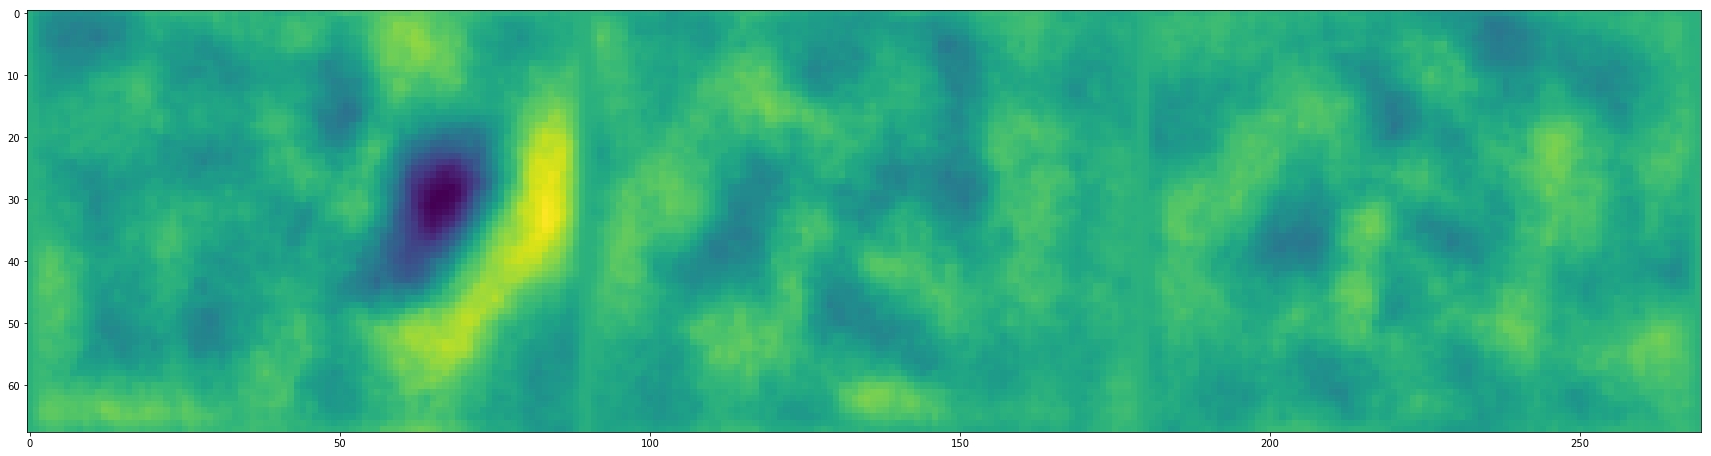

[[ 7.8528524e-07  1.9325548e-06  3.0839681e-06 ...  8.7891186e-07
   8.7737624e-07  5.3042055e-07]
 [ 7.3094202e-07  1.7742715e-06  3.2562318e-06 ... -2.1301453e-07
  -2.5069127e-07  3.7437408e-07]
 [ 7.1694649e-07  1.5032041e-06  2.5429315e-06 ... -8.5009935e-07
  -4.2471035e-07  2.2969483e-07]
 ...
 [-1.2226363e-07 -1.4884605e-06 -2.5066661e-06 ...  2.3106850e-06
   1.3427667e-06  5.3362146e-07]
 [-5.9618763e-09 -8.3940870e-07 -1.6274867e-06 ...  2.4554633e-06
   1.5348644e-06  5.9527554e-07]
 [-8.5476401e-08 -3.1640607e-07 -9.4296342e-07 ...  2.3064379e-06
   1.3485796e-06  6.1459042e-07]]


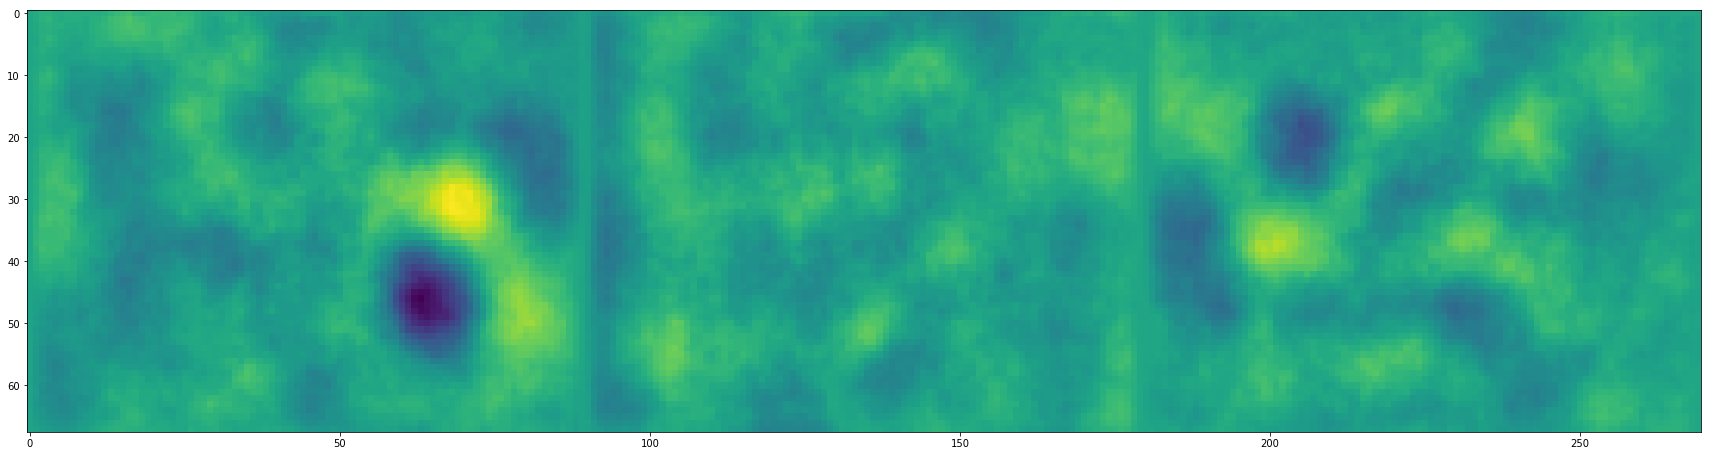

[[-5.9155707e-07 -4.0975380e-07 -4.1886346e-07 ...  1.0041909e-06
   2.8417745e-07 -4.3103569e-07]
 [-5.8387491e-07 -1.3581224e-07  8.4250033e-08 ...  1.0438777e-06
   3.3774828e-07 -3.2729770e-07]
 [-6.2476749e-07 -1.2371379e-07  5.5827553e-07 ...  5.1006435e-07
   3.1164356e-07 -2.9508732e-07]
 ...
 [-5.8457420e-07 -8.0542583e-07 -1.1165356e-06 ... -1.3504074e-06
  -4.9024993e-07 -4.1687451e-07]
 [-6.3183347e-07 -4.8847960e-07 -5.0465627e-07 ... -1.2359968e-06
  -4.9530712e-07 -2.7692167e-07]
 [-6.1530585e-07 -4.7644036e-07 -3.0128567e-07 ... -1.0619881e-06
  -5.8855244e-07 -3.5816552e-07]]


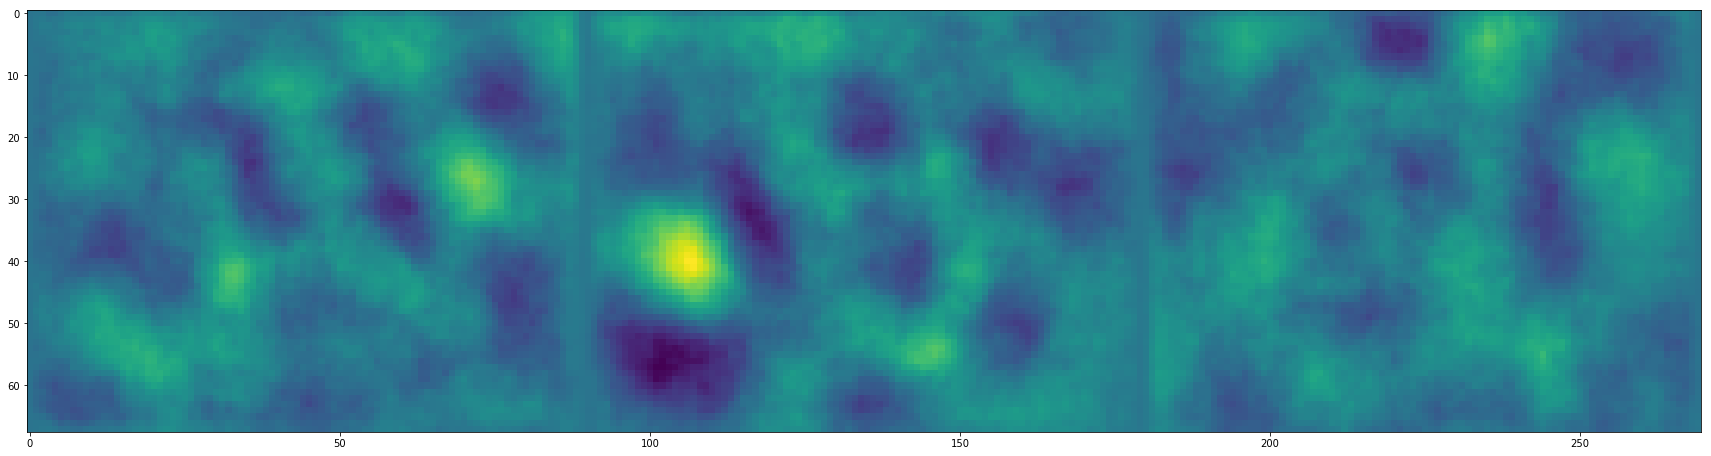

[[ 2.8449222e-07 -9.7519592e-07 -2.0200391e-06 ... -2.5487675e-06
  -1.2804575e-06  1.4791274e-07]
 [ 2.4106208e-07 -7.4075029e-07 -1.8092824e-06 ... -2.2562031e-06
  -1.3400248e-06  9.1649461e-08]
 [ 1.4813378e-07 -1.0943654e-06 -2.7929473e-06 ... -2.5790025e-06
  -1.3808177e-06 -1.4585337e-08]
 ...
 [ 7.5627378e-07  1.3718098e-07  1.4211111e-07 ... -5.6067511e-06
  -3.4632817e-06 -3.0468885e-07]
 [ 8.9376732e-07  6.6680303e-07  6.6104553e-07 ... -4.3390851e-06
  -2.4116266e-06  1.2875489e-08]
 [ 8.3901489e-07  8.1235351e-07  8.6648430e-07 ... -2.6464206e-06
  -1.2585874e-06  1.1263483e-07]]


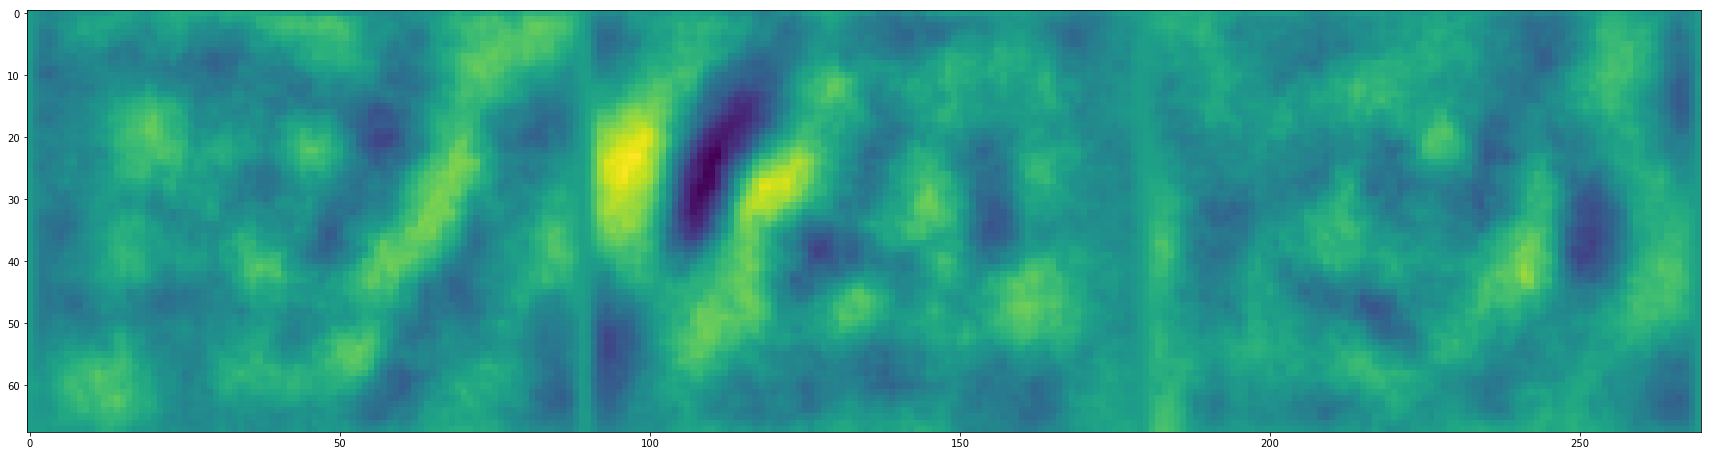

[[ 3.4313302e-07  5.0080837e-07  6.1824764e-08 ...  3.0578030e-07
   5.2838871e-08  4.6093994e-08]
 [ 4.2167343e-07  5.0914736e-07  6.5455176e-08 ...  1.7296249e-07
   4.5494974e-07  9.1345271e-08]
 [ 4.9889070e-07  6.3022765e-07  4.1345984e-07 ...  6.6121061e-07
   7.7469042e-07  2.2115475e-07]
 ...
 [ 2.4556965e-07  5.3086734e-07 -5.7003895e-09 ...  4.6562624e-07
   4.2577858e-07  1.3776490e-07]
 [ 2.4511354e-07  3.9893962e-07  1.4961415e-07 ...  1.4905922e-08
   1.5593639e-07 -2.9115309e-08]
 [ 2.6320862e-07  2.3762448e-07  2.5035263e-07 ... -2.1568860e-07
  -1.8626427e-07 -7.8795708e-08]]


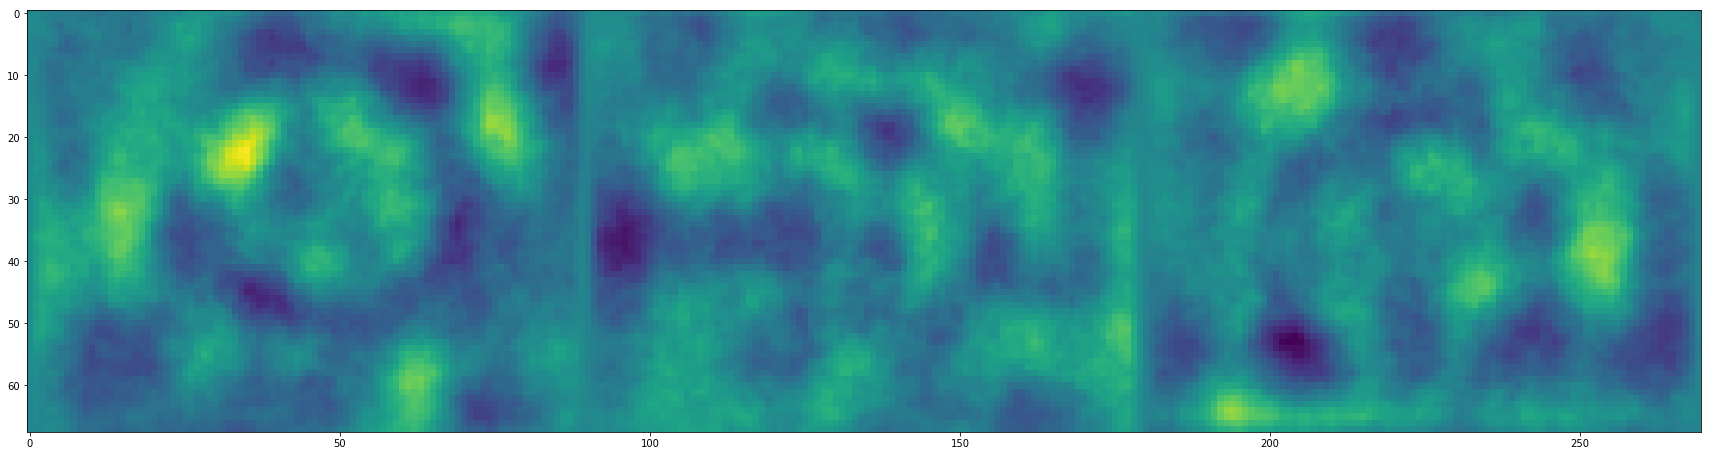

[[-4.2413780e-07 -1.1996474e-06 -1.4938347e-06 ... -8.0497989e-07
  -3.8629867e-07 -4.7077666e-08]
 [-3.5193784e-07 -1.0150266e-06 -1.5112860e-06 ...  1.6245657e-07
   3.1080354e-08 -6.0747588e-08]
 [-3.1782361e-07 -8.9396605e-07 -1.8064303e-06 ...  6.4566012e-07
   2.0501572e-07 -5.2976365e-08]
 ...
 [ 1.9871281e-07  1.1935484e-06  2.5514109e-06 ...  1.4415375e-06
   8.3644056e-07  3.3030275e-07]
 [ 1.5404846e-07  8.3100031e-07  1.5980012e-06 ...  1.0297030e-06
   6.0309839e-07  3.0963429e-07]
 [ 7.1180523e-08  4.5215918e-07  9.7016050e-07 ...  7.2364190e-07
   4.4441174e-07  2.6744235e-07]]


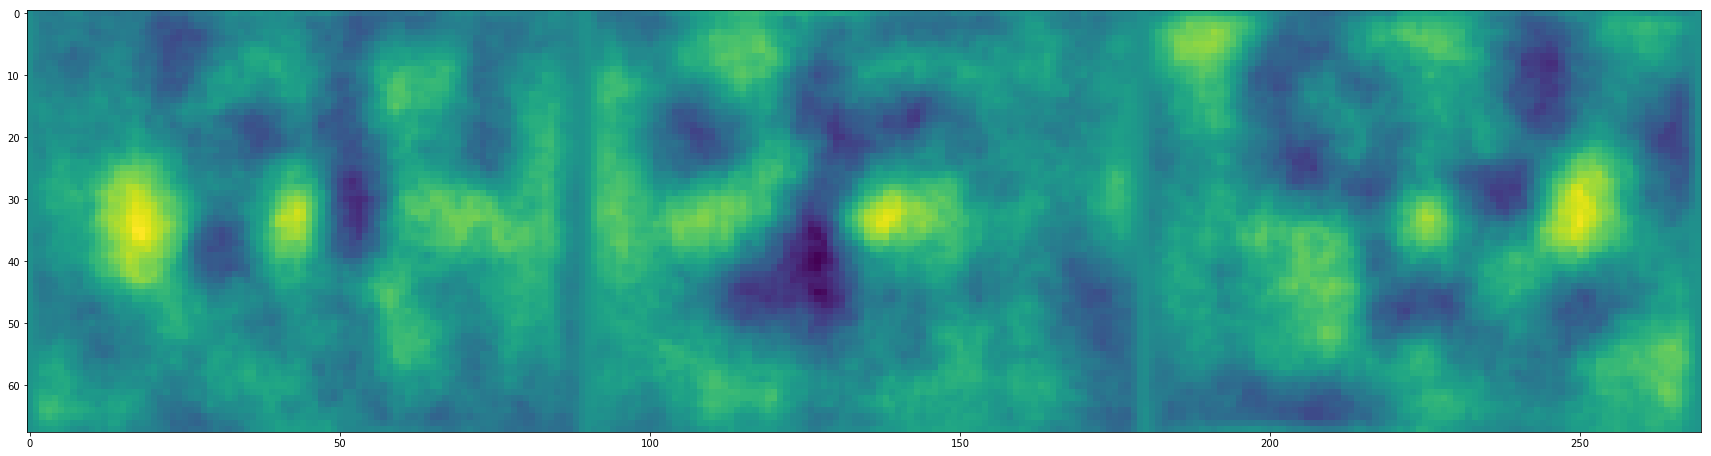

[[-2.7296412e-07 -5.8532504e-07 -1.0875632e-06 ...  4.6877818e-07
   1.7820008e-07  1.0543719e-07]
 [-2.2720012e-07 -8.0113369e-07 -1.0105831e-06 ...  1.0034721e-06
   3.0277468e-07  9.4811128e-08]
 [-1.6870982e-07 -3.6620926e-07 -5.9932410e-07 ...  1.0718011e-06
   5.5590220e-07  8.5513348e-09]
 ...
 [-4.7693482e-07 -1.4247154e-06 -2.0824446e-06 ...  8.7741643e-07
   5.0358955e-07  2.0542790e-07]
 [-3.1880310e-07 -8.7169502e-07 -1.5830425e-06 ...  8.4392877e-07
   5.6497129e-07  2.2838512e-07]
 [-2.7917855e-07 -7.9193785e-07 -1.3341822e-06 ...  7.2860513e-07
   5.1386093e-07  2.7611782e-07]]


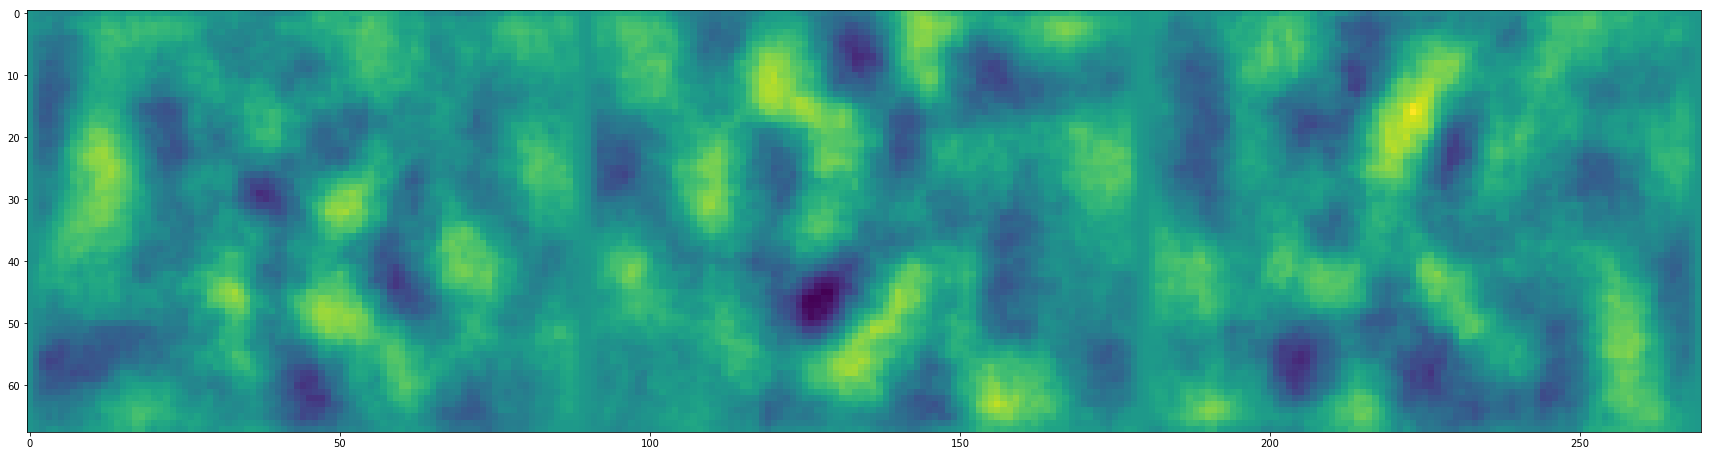

[[-3.1812036e-07 -1.3888042e-06 -2.2894453e-06 ...  1.6566264e-06
   9.8933162e-07  1.7056780e-07]
 [-3.6990309e-07 -1.7780742e-06 -3.1483446e-06 ...  2.0646189e-06
   1.2726352e-06  2.3746027e-07]
 [-3.8322389e-07 -1.7071362e-06 -3.3094532e-06 ...  1.9239865e-06
   1.4046420e-06  2.5828632e-07]
 ...
 [-5.7505855e-07 -1.6677914e-06 -2.9513481e-06 ...  2.4168658e-06
   1.4316329e-06  3.8783898e-07]
 [-4.6583264e-07 -1.6861428e-06 -2.4900949e-06 ...  1.8693776e-06
   9.7333873e-07  2.6710748e-07]
 [-4.1362193e-07 -1.5189742e-06 -2.1526075e-06 ...  1.1122555e-06
   9.2482935e-07  2.4034222e-07]]


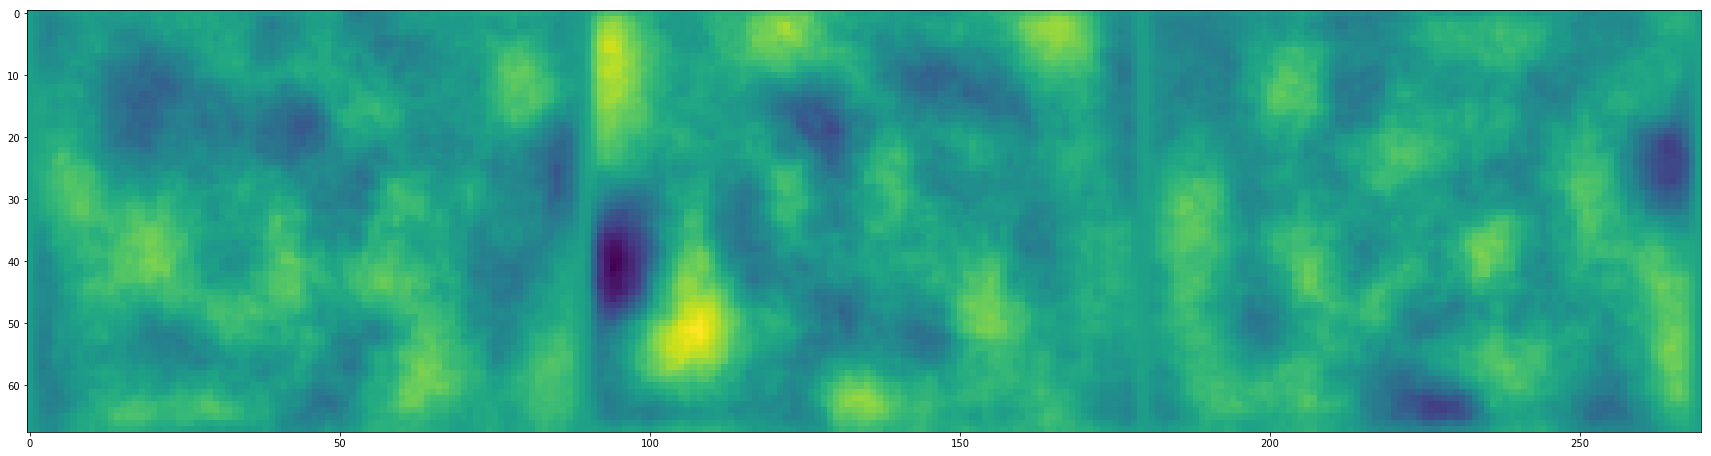

[[-9.4372695e-07 -7.8671155e-07 -5.6299177e-07 ... -5.4256685e-07
  -6.2176167e-07 -8.6982544e-07]
 [-9.8945395e-07 -1.0435597e-06 -8.5975421e-07 ... -3.7335420e-07
  -6.0378494e-07 -8.9990812e-07]
 [-9.4491656e-07 -1.0313605e-06 -1.1728291e-06 ...  5.7118098e-07
   1.9656222e-08 -6.9054386e-07]
 ...
 [-1.1337274e-06 -1.5590359e-06 -2.0919404e-06 ... -2.2641702e-06
  -1.8066103e-06 -1.5293494e-06]
 [-1.0218534e-06 -1.3964376e-06 -1.8464843e-06 ... -2.0406274e-06
  -1.8479740e-06 -1.4551097e-06]
 [-1.0194138e-06 -1.0424867e-06 -1.3590026e-06 ... -1.8021809e-06
  -1.7737426e-06 -1.4081188e-06]]


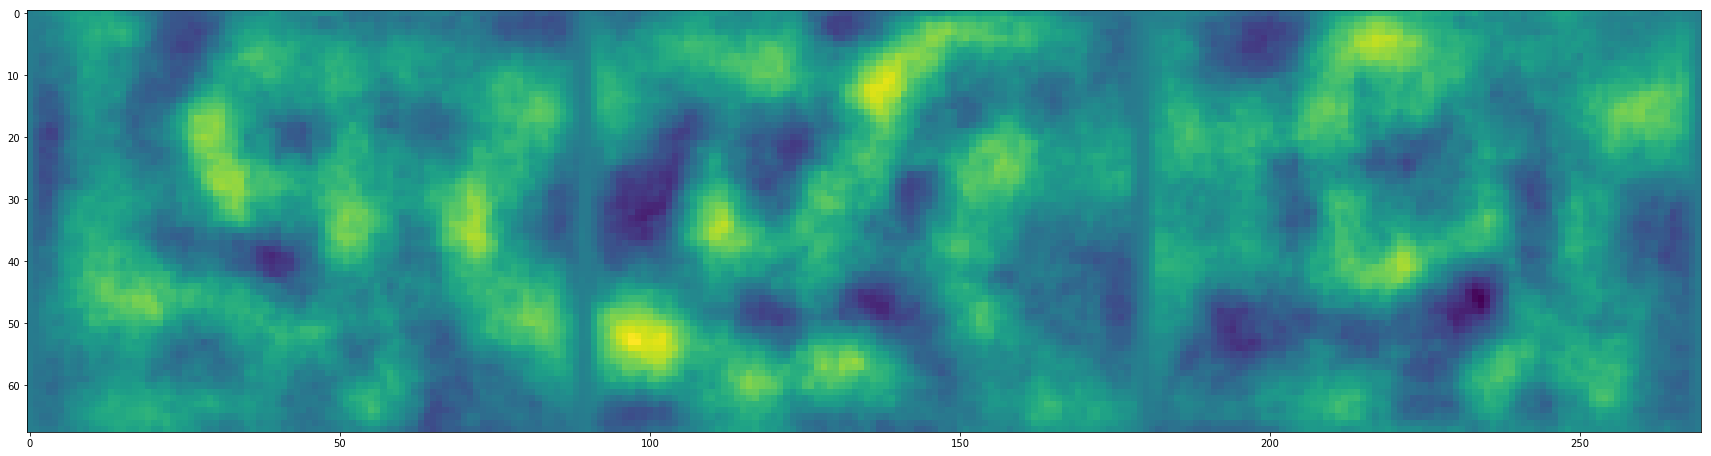

[[-1.75323365e-07 -1.07490257e-06 -1.68123427e-06 ... -1.10468329e-06
  -7.63097660e-07  1.91899776e-08]
 [-3.01423086e-07 -1.41876376e-06 -2.03799482e-06 ... -2.18532773e-06
  -1.39665678e-06 -6.75502960e-08]
 [-3.51793460e-07 -1.51985239e-06 -2.20254128e-06 ... -2.28338490e-06
  -1.66491805e-06 -1.91556040e-07]
 ...
 [ 1.87064501e-07 -1.51701123e-08  3.18237312e-07 ...  2.28744580e-06
   9.10132428e-07  2.93408789e-07]
 [ 1.06250155e-07  4.22951132e-08  1.72129532e-07 ...  1.36671383e-06
   6.08782045e-07  1.92204752e-07]
 [ 1.55286003e-07 -1.59588438e-07 -1.13959109e-08 ...  8.99169834e-07
   5.50612640e-07  2.38685828e-07]]


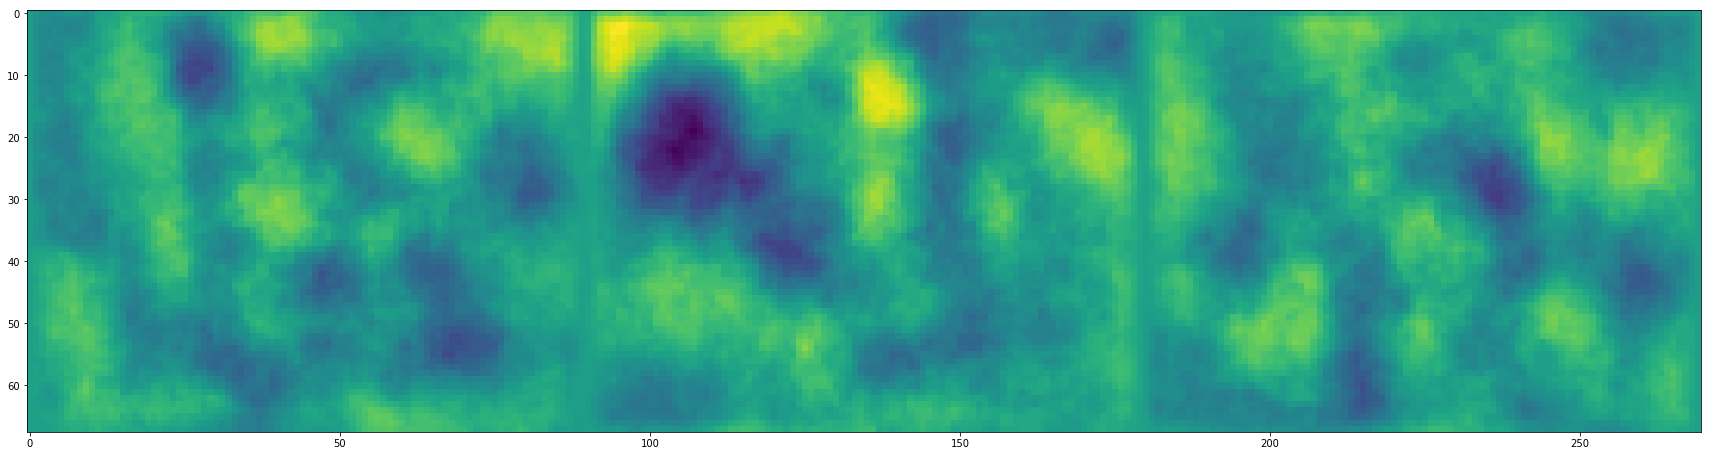

[[ 5.1044346e-08 -3.5437756e-07 -7.9383483e-07 ... -1.9338131e-06
  -1.0159094e-06 -1.6537497e-07]
 [-6.5728656e-08 -5.2996518e-07 -9.4928612e-07 ... -2.8362276e-06
  -1.6960843e-06 -3.7282771e-07]
 [-1.3166971e-07 -8.7443050e-07 -1.5908727e-06 ... -3.5056321e-06
  -1.9338472e-06 -4.1951364e-07]
 ...
 [ 1.1694300e-07 -3.5630375e-08 -3.0047939e-08 ... -1.2637751e-09
  -5.2235773e-08  5.2421328e-08]
 [ 1.6968261e-07  8.3271416e-08  1.0231802e-08 ... -2.5283219e-07
  -2.2760611e-07 -2.4942645e-08]
 [ 1.6894157e-07  1.7515241e-07  2.0572435e-07 ... -3.5888615e-07
  -4.3668359e-07 -7.4778868e-08]]


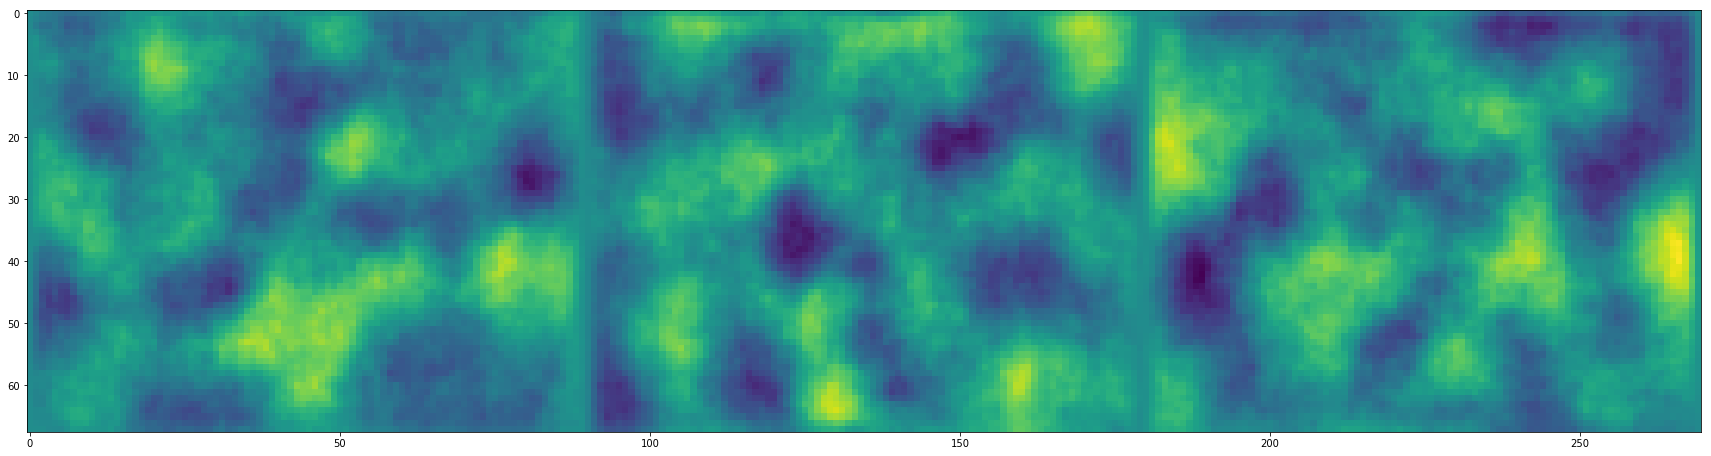

[[-4.0519649e-07  1.5279730e-07  3.7476460e-07 ... -2.7456665e-06
  -2.1698440e-06 -1.1404977e-06]
 [-4.3314100e-07  2.1964324e-07  4.8164668e-07 ... -5.0337308e-06
  -3.2674025e-06 -1.3098984e-06]
 [-4.3111160e-07  1.4231145e-07  1.0121739e-07 ... -5.3170784e-06
  -3.1309264e-06 -1.2859084e-06]
 ...
 [-1.1640848e-06 -3.0736785e-06 -4.6758687e-06 ... -1.5110730e-06
  -1.3923425e-06 -9.3808586e-07]
 [-8.6512767e-07 -1.7942999e-06 -2.6610132e-06 ... -1.4544077e-06
  -1.3677735e-06 -8.4984163e-07]
 [-8.4912148e-07 -8.4227821e-07 -1.1211927e-06 ... -1.1100389e-06
  -9.8250337e-07 -8.0511825e-07]]


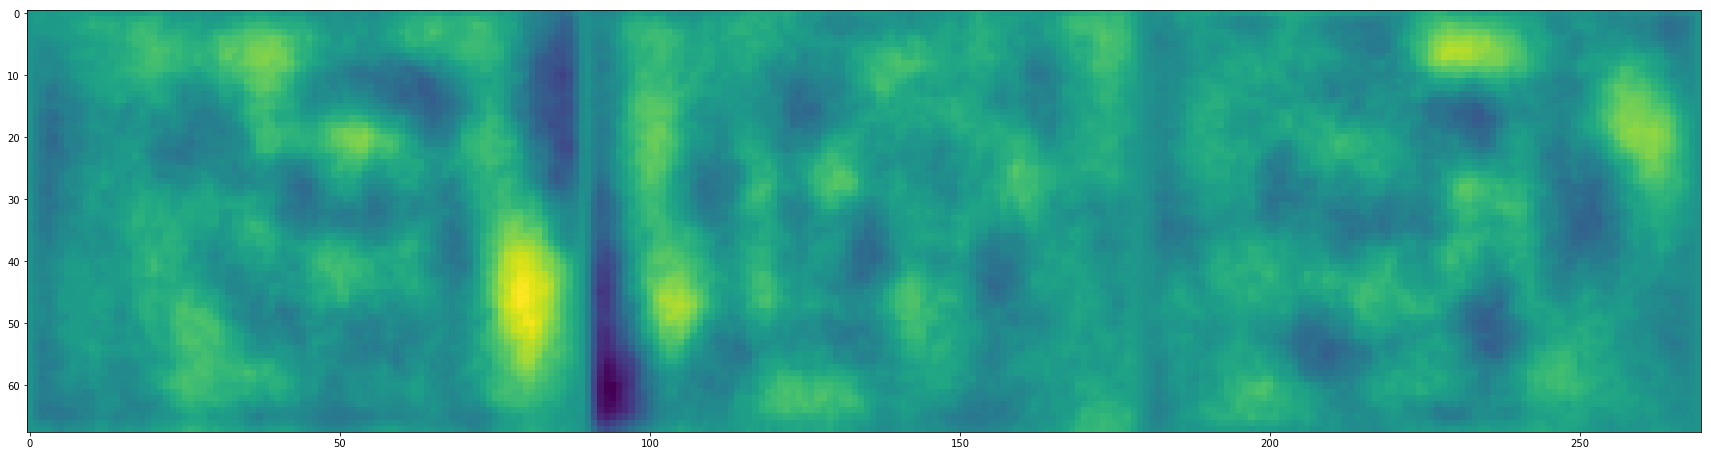

[[-8.5421152e-07 -1.8463165e-06 -2.7880651e-06 ...  8.3421958e-07
   7.2420846e-07 -1.3403340e-07]
 [-8.4510600e-07 -2.1300177e-06 -3.4119448e-06 ...  1.3904632e-06
   1.0392649e-06 -8.5177284e-08]
 [-8.2411333e-07 -1.5837634e-06 -2.6713205e-06 ...  1.9901618e-06
   1.0913990e-06 -2.3809756e-07]
 ...
 [-4.3759263e-07  1.3577932e-07  5.4304599e-07 ...  2.8597167e-06
   2.5099164e-06  6.4359864e-07]
 [-5.0860524e-07 -4.4275288e-07 -6.3275797e-07 ...  2.4054305e-06
   2.0474745e-06  4.3331369e-07]
 [-5.0314588e-07 -8.3322470e-07 -9.9731426e-07 ...  1.9908086e-06
   1.5439518e-06  3.0814320e-07]]


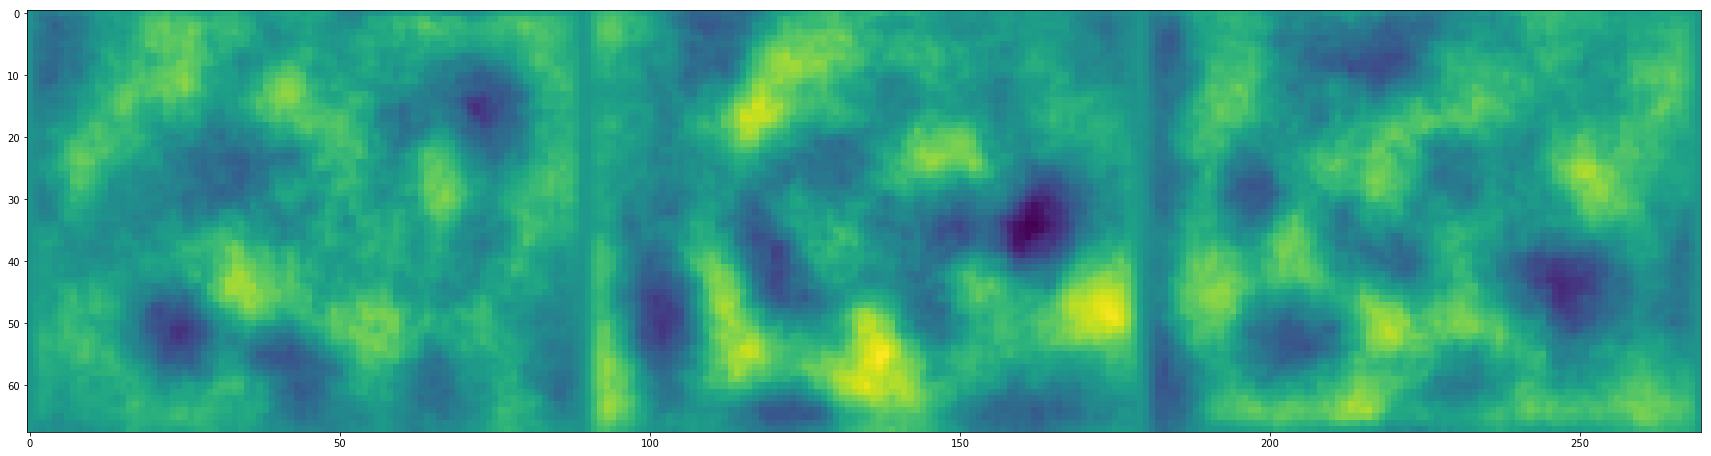

[[-1.2755472e-06 -2.4297021e-06 -3.2977946e-06 ...  1.2780860e-06
   6.6390123e-07 -2.5726396e-07]
 [-1.2596012e-06 -2.5878492e-06 -3.8393941e-06 ...  2.4594103e-06
   1.3439225e-06 -1.8177074e-07]
 [-1.2868310e-06 -2.6250329e-06 -3.9072997e-06 ...  3.0255162e-06
   1.4362668e-06 -9.5490300e-08]
 ...
 [-5.2277591e-07  5.6520867e-07  1.7156868e-06 ... -3.4168738e-07
  -1.5769724e-07 -4.4315965e-07]
 [-6.1755611e-07  1.4053560e-07  6.4312417e-07 ... -5.5175690e-07
  -2.2851668e-07 -5.2315573e-07]
 [-6.4647833e-07 -5.0260826e-07 -2.0716843e-07 ... -5.5985805e-07
  -3.5441843e-07 -5.2148891e-07]]


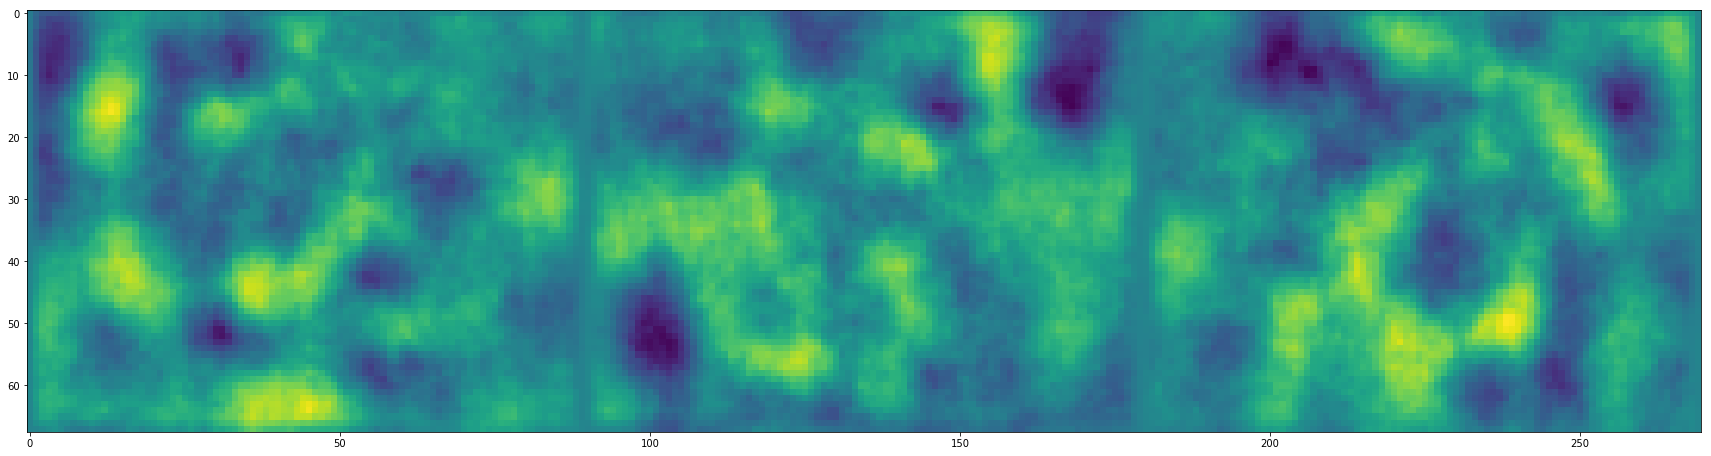

[[5.4684517e-07 7.0144603e-07 7.2407471e-07 ... 1.3555598e-06
  9.9943338e-07 5.6975051e-07]
 [5.2204297e-07 1.0853549e-06 6.6255700e-07 ... 1.4738786e-06
  1.2494522e-06 5.8702028e-07]
 [3.8224272e-07 6.3367912e-07 5.4080988e-07 ... 1.3229608e-06
  1.4842992e-06 8.2506307e-07]
 ...
 [1.2986922e-06 3.8090241e-06 5.4318457e-06 ... 2.9446865e-06
  2.4400733e-06 1.1535917e-06]
 [9.8402927e-07 3.0423810e-06 4.7970184e-06 ... 1.1121161e-06
  1.5294723e-06 9.2296864e-07]
 [8.5890082e-07 2.2735790e-06 3.6253355e-06 ... 6.3266964e-07
  8.7712687e-07 7.2485864e-07]]


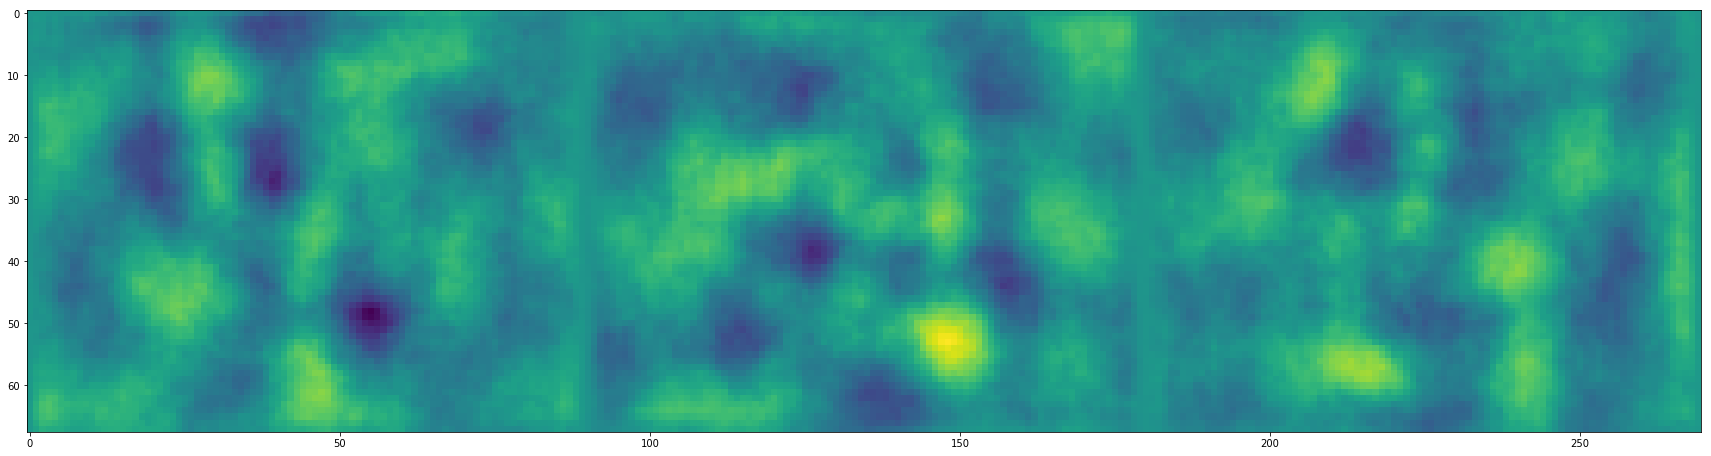

[[-3.47683226e-07 -4.77321976e-07 -4.20500115e-08 ... -8.65907026e-08
   2.09551231e-07  2.50470180e-07]
 [-1.67744673e-07  3.27303866e-07  1.31253444e-06 ... -3.38101728e-07
  -5.33574891e-08  1.32492460e-07]
 [-8.37636378e-08  5.92433253e-07  1.88022659e-06 ... -4.99430485e-07
  -1.76957442e-07  8.52622861e-08]
 ...
 [-3.33328700e-07 -1.16131685e-06 -1.65358563e-06 ... -3.35403838e-09
   9.42321492e-08  1.11577618e-08]
 [-2.39161608e-07 -5.81901929e-07 -1.30916567e-06 ... -7.99487623e-08
  -1.95691101e-07 -4.91428622e-08]
 [-2.76537492e-07 -4.68986002e-07 -1.01692137e-06 ... -9.56486133e-07
  -7.90592537e-07 -1.12272616e-07]]


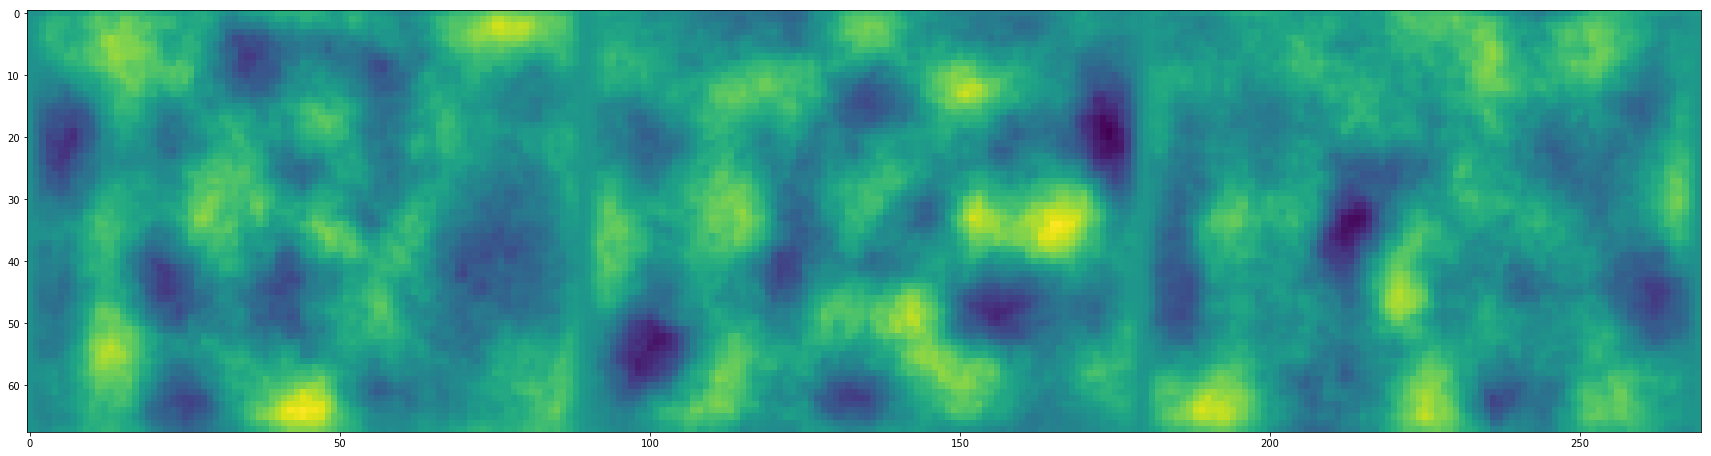

[[-3.5809188e-07  2.9949183e-09  2.6849395e-07 ... -1.8793571e-06
  -1.5419931e-06 -7.8666682e-07]
 [-2.9286772e-07  4.5599336e-07  1.1168507e-06 ... -2.9906678e-06
  -2.0514219e-06 -7.6715168e-07]
 [-1.7833885e-07  9.1469911e-07  1.7427690e-06 ... -3.5581745e-06
  -2.2491085e-06 -9.3833631e-07]
 ...
 [-8.6736105e-07 -2.1355074e-06 -3.6273332e-06 ... -3.8554904e-07
  -5.5980058e-07 -5.0693848e-07]
 [-6.7454749e-07 -1.5713715e-06 -2.5912188e-06 ... -7.8536722e-08
  -2.6149996e-07 -3.1657274e-07]
 [-5.9792035e-07 -9.8424721e-07 -1.5589775e-06 ... -5.7684904e-08
  -5.7894539e-08 -3.4076407e-07]]


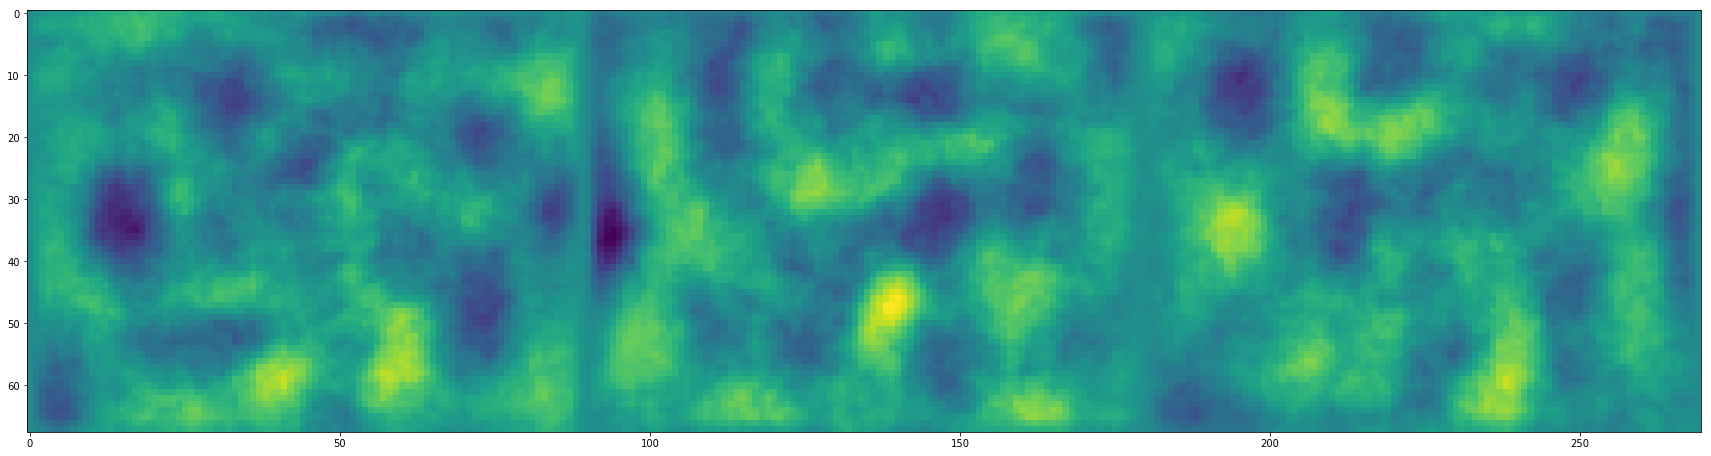

[[-6.3376984e-07 -1.9003545e-06 -3.2700600e-06 ...  4.5481120e-06
   2.3226519e-06  6.8822243e-07]
 [-5.1950752e-07 -1.9532993e-06 -3.0756182e-06 ...  7.3497017e-06
   4.1004132e-06  9.1535969e-07]
 [-3.8932151e-07 -1.5343846e-06 -2.5529482e-06 ...  8.1953795e-06
   4.4483863e-06  9.6210817e-07]
 ...
 [-2.3074737e-07 -5.0374268e-07 -8.4718789e-07 ... -2.2158538e-06
  -1.1549964e-06  2.8364086e-08]
 [-2.0069935e-07 -5.0903878e-07 -1.0005738e-06 ... -1.5079662e-06
  -5.3948690e-07  1.3008946e-07]
 [-3.4302804e-08 -7.4384417e-07 -1.3064315e-06 ... -3.6931618e-07
   2.6994186e-07  1.8091978e-07]]


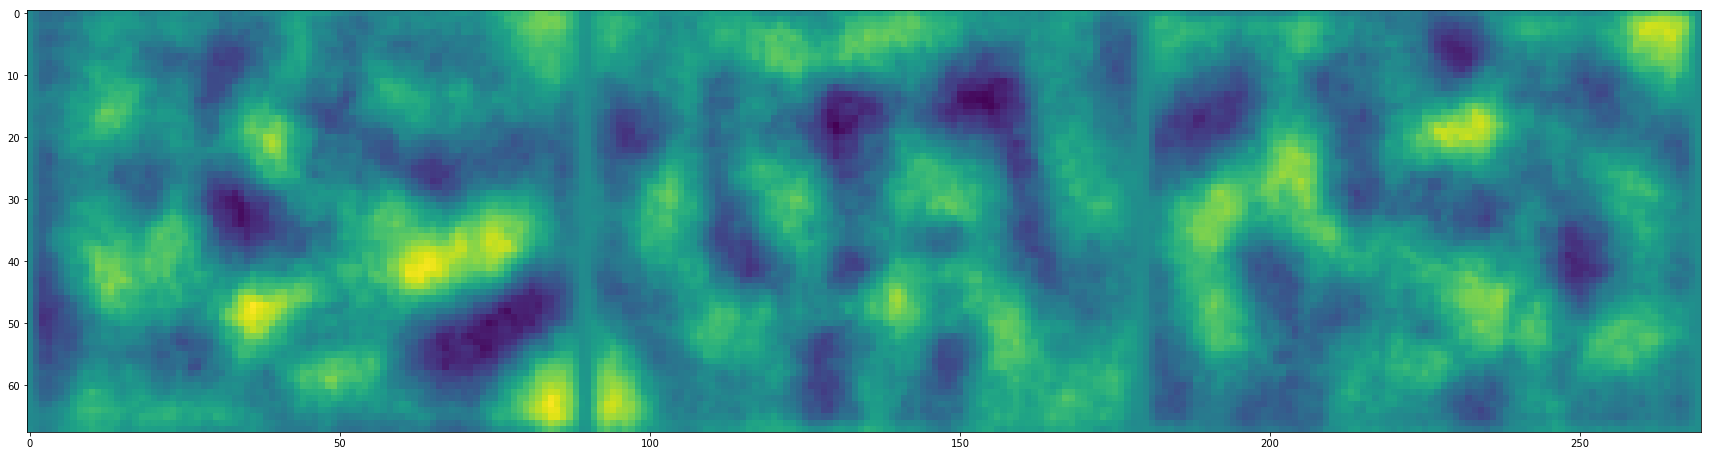

[[ 1.7147337e-07 -8.9625934e-07 -1.7495357e-06 ... -2.8904274e-06
  -1.8149188e-06 -1.4908808e-07]
 [-2.6291211e-09 -1.4356419e-06 -2.3955399e-06 ... -3.0211193e-06
  -1.5961830e-06 -1.1240902e-07]
 [-2.2864494e-07 -1.7775538e-06 -2.9370676e-06 ... -3.0159501e-06
  -1.3769065e-06  2.4027393e-08]
 ...
 [ 7.4295315e-08 -1.3747144e-06 -3.0963422e-06 ... -4.6693153e-06
  -2.6342013e-06 -3.1099074e-07]
 [ 3.3736192e-09 -1.1997738e-06 -2.5140178e-06 ... -3.2345822e-06
  -1.8221236e-06  4.0344062e-08]
 [ 1.1851261e-07 -8.3992620e-07 -2.1575722e-06 ... -1.8691081e-06
  -8.1033994e-07  2.1447633e-07]]


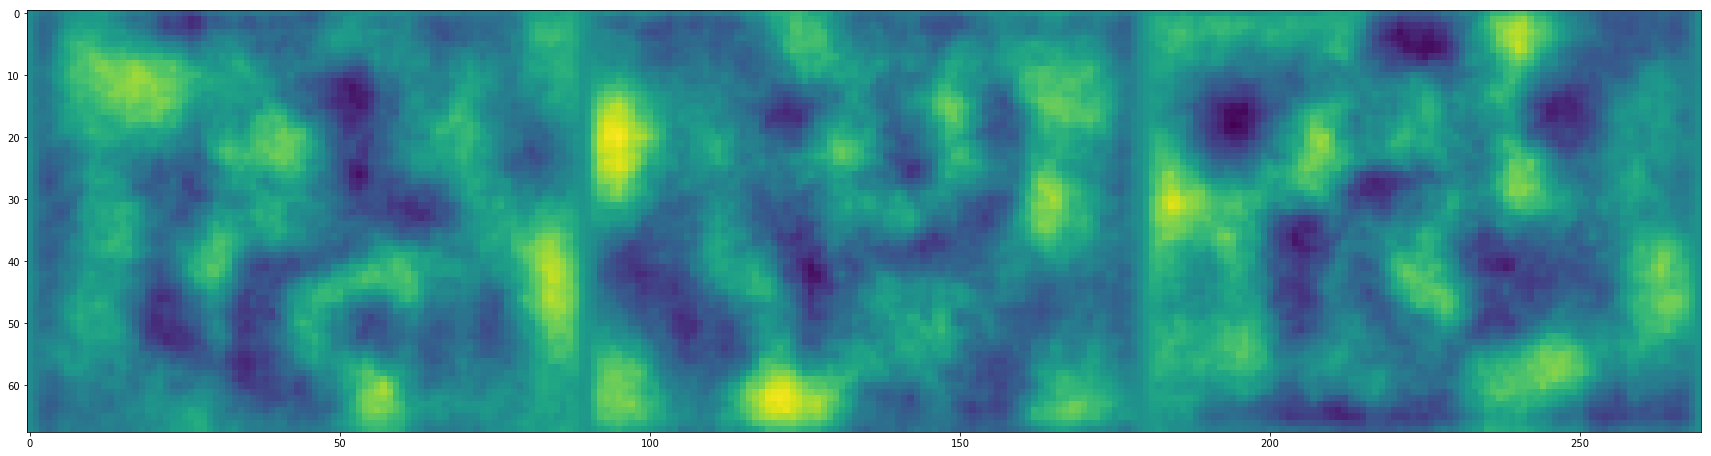

[[-8.5453712e-07 -4.8003380e-07  5.1760901e-07 ...  1.5225069e-06
   8.9842388e-07 -1.5543567e-07]
 [-7.0530945e-07 -2.4924287e-07  6.4168972e-07 ...  1.4216679e-06
   5.8633839e-07 -2.4148784e-07]
 [-6.6658265e-07 -5.2359979e-07  6.1436873e-07 ...  1.7075098e-06
   6.4427462e-07 -2.8680489e-07]
 ...
 [-6.1735005e-07  1.6536461e-07  7.1831556e-07 ...  1.2921391e-06
   3.8364999e-07 -5.1228380e-07]
 [-5.4948737e-07 -2.7081430e-07  7.3451581e-08 ...  9.8591715e-07
   1.4614271e-07 -5.5563532e-07]
 [-5.6377218e-07 -1.5475922e-07 -7.4783991e-08 ...  3.8573933e-07
  -3.8562052e-07 -6.6909996e-07]]


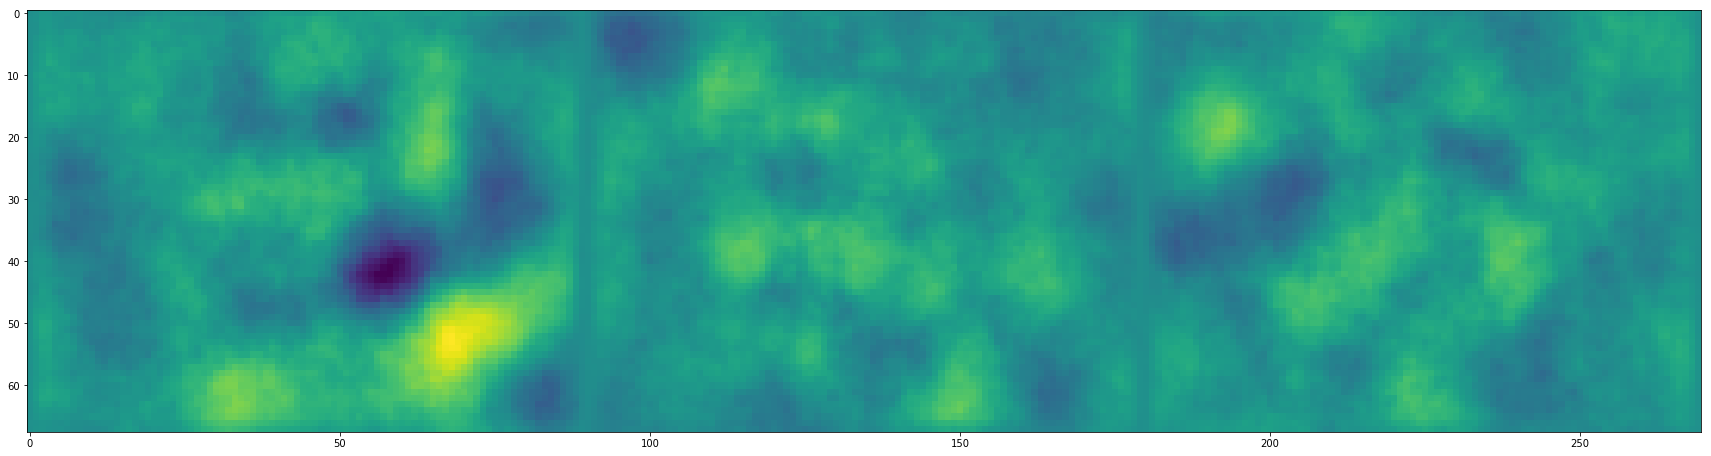

[[ 1.7987320e-07 -1.2201794e-07 -4.7610470e-07 ...  4.7818520e-07
   4.9763889e-07  4.3443310e-07]
 [ 2.2468949e-07 -5.7481358e-08 -1.1659229e-06 ...  1.4807144e-06
   1.0294482e-06  5.0252186e-07]
 [ 8.4232717e-08 -4.2267311e-07 -1.6135572e-06 ...  9.2441195e-07
   9.0109285e-07  4.3663957e-07]
 ...
 [ 1.7709087e-07 -2.7021008e-07 -4.3427667e-07 ...  7.1799411e-07
   1.1046226e-06  7.3460563e-07]
 [ 9.6713627e-08 -3.8394015e-07 -3.2361399e-07 ...  8.9320793e-07
   8.5039119e-07  6.4025295e-07]
 [ 1.4345707e-07 -3.5034520e-07 -4.0168931e-07 ...  7.8816993e-07
   9.8461226e-07  6.3619945e-07]]


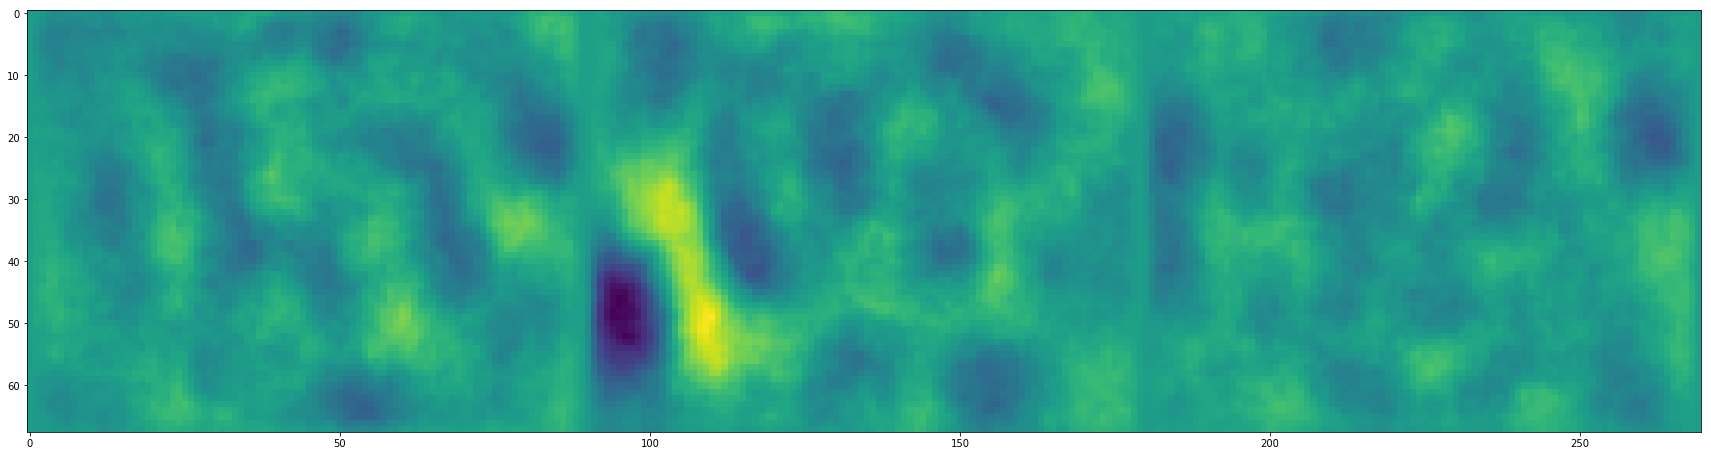

[[ 6.62635173e-08 -2.14967258e-07 -8.96488530e-07 ...  5.92560809e-07
   5.79052028e-07 -1.07778835e-08]
 [ 1.69716827e-08 -1.35079020e-07 -8.00012344e-07 ...  2.12029954e-06
   1.38511416e-06 -2.30497910e-09]
 [ 7.92195820e-08 -4.66408949e-07 -9.64873720e-07 ...  2.68883264e-06
   1.47208709e-06 -5.49469377e-08]
 ...
 [ 6.88080377e-07  1.77984271e-06  2.22841345e-06 ... -1.88929516e-06
  -1.27353167e-06 -6.32686863e-07]
 [ 7.81738663e-07  2.07505104e-06  2.60020056e-06 ... -1.78470668e-06
  -1.38128109e-06 -7.02159241e-07]
 [ 8.89013620e-07  2.51778988e-06  3.20727713e-06 ... -8.69644509e-07
  -7.47063325e-07 -5.53738403e-07]]


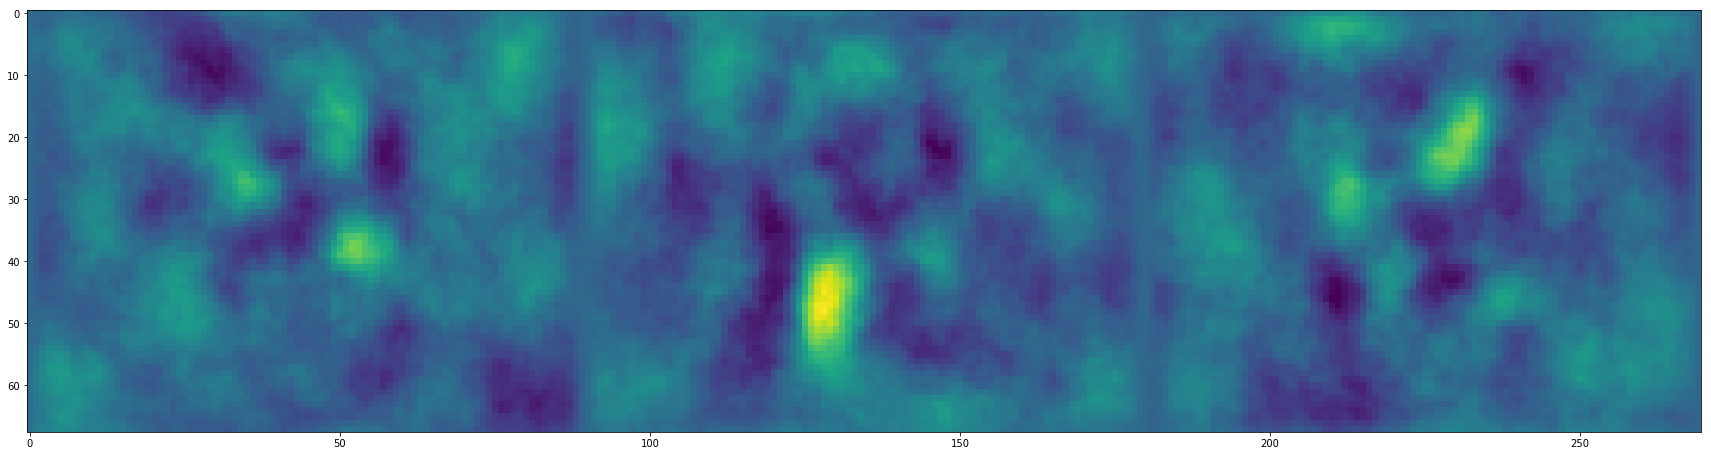

[[ 7.7921982e-08  1.1069650e-07  3.8173615e-09 ... -1.9325735e-06
  -8.0715682e-07 -7.9358635e-08]
 [ 1.1202383e-07  3.8088569e-07  5.0945863e-07 ... -3.6610584e-06
  -1.7982904e-06 -3.0308186e-07]
 [ 2.7102155e-08  6.1042573e-07  8.8061944e-07 ... -4.5681504e-06
  -2.5718543e-06 -5.4160091e-07]
 ...
 [-3.2470209e-07 -1.4490867e-06 -2.2947038e-06 ...  9.6963231e-07
   6.7804257e-07  2.7921968e-07]
 [-1.9002191e-07 -9.4164091e-07 -1.4026311e-06 ...  1.4377052e-06
   1.0067801e-06  5.4876750e-07]
 [-1.5096215e-07 -4.6215740e-07 -4.6414365e-07 ...  1.1266294e-06
   1.0114275e-06  5.1205865e-07]]


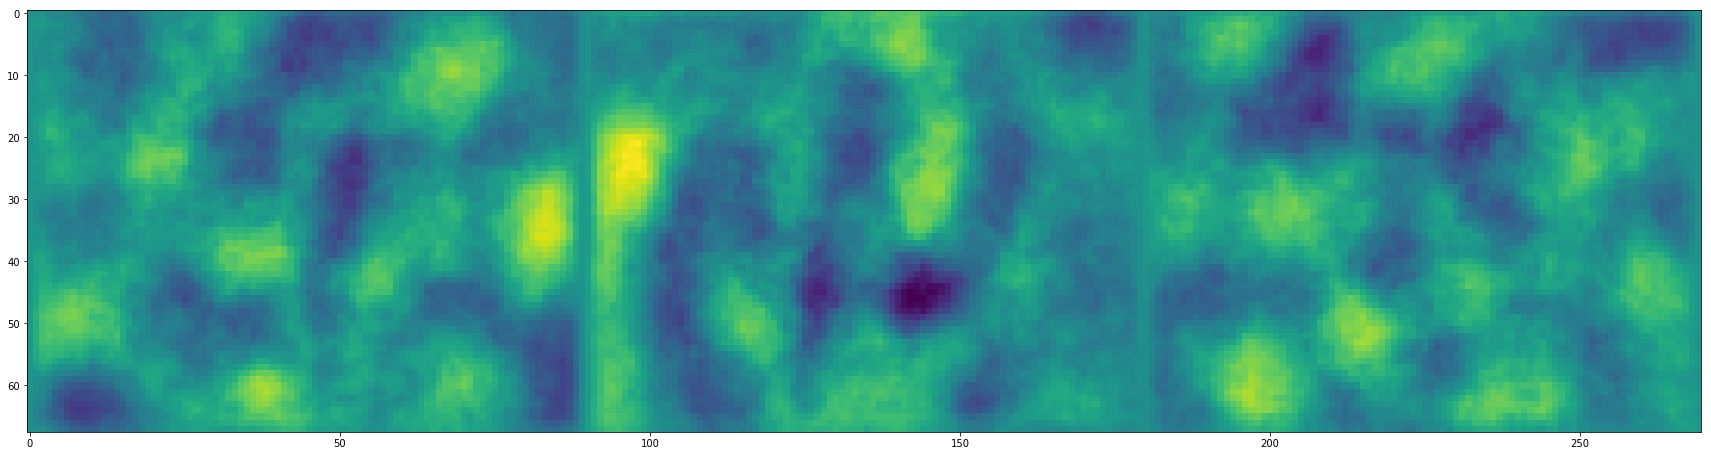

In [10]:

for j in range(0,100):
    reg=ridge_regression(reduced_images,x_train[:,j].T,alpha=10000).reshape(68,270)
    print(reg)
    plt.imshow(reg)
    plt.show()

In [9]:
print(x_train.shape)

(2800, 100)
